# Worksheet 1

### This notebook contains the first set of exercises for the Open Quantum Systems course. By completing these exercises, you will learn methods to predict the dynamics of open quantum systems while also getting experience of programming in Python. Each of the 8 questions below is worth up to 4 marks. When completing the numerical exercises, please remember the following guidelines:
### - *Attempt each question*, even if you don't think you can solve it fully. 
### - *Comment* your code to explain what each part does. You will gain marks for well-commented code even if it does not exactly solve the problem. You will also lose marks for poorly commented code even if you get everything 100% correct.
### - Define variables and functions to make your code more readable and adaptable. This is especially useful when repeating the same calculation with different parameters.
### - Don't be afraid to look online for help! The [documentation](https://docs.python.org/3/#) is a good place to start but you can find many other useful sources with your favourite search engine.

---

## 1

In the first lecture we considered the general qubit Hamiltonian
$$\hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$$
for some unit vector $\mathbf{u}= (u_x,u_y,u_z)$. In this exercise we will find a general analytical expression for the time evolution operator $ \hat{U}(t) = {\rm e}^{-{\rm i}\hat{H}t/\hbar}$.

(a) Let's warm up with the simplest case where $\mathbf{u} = (0,0,1)$. First show that $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$ is equal to the identity operator. Now use this fact and the definition of the matrix exponential (i.e. its Taylor expansion) to show that

$$ {\rm e}^{-{\rm i}\omega \hat{\sigma}_zt/2} = \cos(\omega t/2) \hat{1} - {\rm i}\sin(\omega t/2) \hat{\sigma}_z.$$

[Hint: recall the Taylor expansions for $\cos(x) = \sum_{n=0}^\infty \frac{({\rm i} x)^{2n}}{(2n)!}$ and ${\rm i}\sin(x) = \sum_{n=0}^\infty \frac{({\rm i}x)^{2n+1}}{(2n+1)!}$]

(b) The commutator between two operators $\hat{A}$ and $\hat{B}$ is defined by $[\hat{A},\hat{B}] = \hat{A}\hat{B}-\hat{B}\hat{A}$. The anti-commutator is defined by $\{\hat{A},\hat{B}\} = \hat{A}\hat{B}+\hat{B}\hat{A}$. The commutator between any pair of Pauli matrices is given in the typed lecture notes ([see Blackboard](https://tcd.blackboard.com)). Convince yourself that the anti-commutation relation

$$\{\hat{\sigma}_j,\hat{\sigma}_k \} = 2\delta_{jk} \hat{\mathbb{1}},$$

holds for any pair of indices $j,k = x,y,z$. Here, $\delta_{jk}$ is the Kronecker delta symbol, defined by $\delta_{jk} = 1$ if $j=k$ and $\delta_{jk} = 0$ otherwise. Using these 
commutation and anti-commutation relations (or otherwise), verify the identity:

$$ \hat{\sigma}_j\hat{\sigma}_k = \delta_{jk}  \hat{\mathbb{1}} + \sum_{l=x,y,z}{\rm i} \varepsilon_{jkl} \hat{\sigma}_l,$$  

where $\varepsilon_{ijk}$ is the Levi-Civita symbol, which is anti-symmetric under any pairwise permutation of its indices, $\varepsilon_{jkl}= -\varepsilon_{kjl} = \varepsilon_{klj}\ldots $ etc., and takes the value $\varepsilon_{jkl} = 1$ for $(j,k,l) = (x,y,z)$. Note that the anti-symmetric property implies that $\varepsilon_{jkl}=0$ whenever two or more indices are equal.

(c) Now consider a general $\mathbf{u}=(u_x,u_y,u_z)$, where all three components of $\mathbf{u}$ are non-zero. Using the identity from (b) and the fact that $\lVert\mathbf{u}\rVert = 1$, prove that

$$ \hat{H}^2 = \left(\frac{\hbar\omega}{2}\right)^2\hat{\mathbb{1}}.$$

Use this result to show that, in general,

$$ \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}.$$


(d) Set $\mathbf{u} = (1,1,0)/\sqrt{2}$, and use the result of (c) to calculate the 
calculate an analytical expression for the operator $\hat{\sigma}_z$ in the Heisenberg picture:

$$ \hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t). $$

(e) Find the expectation value $\langle \downarrow|\hat{\sigma}_{z,H}(t)|\downarrow\rangle$. Plot your analytical result as a function of the dimensionless time variable $\omega t$ using [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). (Remember to label your axes!) 

Code to plot the real and imaginary parts of $\langle \hat{\sigma}_{Z,H} \rangle$ calculated numerically (num.) and analytically (ana.) with respect to the dimentionless variable $\omega t$:

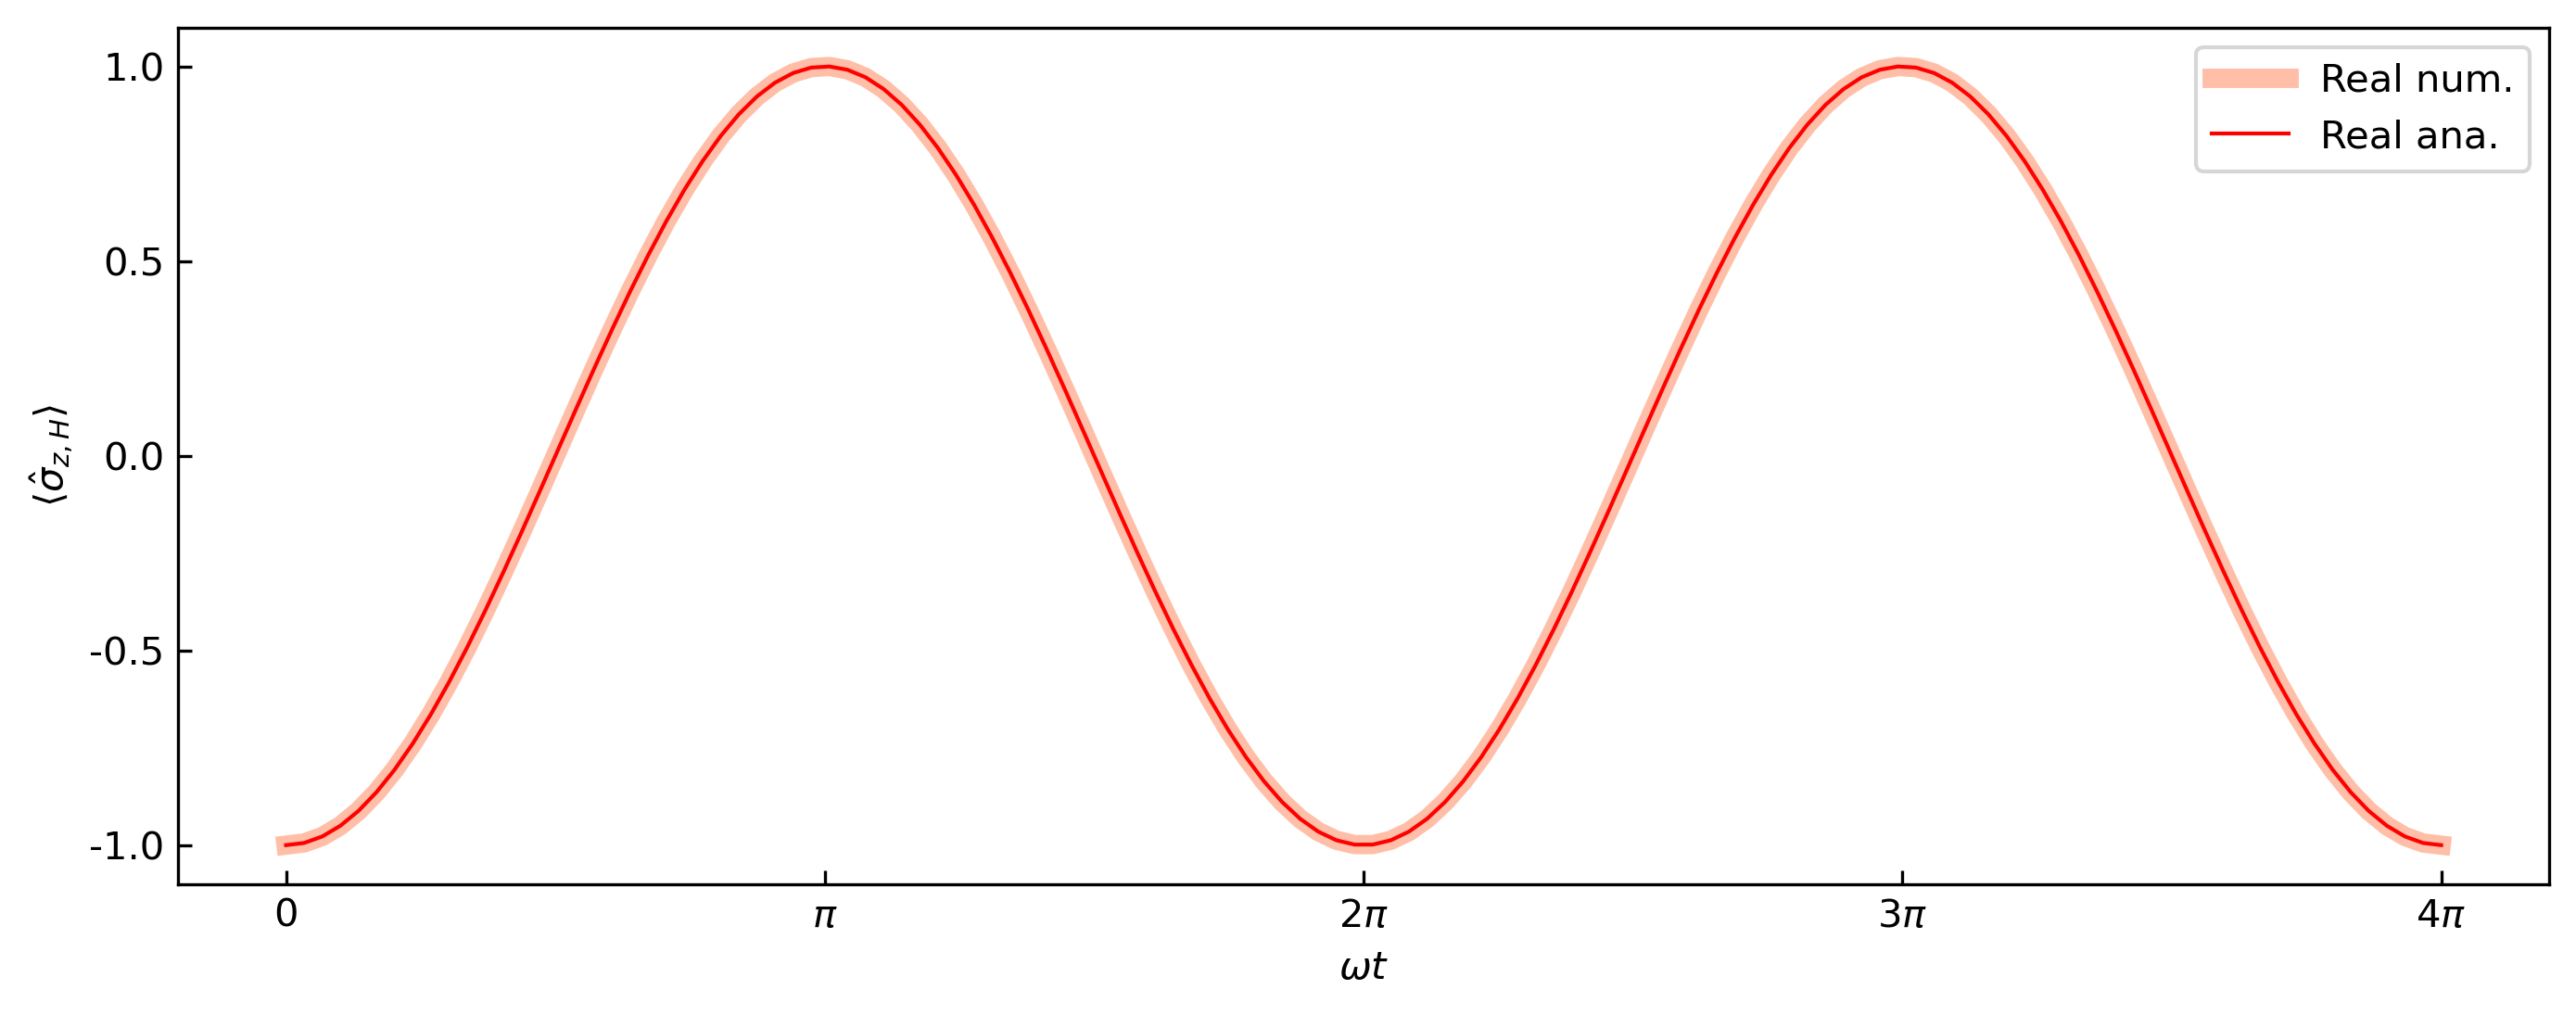

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#pauli matrices and identities
X = np.matrix([[0, 1], [1, 0]])
Y = np.matrix([[0, -1j], [1j, 0]])
Z = np.matrix([[1, 0], [0, -1]])
I = np.matrix([[1, 0], [0, 1]])
sigma = [X, Y, Z]

wt = np.linspace(0, 4*np.pi, 120) #discretization of the time variable
down = np.matrix([[0],
                  [1]]) #down state, initial state


#function that calculates the time evolution matrix for every given time having H=hbar*w/2 *(sigma_x + sigma_y)/sqrt(2)
def U(wt):
    Ut = np.cos(wt/2) * I -1j/np.sqrt(2) * np.sin(wt/2) * (X + Y)
    return Ut
#function that calculates sigma_z in the Heisenberg picture
def sigma_z_H_num(operator, evolution):
    s = evolution.getH() * operator * evolution
    return s
#function that calculates the expectation value of an operator given a certain state
def exp_val(vector, operator):
    v = vector.getH() * operator * vector
    v = complex(v)
    return v

#list with the expectation values to plot calculated numerically
numerical_values = [exp_val(down, sigma_z_H_num(Z, U(i))) for i in wt]

#initializing figure
plt.figure(figsize = (11,4), dpi=300)
plt.plot(wt, [i.real for i in numerical_values], label='Real num.', c= 'coral', linewidth = 5, alpha=0.5, zorder = 2)
#if there's any imaginary value different than 0, plot the imaginary part at all times:
if not [i.imag for i in numerical_values]:
    plt.plot(wt, [i.imag for i in numerical_values], label='Imag. num.', c='paleturquoise', linewidth = 5, zorder = 1)

#function that returns the expectation value as calculated analytically in the embedded picture
def expected_analytical(wt):
    s = -np.cos(wt)
    return s

#list with the expecttation values to plot calculated from the analytical expression
analytical_values = [expected_analytical(i) for i in wt]

plt.plot(wt, [i.real for i in analytical_values], label = r'Real ana.', c='r', linewidth = 1, zorder = 4)
#if there's any imaginary value different than 0, plot the imaginary part at all times:
if not [i.imag for i in analytical_values]:
    plt.plot(wt, [i.imag for i in analytical_values], label = 'Imag. ana.', linewidth = 1, zorder = 3)

plt.xlabel(r'$\omega t$')
plt.ylabel(r'$\langle \hat{\sigma}_{z,H} \rangle$')
plt.xticks([np.pi * i for i in range(5)], ['0', r'$\pi$']+[r'$'+str(i+2)+'\pi$' for i in range(3)])
plt.yticks([-1, -0.5, 0, 0.5, 1], [str(i/2 - 1) for i in range(5)])
plt.legend()
plt.tick_params(axis="both", direction="in")
#plt.savefig('1e.pdf', dpi=400)
plt.show()


It is useful to notice that all expectation values of Hermitian operators will be real, and therefore the imaginary part of the numerical result can be ignored since it will always be zero. Being $\hat{A}$ a Hermitian operator ($\hat{A} = \hat{A}^\dagger$):
$$ (\langle\psi |\hat{A}|\psi\rangle)^\dagger =  (|\psi\rangle)^\dagger \hat{A}^\dagger (\langle\psi |)^\dagger = \langle\psi |\hat{A}|\psi\rangle \implies (\langle\psi |\hat{A}|\psi\rangle)^* = \langle\psi |\hat{A}|\psi\rangle \implies \langle\psi |\hat{A}|\psi\rangle \text{ is real}$$

## 2
Now we'll do some numerical calculations with the same system. Let's set $\hbar\omega=0.2$, and consider the case $\mathbf{u} = (1,1,0)/\sqrt{2}$. 

(a) Write down the Hamiltonian matrix as a NumPy array and verify that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}}.$

In [1]:
import numpy as np
#defining values
hw = 0.2
u = 1/np.sqrt(2) * np.array([[1, 1, 0]])
#pauli matrices and identity
X = np.matrix([[0, 1], [1, 0]])
Y = np.matrix([[0, -1j], [1j, 0]])
Z = np.matrix([[1, 0], [0, -1]])
I = np.matrix([[1, 0], [0, 1]])
#matrix u·sigma
usigma = sum([u[0][0] * X, u[0][1]*Y, u[0][2]*Z])

#hamiltonian
H = hw/2 * usigma
#hamiltonian squared
H_sq = H@H
print('H^2 =\n',H_sq)

#value of hw/2 to the power of 2 up to 8 decimals
hw_half_sq = round(((hw/2)**2).real, 8) + 1j * round(((hw/2)**2).imag, 8)
print('(h_bar * w/2)**2 =\n',hw_half_sq)

#is every matrix element of H*H equal to (hw/2)**2?:
#matrix with booleans in every matrix element according to the previous equality
elements_bool = (H_sq == (hw_half_sq * I))
print('Boolean matrix =\n',elements_bool)

#condition only met if all the items in the previous matrix are 'True'

if elements_bool.all()==True:
    print('All elements coincide, the equality is verified:D')

H^2 =
 [[0.01+0.j 0.  +0.j]
 [0.  +0.j 0.01+0.j]]
(h_bar * w/2)**2 =
 (0.01+0j)
Boolean matrix =
 [[ True  True]
 [ True  True]]
All elements coincide, the equality is verified:D


(b) Consider an initial state $|\psi(0)\rangle = |\downarrow\rangle$. Write down the state as a NumPy array and verify numerically that it is **not** an eigenstate of the Hamiltonian matrix. Find the true eigenstates of $\hat{H}$.

In [1]:
import numpy as np
#defining values
hw = 0.2
u = 1/np.sqrt(2) * np.array([[1, 1, 0]])
#pauli matrices and identity
X = np.matrix([[0, 1], [1, 0]])
Y = np.matrix([[0, -1j], [1j, 0]])
Z = np.matrix([[1, 0], [0, -1]])
I = np.matrix([[1, 0], [0, 1]])
#matrix u·sigma
usigma = sum([u[0][0] * X, u[0][1]*Y, u[0][2]*Z])

#hamiltonian
H = hw/2 * usigma

#down state
down = np.matrix([[0],
                  [1]])
final_state = H * down
#if the state down is an eigenstate, the determinant of it and the vector H@down should be 0, since both vectors are
    #linearly dependent
determinant = np.linalg.det(np.array([[complex(down[0][0]), complex(down[1][0])], 
                             [complex(final_state[0][0]), complex(final_state[1][0])]]))
print(final_state)
if determinant == 0:
    print("The determinant is 0, therefore 'down' is an eigenstate")
else:
    print("The determinant is not 0, therefore 'down' is not an eigenstate")
eigvals, eigvects = np.linalg.eig(H)
for i in range(len(eigvals)):
    print('Eigenvalue =',round(eigvals[i].real, 5)+1j*(round(eigvals[i].imag, 5)), ' ; ', 'Eigenstate =', eigvects[:,i])

[[0.07071068-0.07071068j]
 [0.        +0.j        ]]
The determinant is not 0, therefore 'down' is not an eigenstate
Eigenvalue = (0.1+0j)  ;  Eigenstate = [[0.5       -0.5j]
 [0.70710678+0.j ]]
Eigenvalue = (-0.1+0j)  ;  Eigenstate = [[-0.5       +0.5j]
 [ 0.70710678+0.j ]]


(c) Find the time evolution operator $\hat{U}(\Delta t)$ over a small time step $\Delta t = 0.05$ (e.g. using the [expm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or another method of your choosing).
Verify numerically that $\hat{U}(\Delta t)$ is unitary.

In [1]:
import numpy as np
#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

def U(wt):
    Ut = np.cos(wt/2) * I -1j/np.sqrt(2) * np.sin(wt/2) * (X + Y)
    return Ut

wt2 = 0.05
UtU = U(wt2).conj().T @ U(wt2)

#rounding the matrices elements' up to 10 decimals to correct computational deviations, 
    # and making all the elements real if the imaginary part is 0
for i in range(2):
    for j in range(2):
            if round(UtU[i][j].imag, 10)==0 and round(I[i][j].imag, 10)==0:
                UtU[i][j] = round(UtU[i][j].real, 10)
                I[i][j] = round(I[i][j].real, 10)
            else:
                UtU[i][j] = round(UtU[i][j].real, 10)+ 1j * round(UtU[i][j].imag, 10)
                I[i][j] = round(I[i][j].real, 10) + 1j * round(I[i][j].imag, 10)                
bool_matrix = (UtU==I)
print('UtU=\n',UtU)
print('I=\n', I)
if bool_matrix.all():
    print('UtU==I, the matrix U is indeed unitary:D')
else:
    print('Something bad happened...U is not unitary:(')

UtU=
 [[ 1.+0.j -0.+0.j]
 [-0.+0.j  1.+0.j]]
I=
 [[1 0]
 [0 1]]
UtU==I, the matrix U is indeed unitary:D


(d) Consider the following simple way to simulate time evolution numerically in a given time interval $[0,t]$, which is very effective for relatively simple quantum systems. Discretise the time interval into a grid of $N$ equally spaced times $t_n = n\Delta t$, where $\Delta t = t/N$ and $N$ is a large integer. The solutions of the Schrödinger equation evaluated at two different time points $t$ and $t'$ are related by $|\psi(t')\rangle = \hat{U}(t'-t)|\psi(t)\rangle$. Therefore, one can find the state at each point on the grid by the iteration

$$ |\psi(t_{n+1})\rangle = \hat{U}(\Delta t) |\psi(t_n)\rangle, $$

starting from the boundary condition $|\psi(t_0)\rangle = |\psi(0)\rangle$. Use this method to find the expectation value $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$ given the initial condition $|\psi(0)\rangle = |\downarrow\rangle$, and evolve up to time $\omega t=30$. Plot the result as a function of the dimensionless time variable $\omega t$.

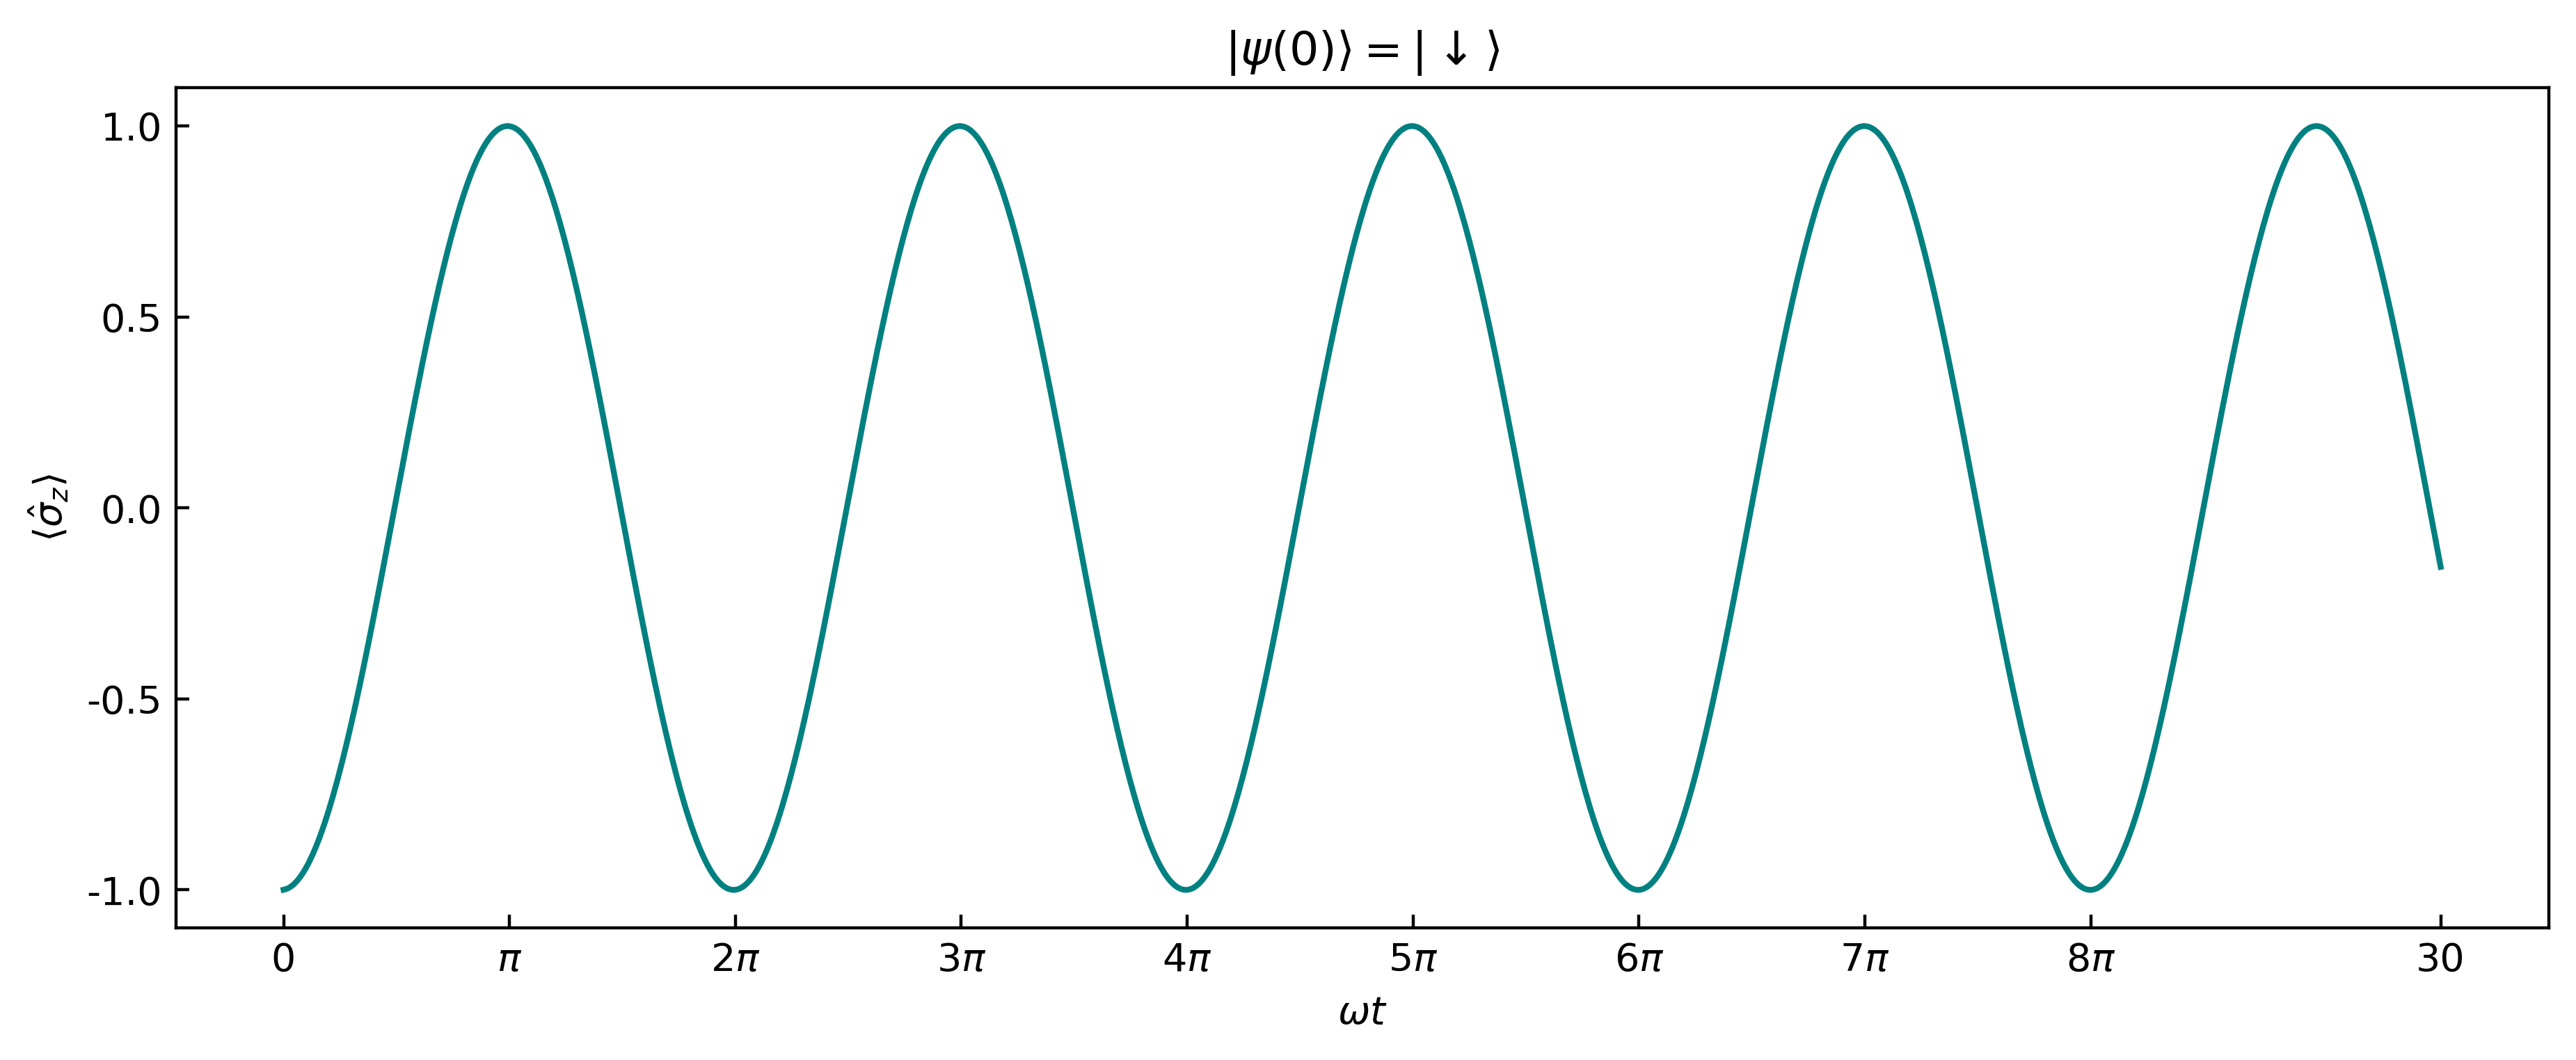

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#defining values considering hbar=1
hw = 0.2
t_f = 30/hw #final value so that wt=30
N = 1000 #amount to discretize
wt = np.linspace(0, t_f, N)
dt = t_f/N
initial_state = np.array([[0],
                          [1]])

u = 1/np.sqrt(2) * np.array([[1, 1, 0]])
#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])
#matrix u·sigma
usigma = sum([u[0][0] * X, u[0][1]*Y, u[0][2]*Z])
#hamiltonian
H = hw/2 * (X+Y)/np.sqrt(2)

#unitary evolution
#function that calculates the time evolution matrix for every time
def U(time, operator, vector):
    final_vector = expm(-1j * time * operator) @ vector
    return final_vector


#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

states_in_time = []
state = initial_state
for i in wt:
    state = U(dt, H, state)
    states_in_time.append(state)

plt.figure(figsize = (11,4), dpi=400)
plt.plot(wt, [expectation_value(i, Z) for i in states_in_time], c='teal')

plt.xlabel(r'$\omega t$')
plt.ylabel(r'$\langle \hat{\sigma}_{z} \rangle$')
plt.xticks([np.pi * i/hw for i in range(9)]+[30/hw], ['0', r'$\pi$']+[r'$'+str(i+2)+'\pi$' for i in range(7)]+['30'])
plt.yticks([i/2 -1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.title(r'$|\psi(0)\rangle = |\downarrow\rangle$')
plt.tick_params(axis="both", direction="in")
#plt.savefig('2d.pdf', dpi=400)
plt.show()

## 3
Let us now perform a similar calculation by a different method. The Bloch vector is defined by $\mathbf{s} =(s_x,s_y,s_z) = (\langle\hat{\sigma}_x\rangle,\langle\hat{\sigma}_y\rangle,\langle\hat{\sigma}_z\rangle)$, where $\langle \bullet\rangle = \langle \psi(t)|\bullet|\psi(t)\rangle$ denotes the expectation value with respect to the time-dependent state of the qubit. 

(a) By considering the Heisenberg equations of motion for the Pauli matrices, derive the equation

$$\mathbf{\dot{s}} = \omega \,\mathbf{u}\times \mathbf{s},$$

where the dot indicates a time derivative. Without any calculation, sketch the solution of this equation on the Bloch sphere for $\mathbf{u} = (0,1,0)$.



In the sketch, the vector $\mathbf{s}(t)$ will evolve around the $y$ axis always self-contained in one of the infinite planes perpendicular to $\mathbf{u}$. Two of them have been drawn in green as an example, the vector $\mathbf{s}(t)$ will always point from the center to the surface of the sphere with constant modulus.

(b) Show that the same equation can be expressed in the form

$$ \mathbf{\dot{s}} = \mathbf{M}\cdot \mathbf{s},$$

and find an explicit expression for the matrix $\mathbf{M}$.

(c) Convince yourself that the explicit solution of the above equation is 

$$ \mathbf{s}(t) = {\rm e}^{\mathbf{M} t} \cdot \mathbf{s}(0).$$

Solve this equation numerically via a similar iteration  as in question 2, i.e. $\mathbf{s}(t+\Delta t) = {\rm e}^{\mathbf{M} \Delta t} \cdot \mathbf{s}(t)$. Use the same Hamiltonian, parameters, and initial condition as question 2. Plot the result for all three components of $\mathbf{s}$.

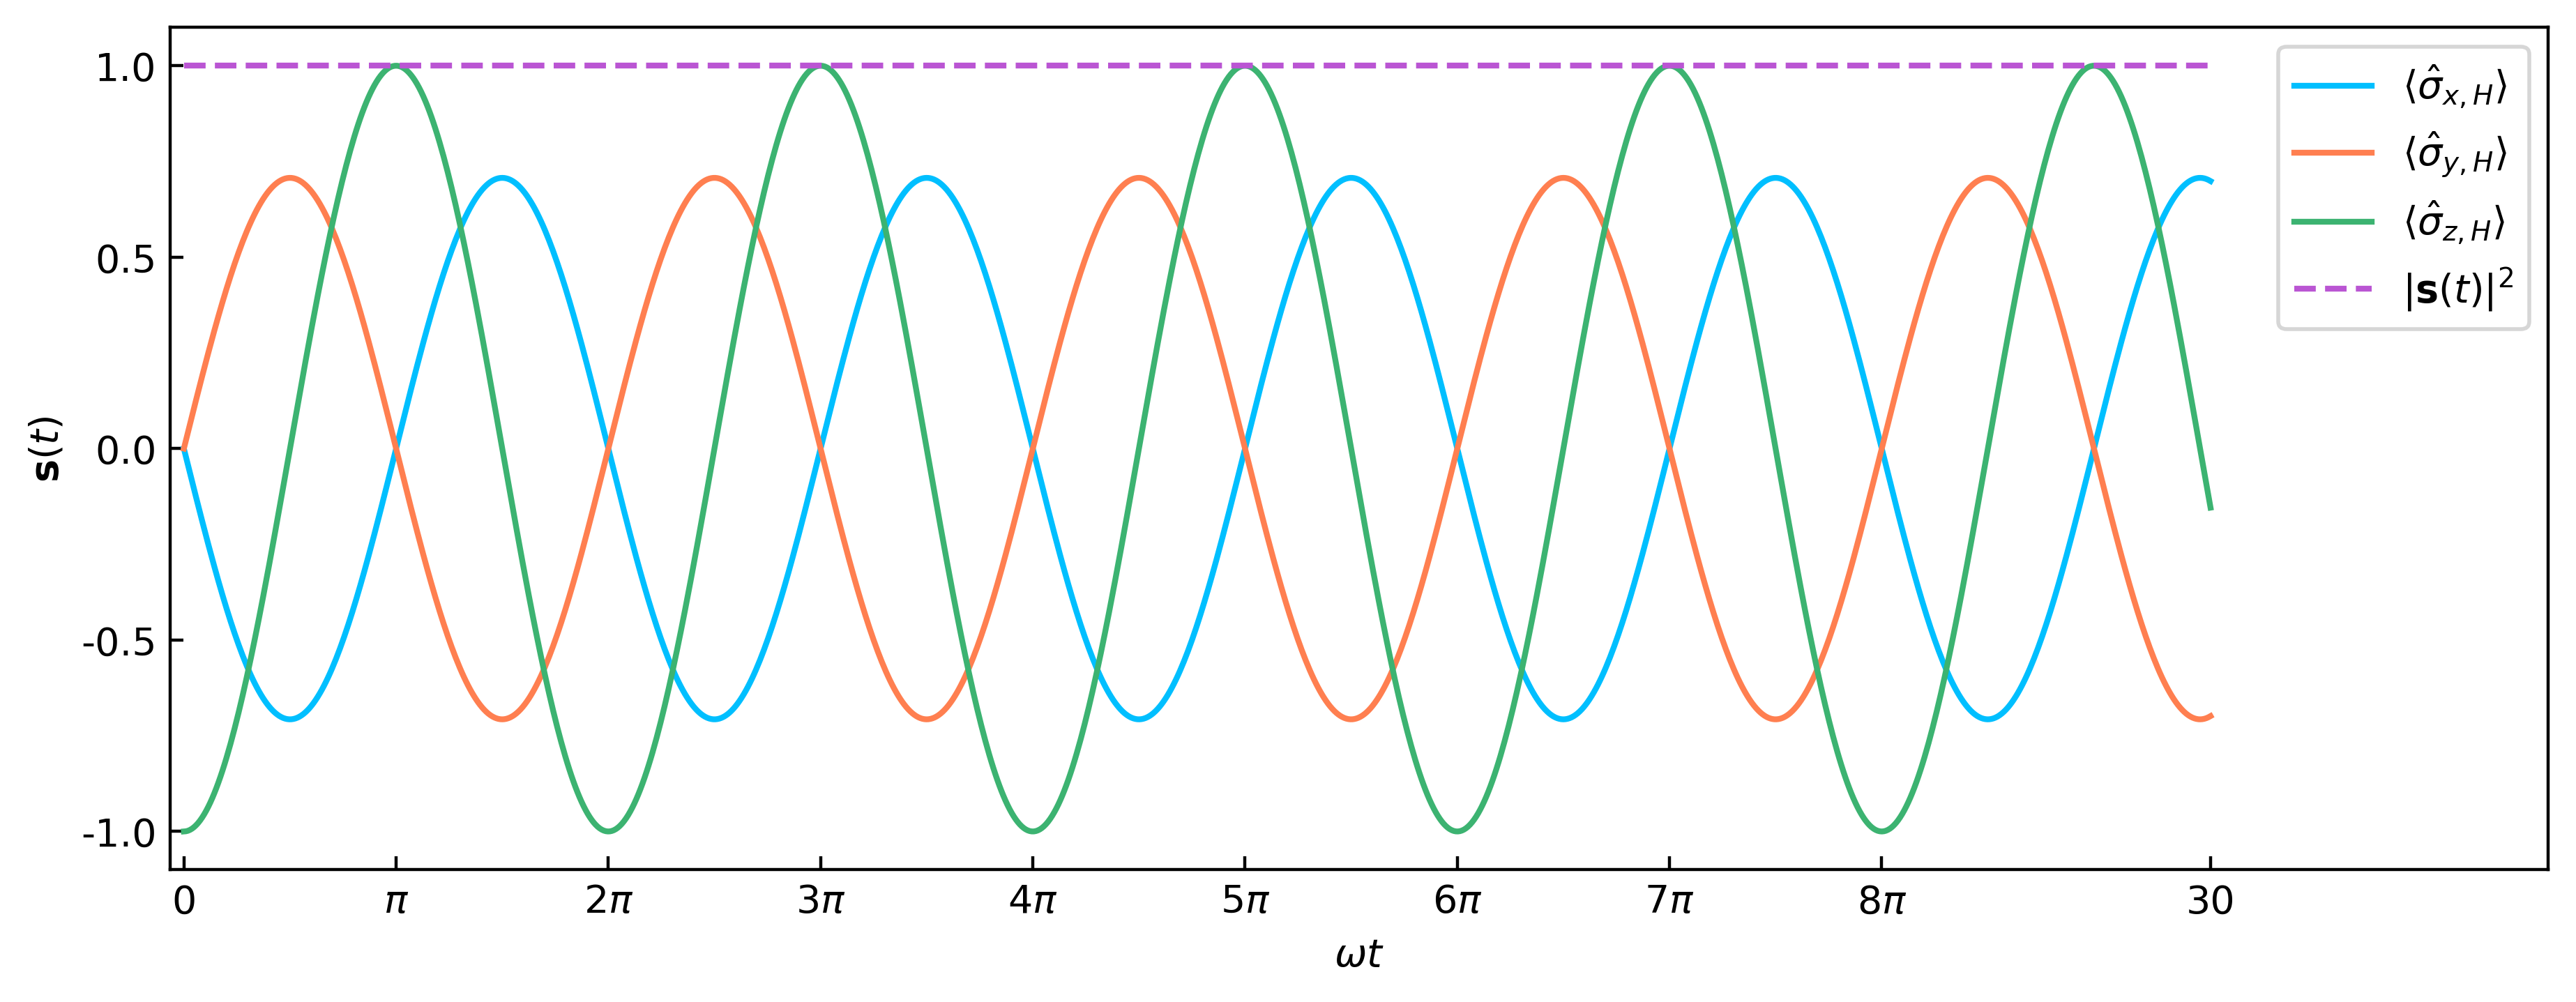

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#defining values
hw = 0.2
t_f = 30/hw #final value
N = 1000 #amount to discretize
wt = np.linspace(0, t_f, N)
initial_state = np.array([[0],
                          [1]])

u = 1/np.sqrt(2) * np.array([[1, 1, 0]])
M = hw * np.array([[0, -u[0][2], u[0][1]], 
             [u[0][2], 0, -u[0][0]],
             [-u[0][1], u[0][0], 0]])

#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])


def evolution_s(time, s_vector, M):
    s = expm(time * M) @ s_vector
    return s

#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

s_vector = np.array([[expectation_value(initial_state, X)],
                    [expectation_value(initial_state, Y)],
                    [expectation_value(initial_state, Z)]])

#calculate the result as the final vector:
all_vectors = [evolution_s(i, s_vector, M) for i in wt]

plt.figure(figsize = (11,4), dpi=400)
#plot of the first component of s at every time:
plt.plot(wt, [i[0][0] for i in all_vectors], label = r'$\langle \hat{\sigma}_{x,H}\rangle$', c='deepskyblue')
#plot of the second component of s at every time:
plt.plot(wt, [i[1][0] for i in all_vectors], label = r'$\langle \hat{\sigma}_{y,H}\rangle$', c='coral')
#plot of the third component of s at every time:
plt.plot(wt, [i[2][0] for i in all_vectors], label = r'$\langle \hat{\sigma}_{z,H}\rangle$', c='mediumseagreen')
#plot of the modulus squared of s at every time
plt.plot(wt, [i[0][0]**2 + i[1][0]**2 + i[2][0]**2 for i in all_vectors], label = r'$|\mathbf{s}(t)|^2$', c='mediumorchid', linestyle='--')

plt.xlabel(r'$\omega t$')
plt.ylabel(r'$\mathbf{s}(t)$')
plt.xticks([np.pi * i/hw for i in range(9)]+[30/hw], ['0', r'$\pi$']+[r'$'+str(i+2)+'\pi$' for i in range(7)]+['30'])
plt.yticks([-1, -0.5, 0, 0.5, 1], [str(i/2 - 1) for i in range(5)])
#plt.ylim((-1.1, 1.1))
plt.xlim((-1, 35/hw))
plt.legend()
plt.tick_params(axis="both", direction="in")
#plt.savefig('3c.pdf', dpi=400)
plt.show()

It can be seen that the evolution of the state is periodical. This concept agrees with the previous description of a rotation around the vector $\mathbf{u}$ in the Bloch sphere. The length of the vector $\mathbf{s}(t)$ is constant.

As an extra exercise the evolution has been visualized in the Bloch sphere during the first 2 periods: $\omega t \in [0, 4\pi]$.

In this particular figure, $t$ refers to $\omega t$ in the legend.

![BS](../evolution_BS_crop.gif)

## 4
Consider a qubit with bare Hamiltonian
$$ \hat{H}_{\rm q} = \tfrac{1}{2}\hbar\omega_0 \hat{\sigma}_z,$$
that is driven by a time-dependent perturbation 
$$ \hat{H}_{\rm d}(t) = \hbar\Omega \sin(\omega_{\rm d} t)\hat{\sigma}_x.$$
Using linear-response theory, derive the change in the observables $\delta\langle \hat{\sigma}_x(t)\rangle$ and $\delta\langle \hat{\sigma}_z(t)\rangle$ assuming the initial state is $\lvert \psi(0)\rangle = \lvert \downarrow\rangle$. Plot the results as a function of time for $\Omega = 0.1\omega_0$ and $\omega_{\rm d} = 0.2\omega_0$. What happens when $\omega_{\rm d} = \omega_0$?

Hint: you may find the following result useful
$$ \int_0^t {\rm d}t'\, \sin[\omega_a(t-t')] \sin(\omega_{b}t') = \frac{\omega_a \sin(\omega_b t) - \omega_b \sin(\omega_a t)}{\omega_a^2 - \omega_b^2}.$$

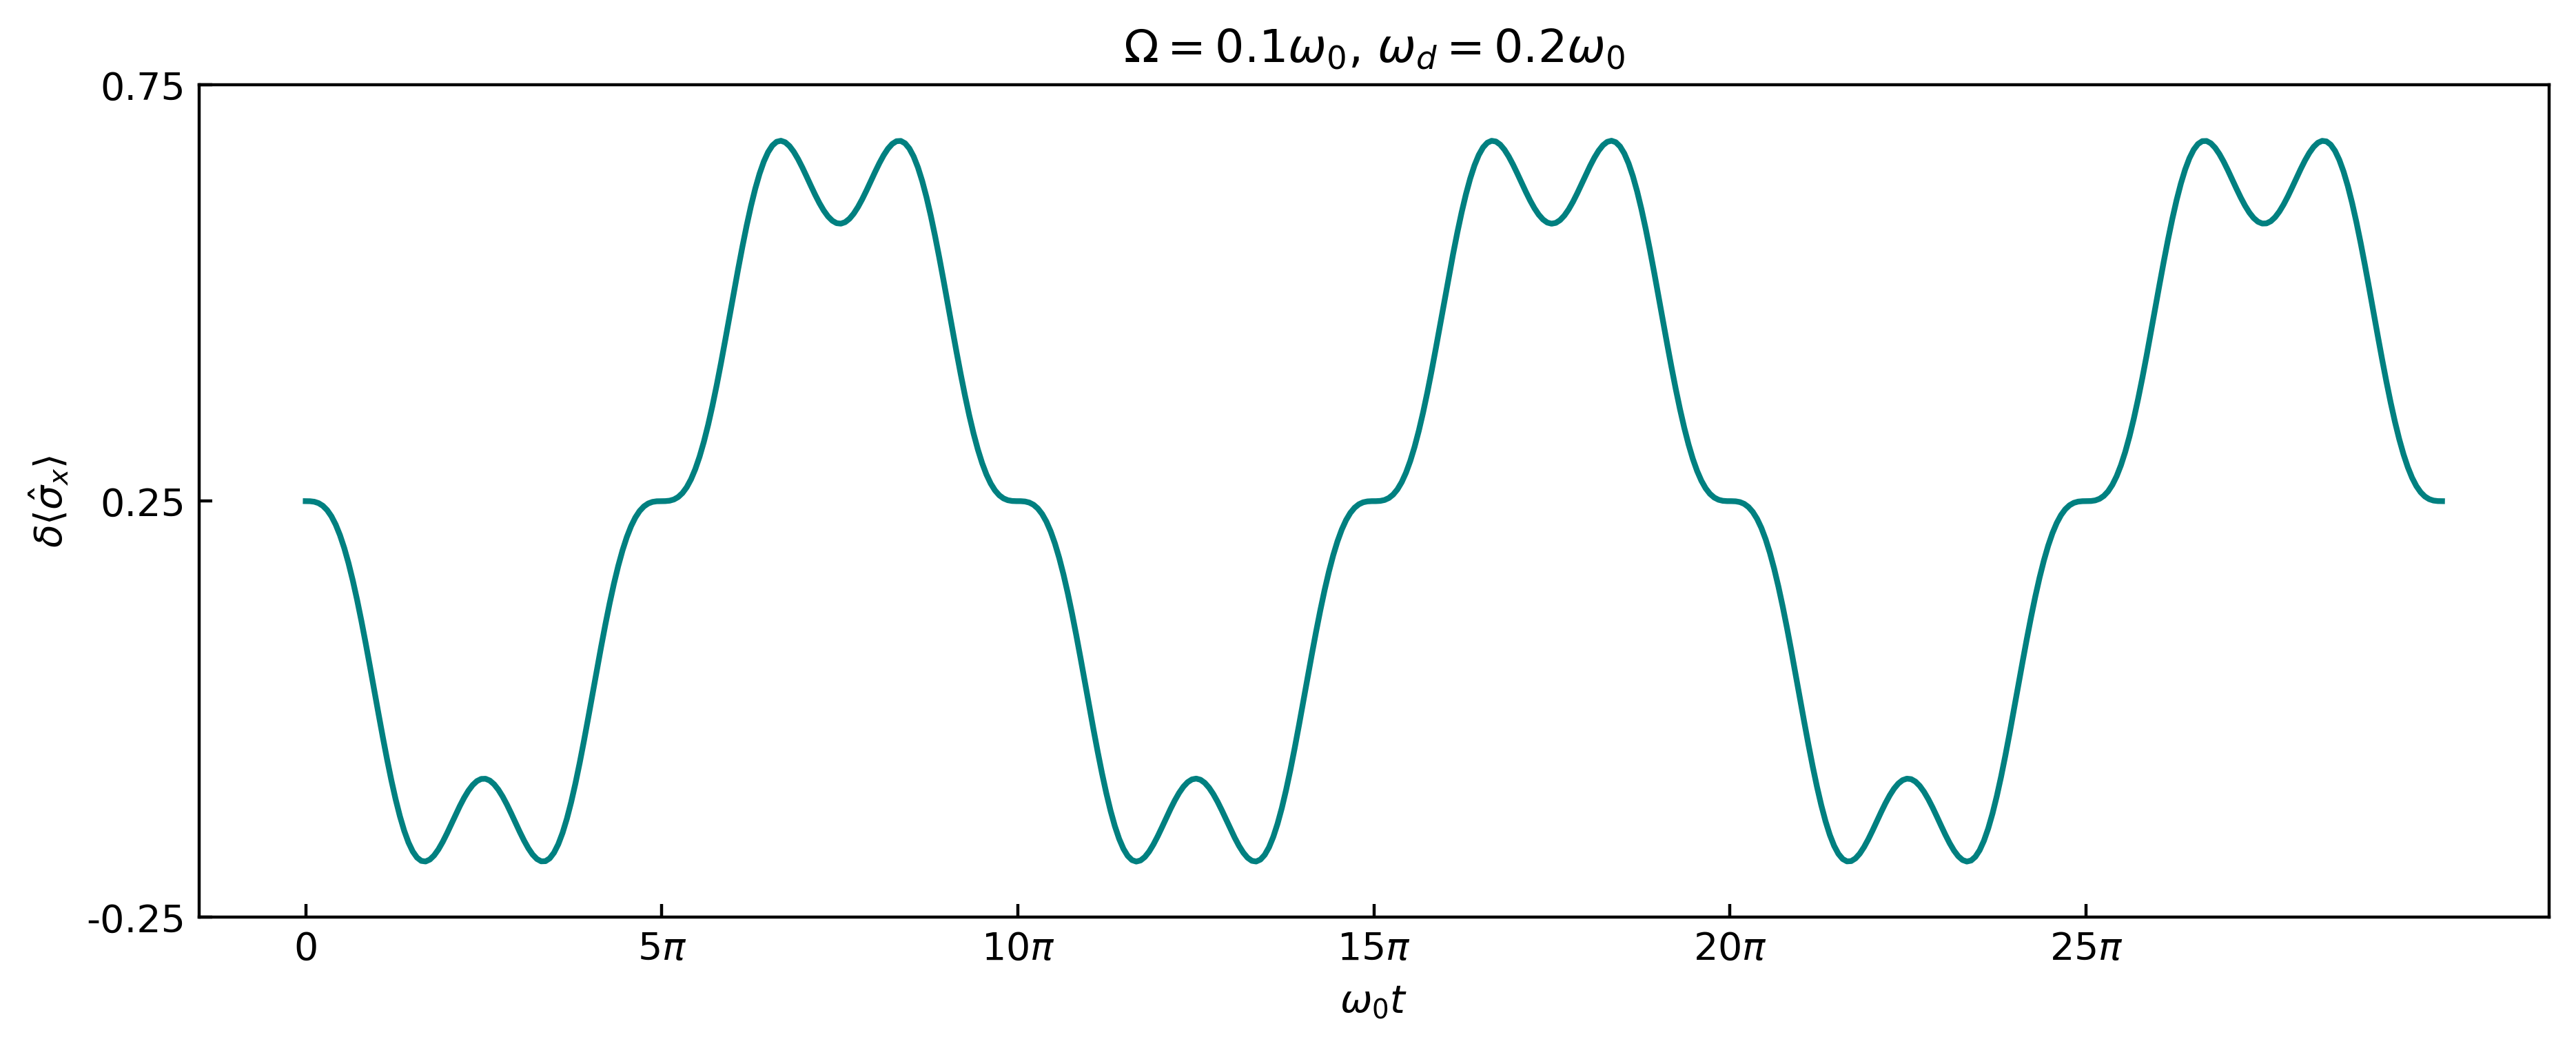

In [1]:
import numpy as np
import matplotlib.pyplot as plt
initial_state = np.array([[0], 
                          [1]])
w0 = 1
O = 0.1 * w0
wd = 0.2 * w0
#function that has been calculated analytically and can be found in the embedded image at the end of question 4
def delta_x(w0, O, wd, t):
    return 2 * O * (wd * np.sin(w0*t) - w0 * np.sin(wd*t))/(w0**2 - wd**2)
#the change of the observable sigma_z is zero at all times and therefore it is not shown in the plot
def delta_z(t):
    return 0
t = np.linspace(0, 6*np.pi/wd, 500)

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [delta_x(w0, O, wd, i) for i in t], c='teal')
plt.title(r'$\Omega = 0.1\omega_0$, $\omega_d = 0.2\omega_0$')
plt.xlabel('$\omega_0t$')
plt.ylabel(r'$\delta \langle \hat{\sigma}_x \rangle$')
plt.xticks([np.pi * i for i in range(0, int(6/wd), 5)], ['0']+[r'$'+str(i+5)+'\pi$' for i in range(0, int(6/wd)-2, 5)]+['30'])
plt.yticks([-0.25, 0, 0.25], [str(i/2 - 0.25) for i in range(3)])
plt.tick_params(axis="both", direction="in")
#plt.savefig('4i.pdf', dpi=400)
plt.show()

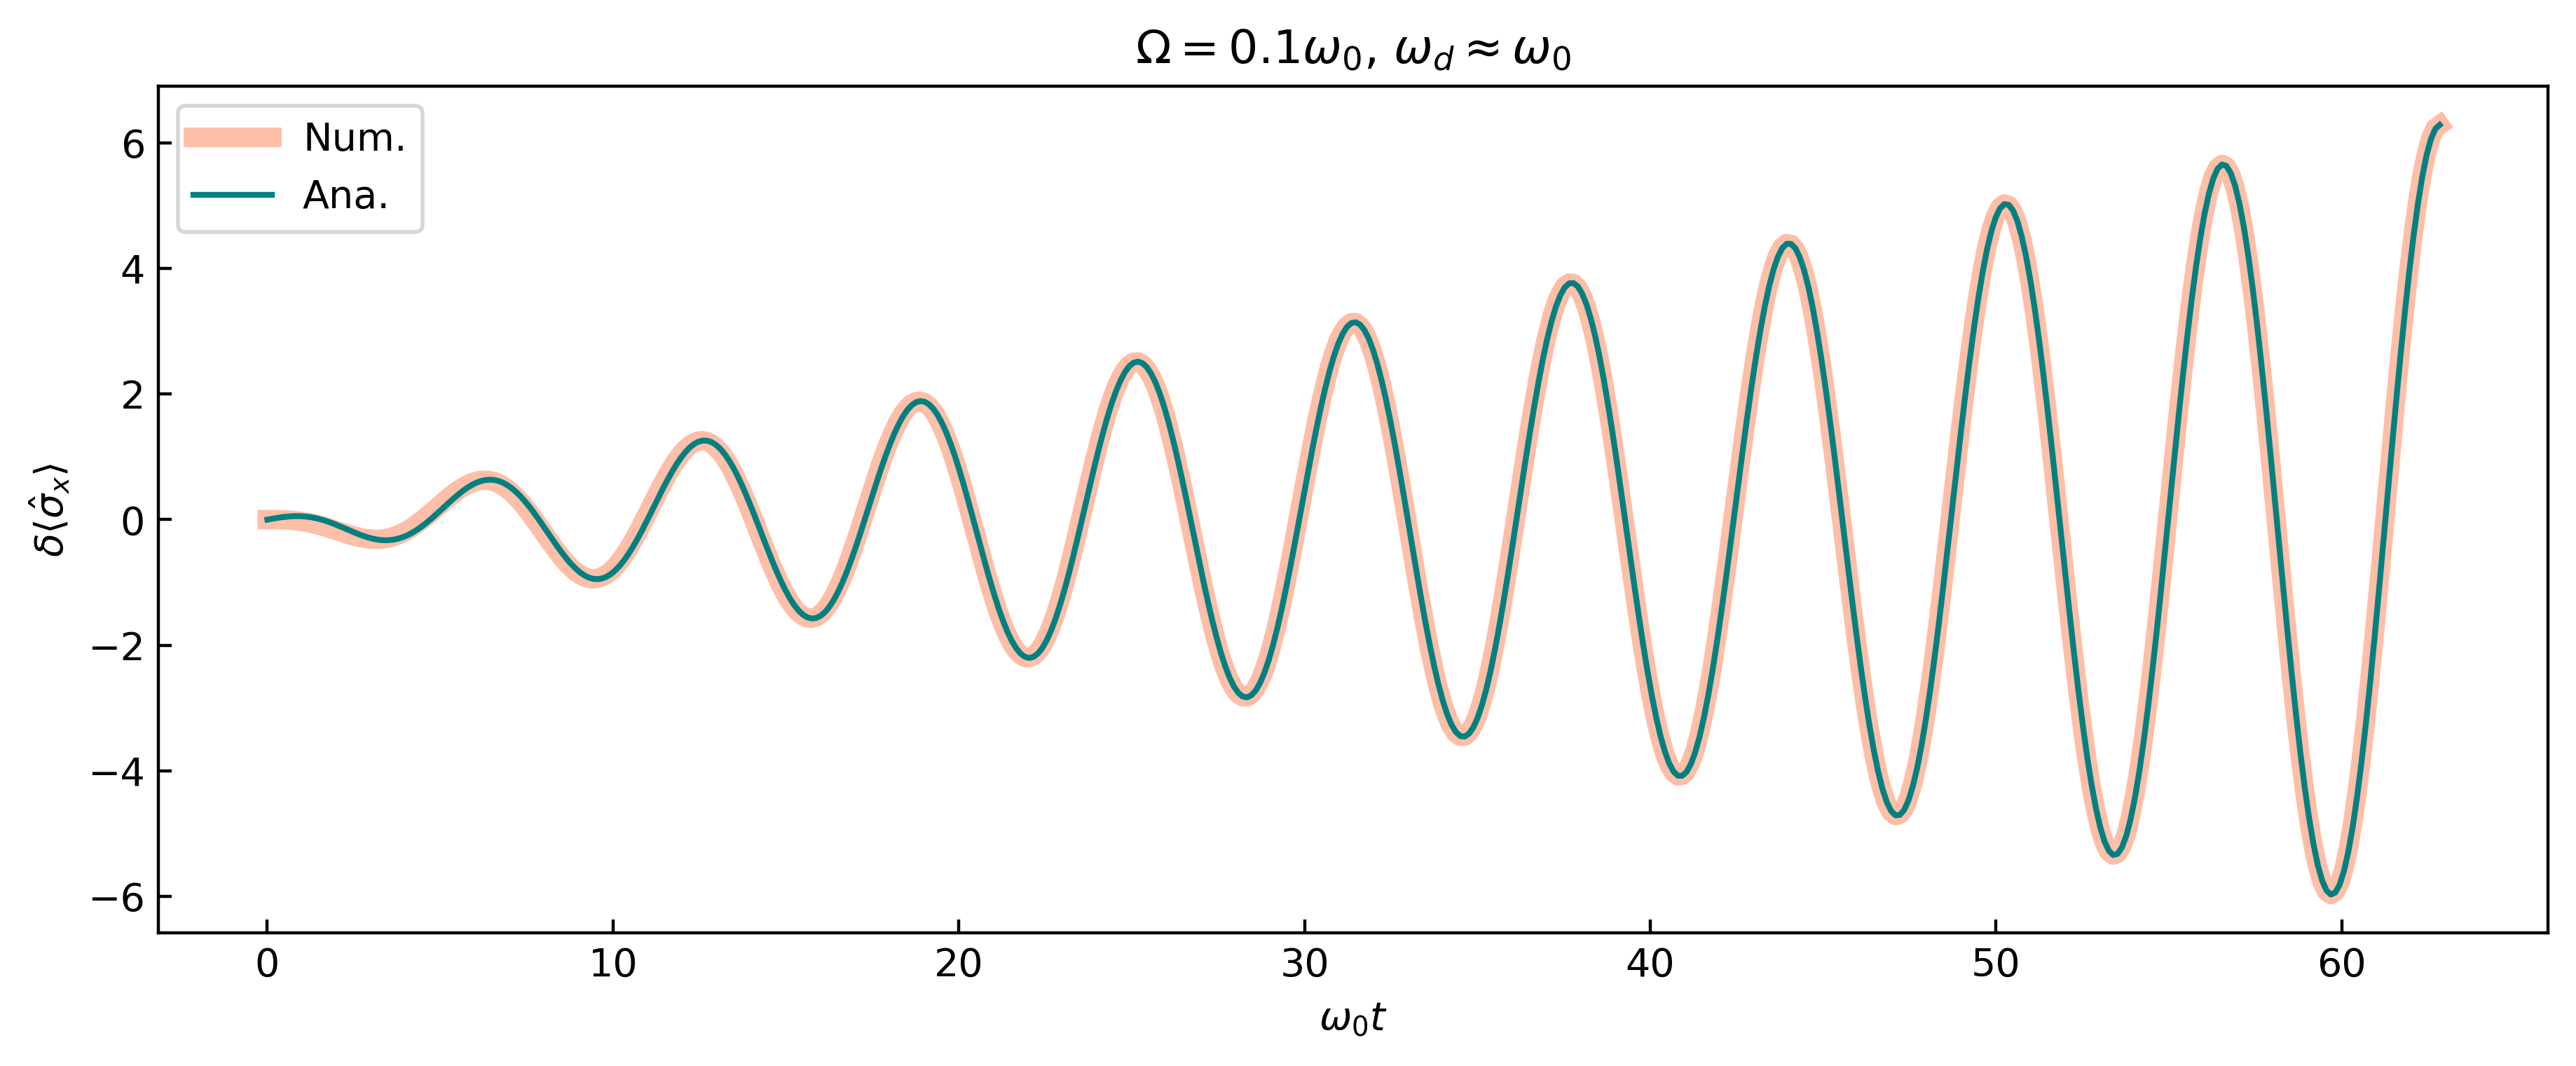

In [1]:
import numpy as np
import matplotlib.pyplot as plt
initial_state = np.array([[0], 
                          [1]])
w0 = 1
O = 0.1 * w0
wd = w0 * (1+1e-09)
#numerical result
def delta_x_num(w0, O, wd, t):
    return 2 * O * (wd * np.sin(w0*t) - w0 * np.sin(wd*t))/(w0**2 - wd**2)
#analytical result
def delta_x_a(w0, O, t):
    return O * t * np.cos(w0*t)
def delta_z(t):
    return 0
t = np.linspace(0, 20*np.pi/wd, 500)

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [delta_x_num(w0, O, wd, i) for i in t], c='coral', label='Num.', lw = 5, alpha=0.5)
plt.plot(t, [delta_x_a(w0, O, i) for i in t], c='teal', label = 'Ana.')
plt.title(r'$\Omega = 0.1\omega_0$, $\omega_d \approx \omega_0$')
plt.xlabel('$\omega_0t$')
plt.ylabel(r'$\delta \langle \hat{\sigma}_x \rangle$')
plt.tick_params(axis="both", direction="in")
plt.legend()
#plt.savefig('4ii.pdf', dpi=400)
plt.show()

In the following picture the derivation for $\delta \langle \hat{\sigma}_x \rangle (t)$ and $\delta \langle \hat{\sigma}_z \rangle (t)$ can be found. 
Notice that the later is equal to 0 at all times, and therefore it has not been considered relevant to plot it.
The limit $\lim_{\omega_d \to \omega_0} \delta \langle \hat{\sigma}_x \rangle (t)$ is also derived.

## 5
A driven two-level system is described in the interaction picture by the Hamiltonian

$$ \hat{H}_I = \frac{\hbar \Delta}{2}\hat{\sigma}_z + \frac{\hbar\Omega}{2} \left( \sin\varphi\hat{\sigma}_x - \cos\varphi \hat{\sigma}_y\right),$$

where $\Delta$ is the detuning, $\Omega$ is the Rabi frequency, and $\varphi$ is the phase of the driving field. Write down this Hamiltonian as a matrix and derive analytical expressions for its eigenvalues and eigenvectors. 

Use these results to write down an expression for the state of the system in the interaction picture $|\psi_I(t)\rangle$, assuming that the initial state is $|\psi(0)\rangle = |\downarrow\rangle$. 

Derive the probability to find the system in the state $|\uparrow\rangle$ at time $t$. What is the probability to find the system in the state $|\downarrow\rangle$ at time $t$?

## 6
Consider a general driven system with time-dependent Hamiltonian $\hat{H}(t)$. The evolution operator over the time interval $[t_i,t_f]$ is given by

$$ \hat{U}(t_f,t_i) = \overleftarrow{\rm T}\exp \left[ \frac{1}{{\rm i}\hbar}\int_{t_i}^{t_f}{\rm d}t \hat{H}(t)\right].$$

For numerical purposes, the Schrödinger-picture time evolution between two neighbouring grid points is

$$|\psi(t_{n+1})\rangle = \hat{U}(t_{n+1},t_n)|\psi(t_n)\rangle,$$

where $t_n = n\Delta t$. If $\Delta t$ is small enough that the Hamiltonian can be approximated as constant between $t_n$ and $t_{n+1}$, convince yourself that

$$ \hat{U}(t_{n+1},t_n) \approx {\rm e}^{-{\rm i}\Delta t\hat{H}(t_n)/\hbar}. $$      

Now specialise to a driven qubit with Hamiltonian

$$\hat{H}(t) = \tfrac{1}{2}\hbar \omega_0 \hat{\sigma}_z  + \hbar \Omega \sin(\omega_{\rm d}t)\hat{\sigma}_x.$$

Compute the time evolution of the state in the Schrödinger picture numerically using the above approximation for $\hat{U}(t_{n+1},t_n)$. Consider the evolution up to time $t=100\omega_0^{-1}$, for a near-resonant drive, $\omega_{\rm d} = 0.99\omega_0$, and Rabi frequency $\Omega = 0.1\omega_0$. Choose the initial state to be $|\psi(0)\rangle = |\downarrow\rangle$ and the timestep to be $\Delta t=0.05\omega_0^{-1}$. Plot the expectation values of the three Pauli operators as a function of dimensionless time $\omega_0 t$ and compare your predictions to those of the rotating-wave approximation. Repeat the comparison for $\Omega = \omega_0$. Comment briefly on the validity of the rotating-wave approximation in each case. (Hint: you are always free to work in a convenient unit system, e.g. by choosing units of time such that $\omega_0=1$.)

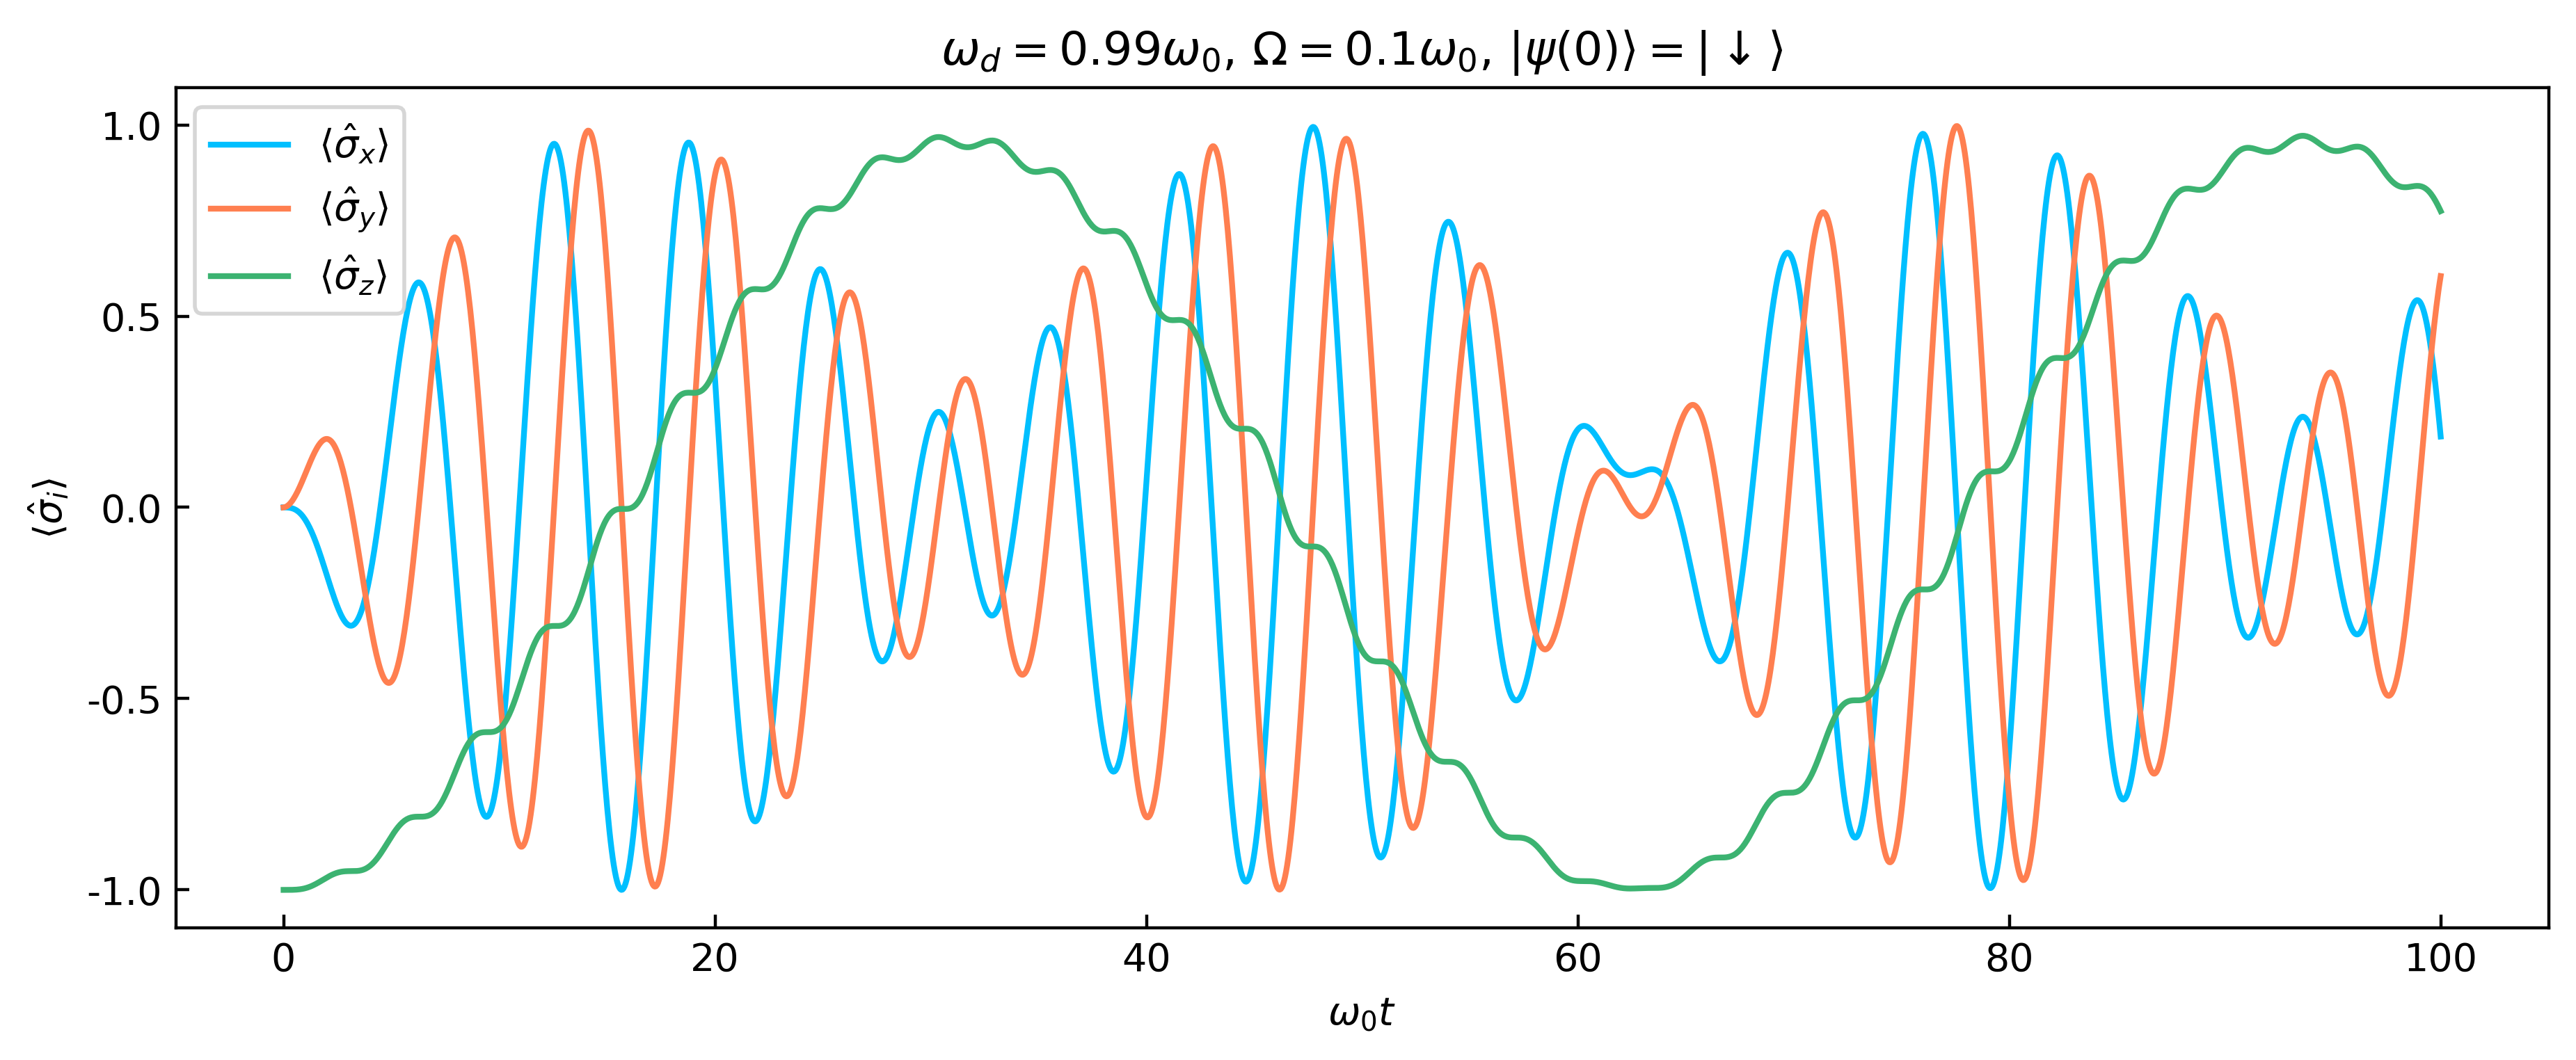

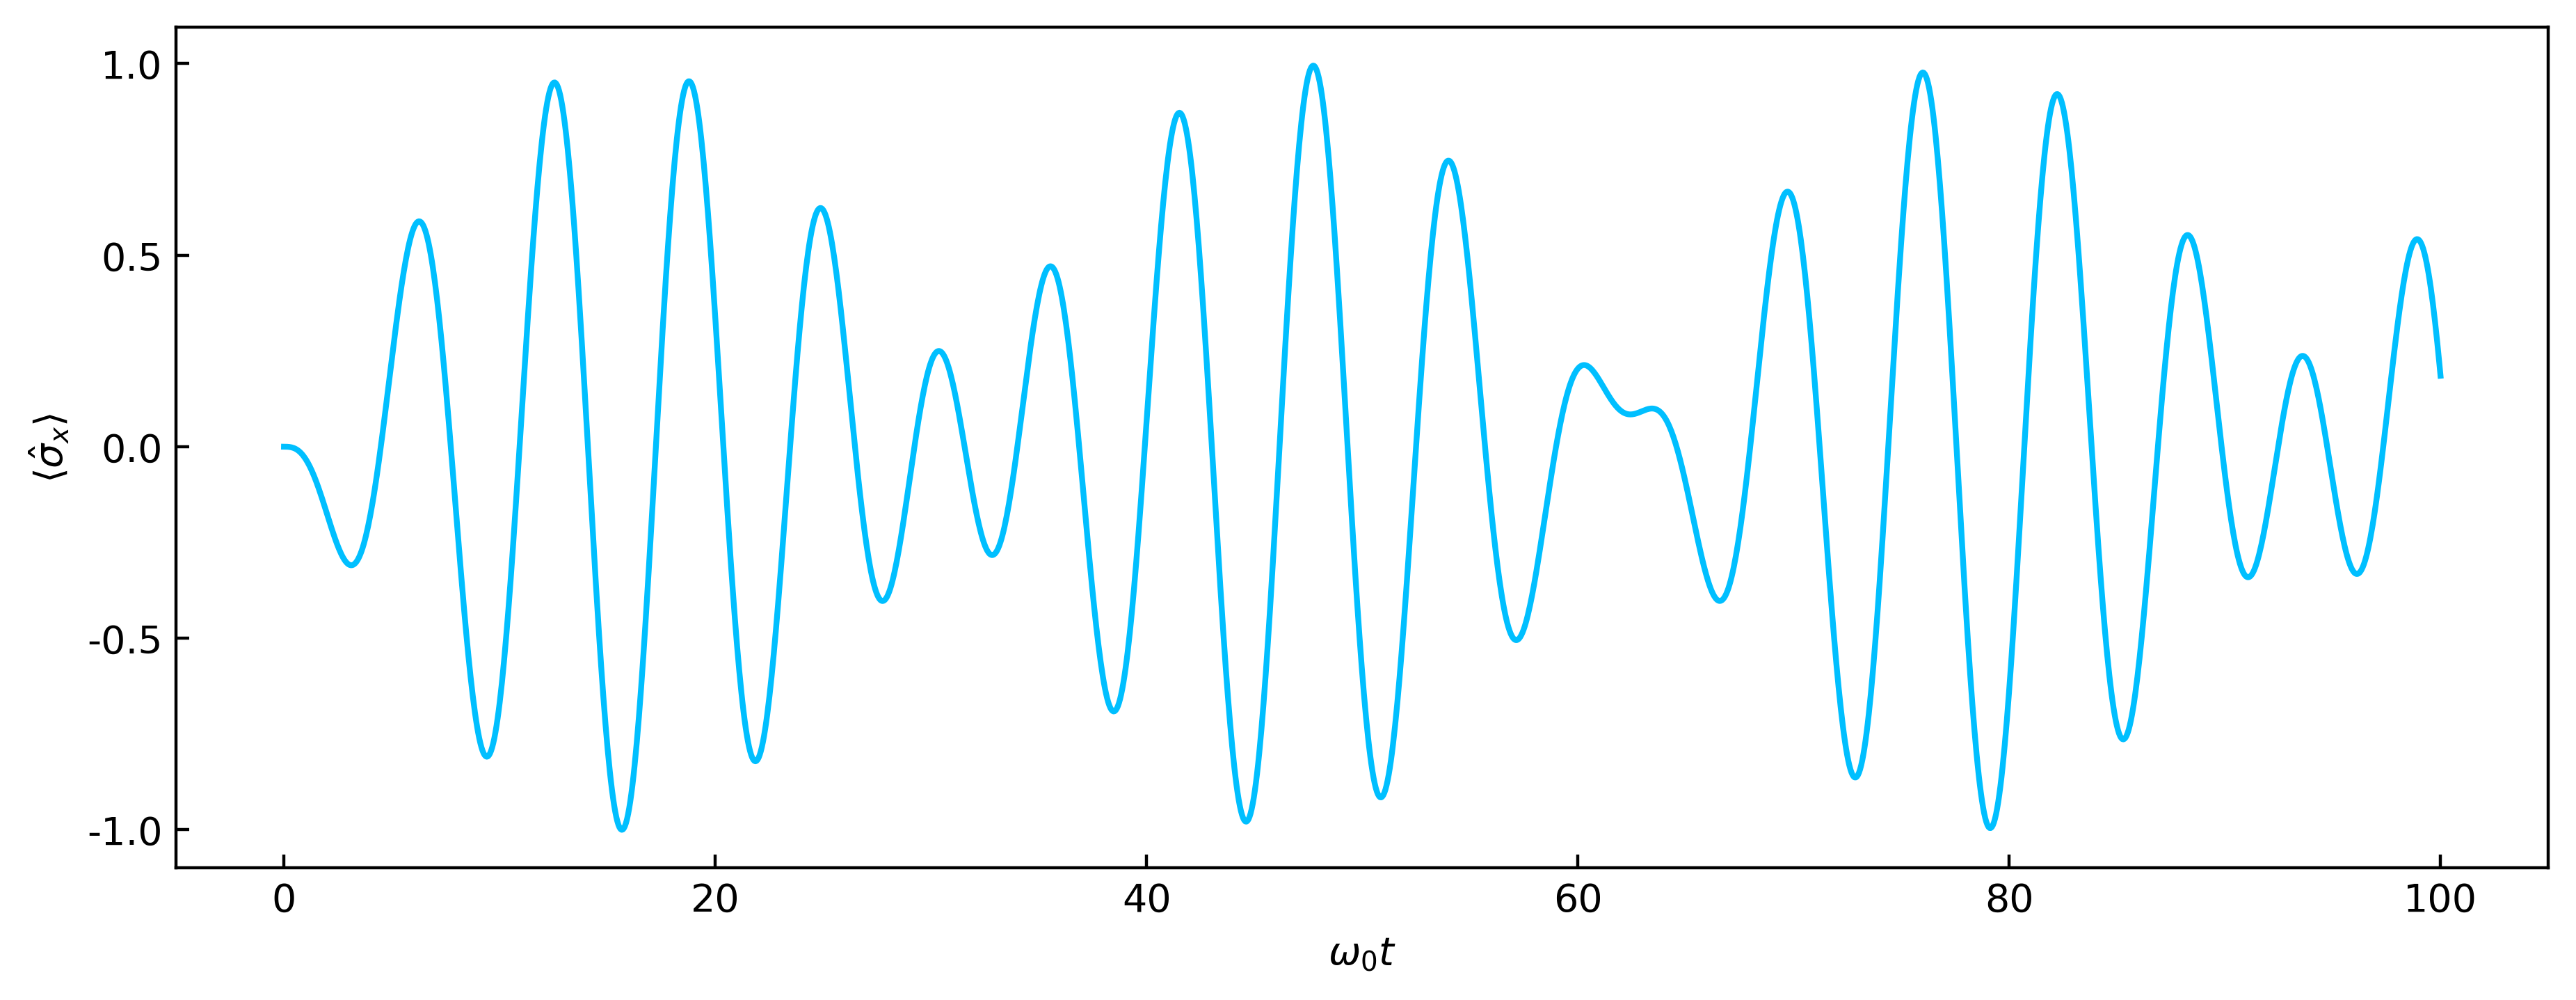

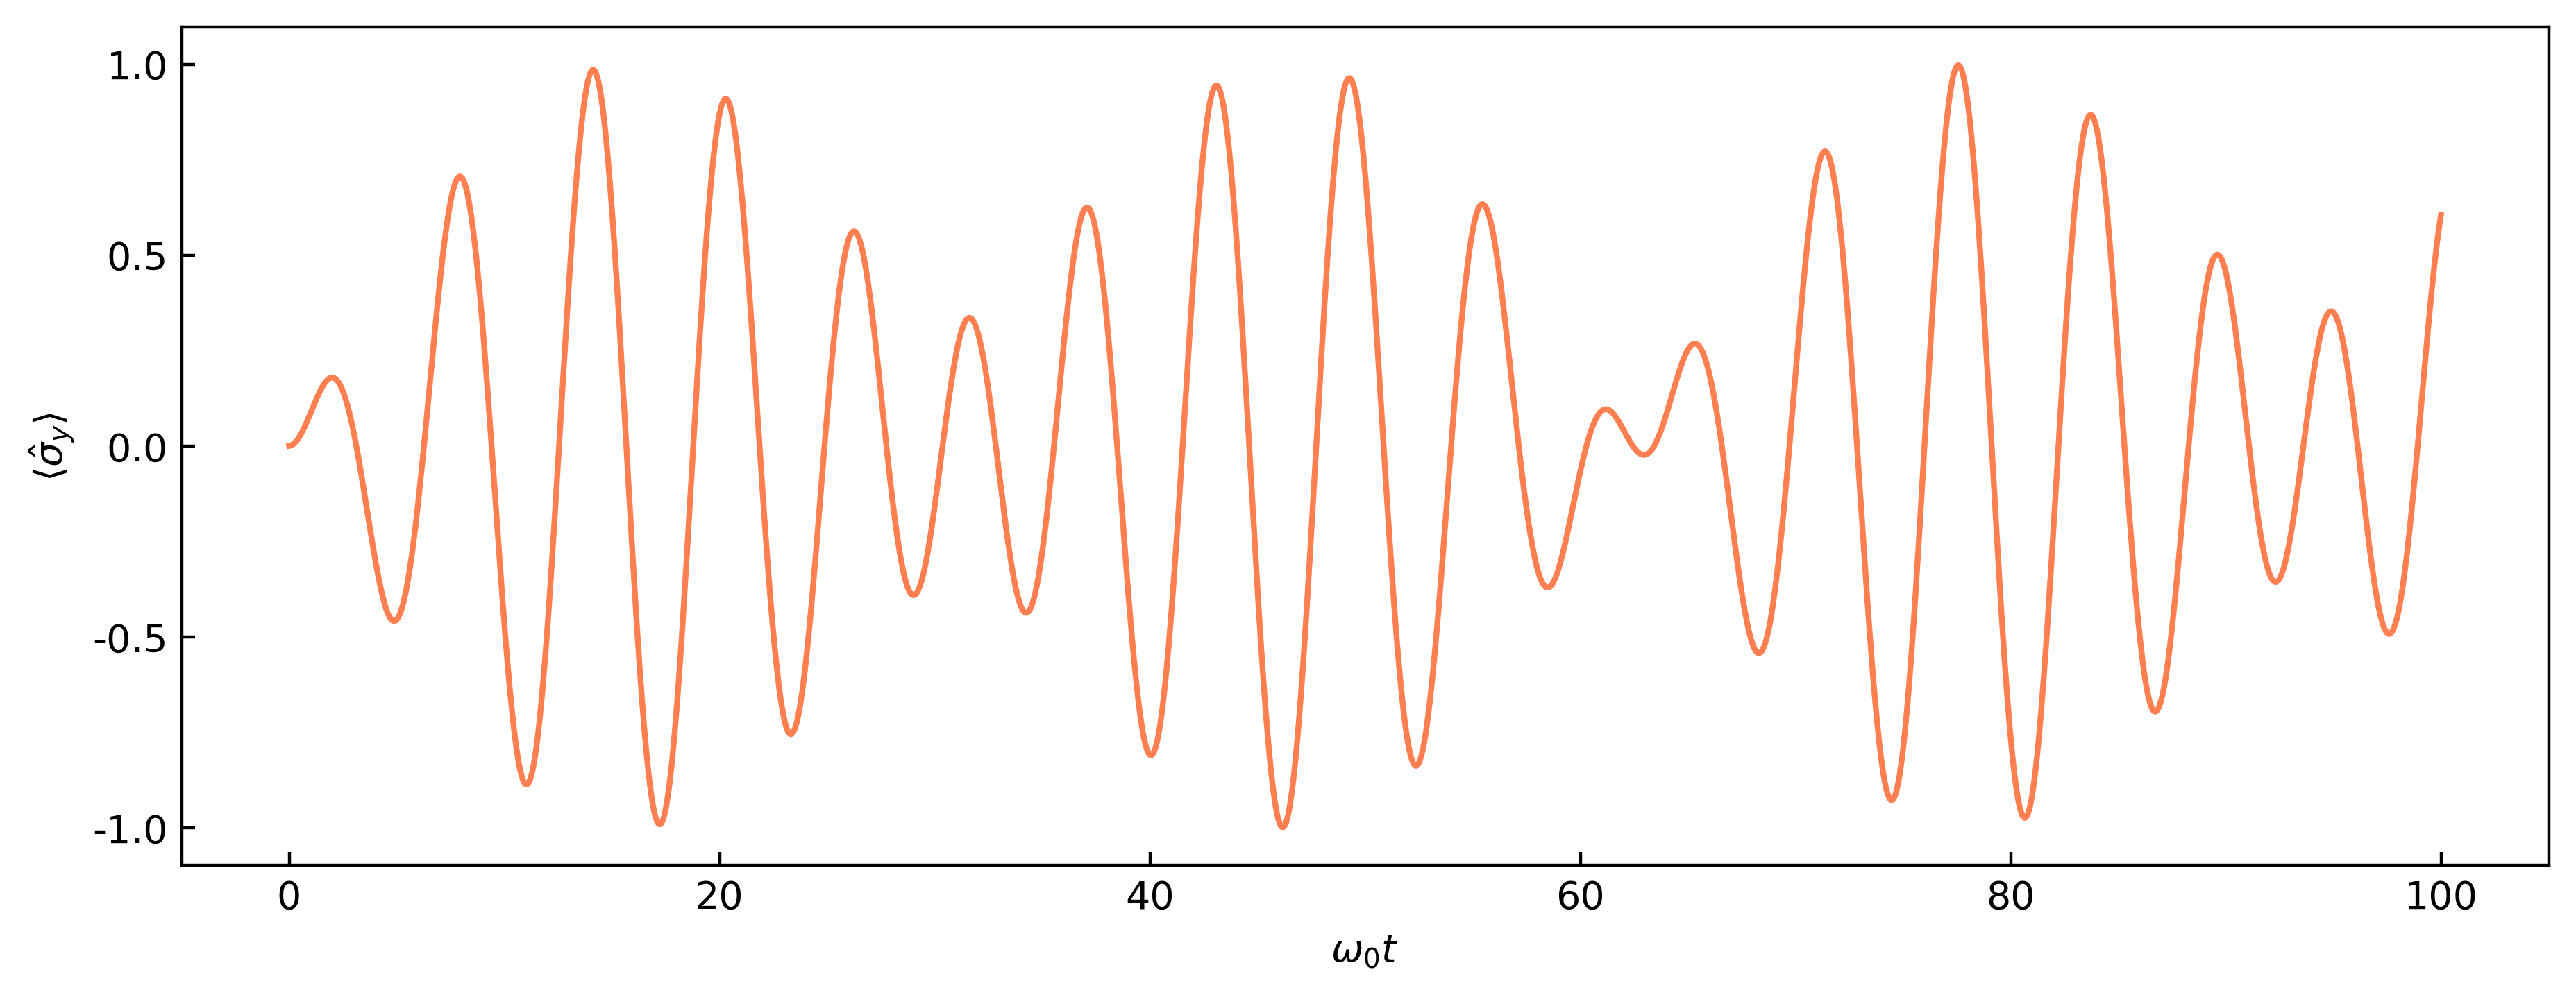

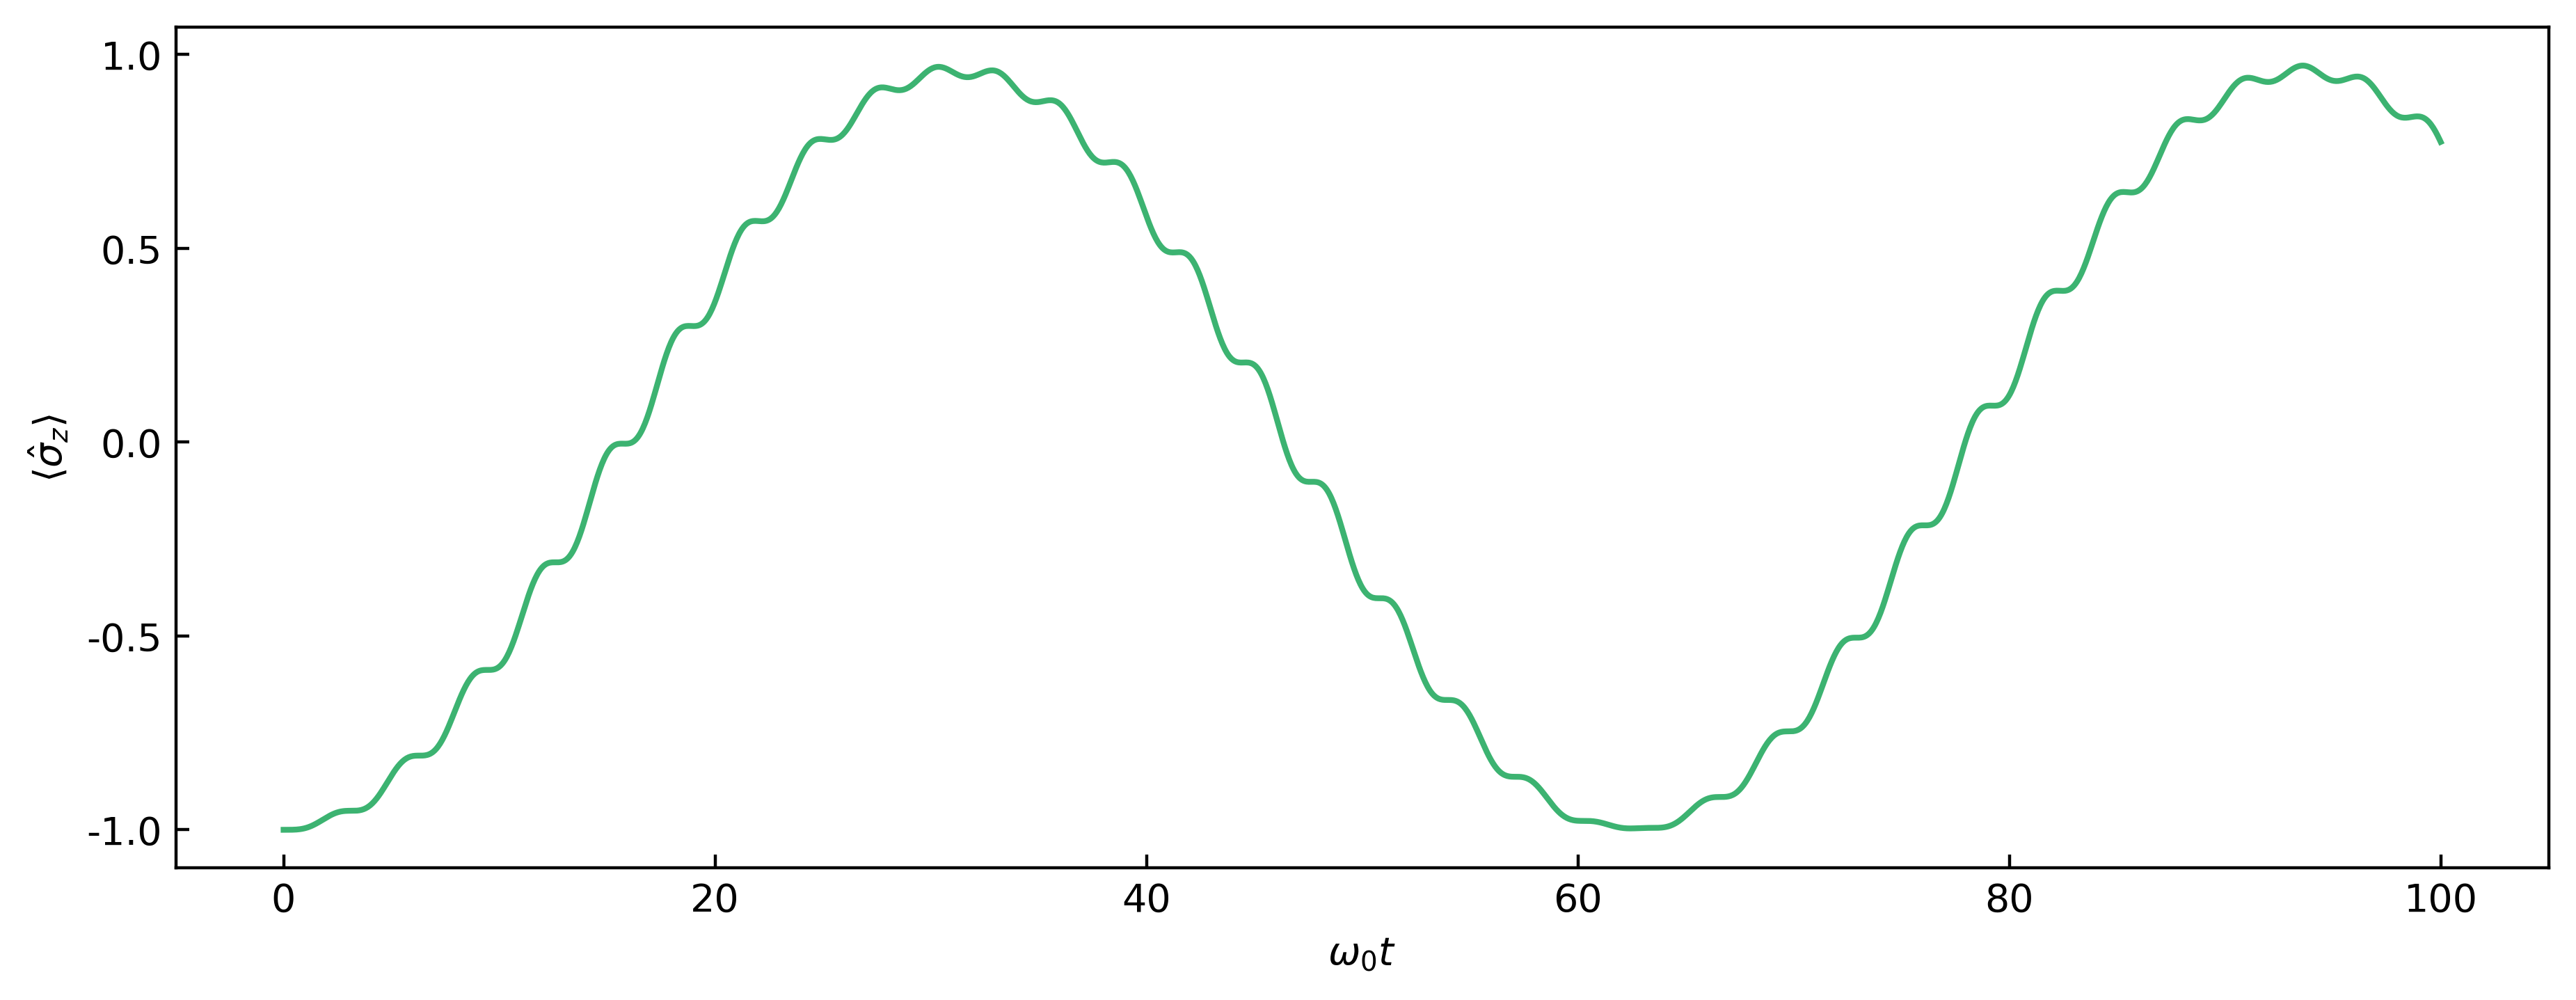

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#defining values
w0 = 1
t_f = 100/w0 #final value
dt = 0.05/w0
N = int(t_f/dt) #amount of values from 0 to t=100/w0 with a separation of dt=0.05/w0
t = np.linspace(0, t_f, N)
wd = 0.99*w0
O = 0.1*w0
initial_state = np.array([[0],
                          [1]])

#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

#Hamiltonian/hbar
def H(time):
    return w0/2 * Z + O * np.sin(wd*time) * X

#evolution operator
def unitary_evolution(time, vector):
    return expm(-1j* dt * H(time)) @ vector

#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

state = initial_state #variable that will change at every time
all_states = [] #list to store the expectation values of the new states generated at every discrete time slot
for i in range(N):
    state =  unitary_evolution(t[i], state)
    all_states.append(np.array([[expectation_value(state, X)],
                                [expectation_value(state, Y)],
                                [expectation_value(state, Z)]])) #the expectation values are stored as a vector for every time

    
#plot of all the expectation values together
plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle$', c='deepskyblue')
plt.plot(t, [all_states[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle$', c='coral')
plt.plot(t, [all_states[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle$', c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_i\rangle$')
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.title(r'$\omega_d=0.99\omega_0$, $\Omega=0.1\omega_0$, $|\psi(0)\rangle = |\downarrow\rangle$')
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
#plt.savefig('6i.pdf', dpi=400)

plt.show()

#plot of expectation values separately
plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][0][0] for i in range(N)], c='deepskyblue')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_x\rangle$')
plt.tick_params(axis="both", direction="in")
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.show()

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][1][0] for i in range(N)], c='coral')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_y\rangle$')
plt.tick_params(axis="both", direction="in")
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.show()

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][2][0] for i in range(N)], c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_z\rangle$')
plt.tick_params(axis="both", direction="in")
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.show()

As it has been seen in class, the solution for the given $\hat{H}(t)$ under the rotating wave approximation is:
$$ \hat{H}_I = \frac{\hbar}{2}\left((\omega_0-\omega_d)\hat{\sigma}_z - \Omega\hat{\sigma}_y \right)$$
The approximation should be correct as long as the frequency of the driving field $\omega_d$ is near ressonance with the system transition's $\omega_0$ ($\omega_d\sim\omega_0$) and the coupling is weak ($\Omega\ll\omega_0$).

The values obtained with the RWA derivation are shown in the following plot. The expectation value of the operator describing the population of the ground and excited states ($\langle\hat{\sigma}_z\rangle$) is very similar in the analytical expression under the RWA and the numerical calculation performed in the previous cell of code.

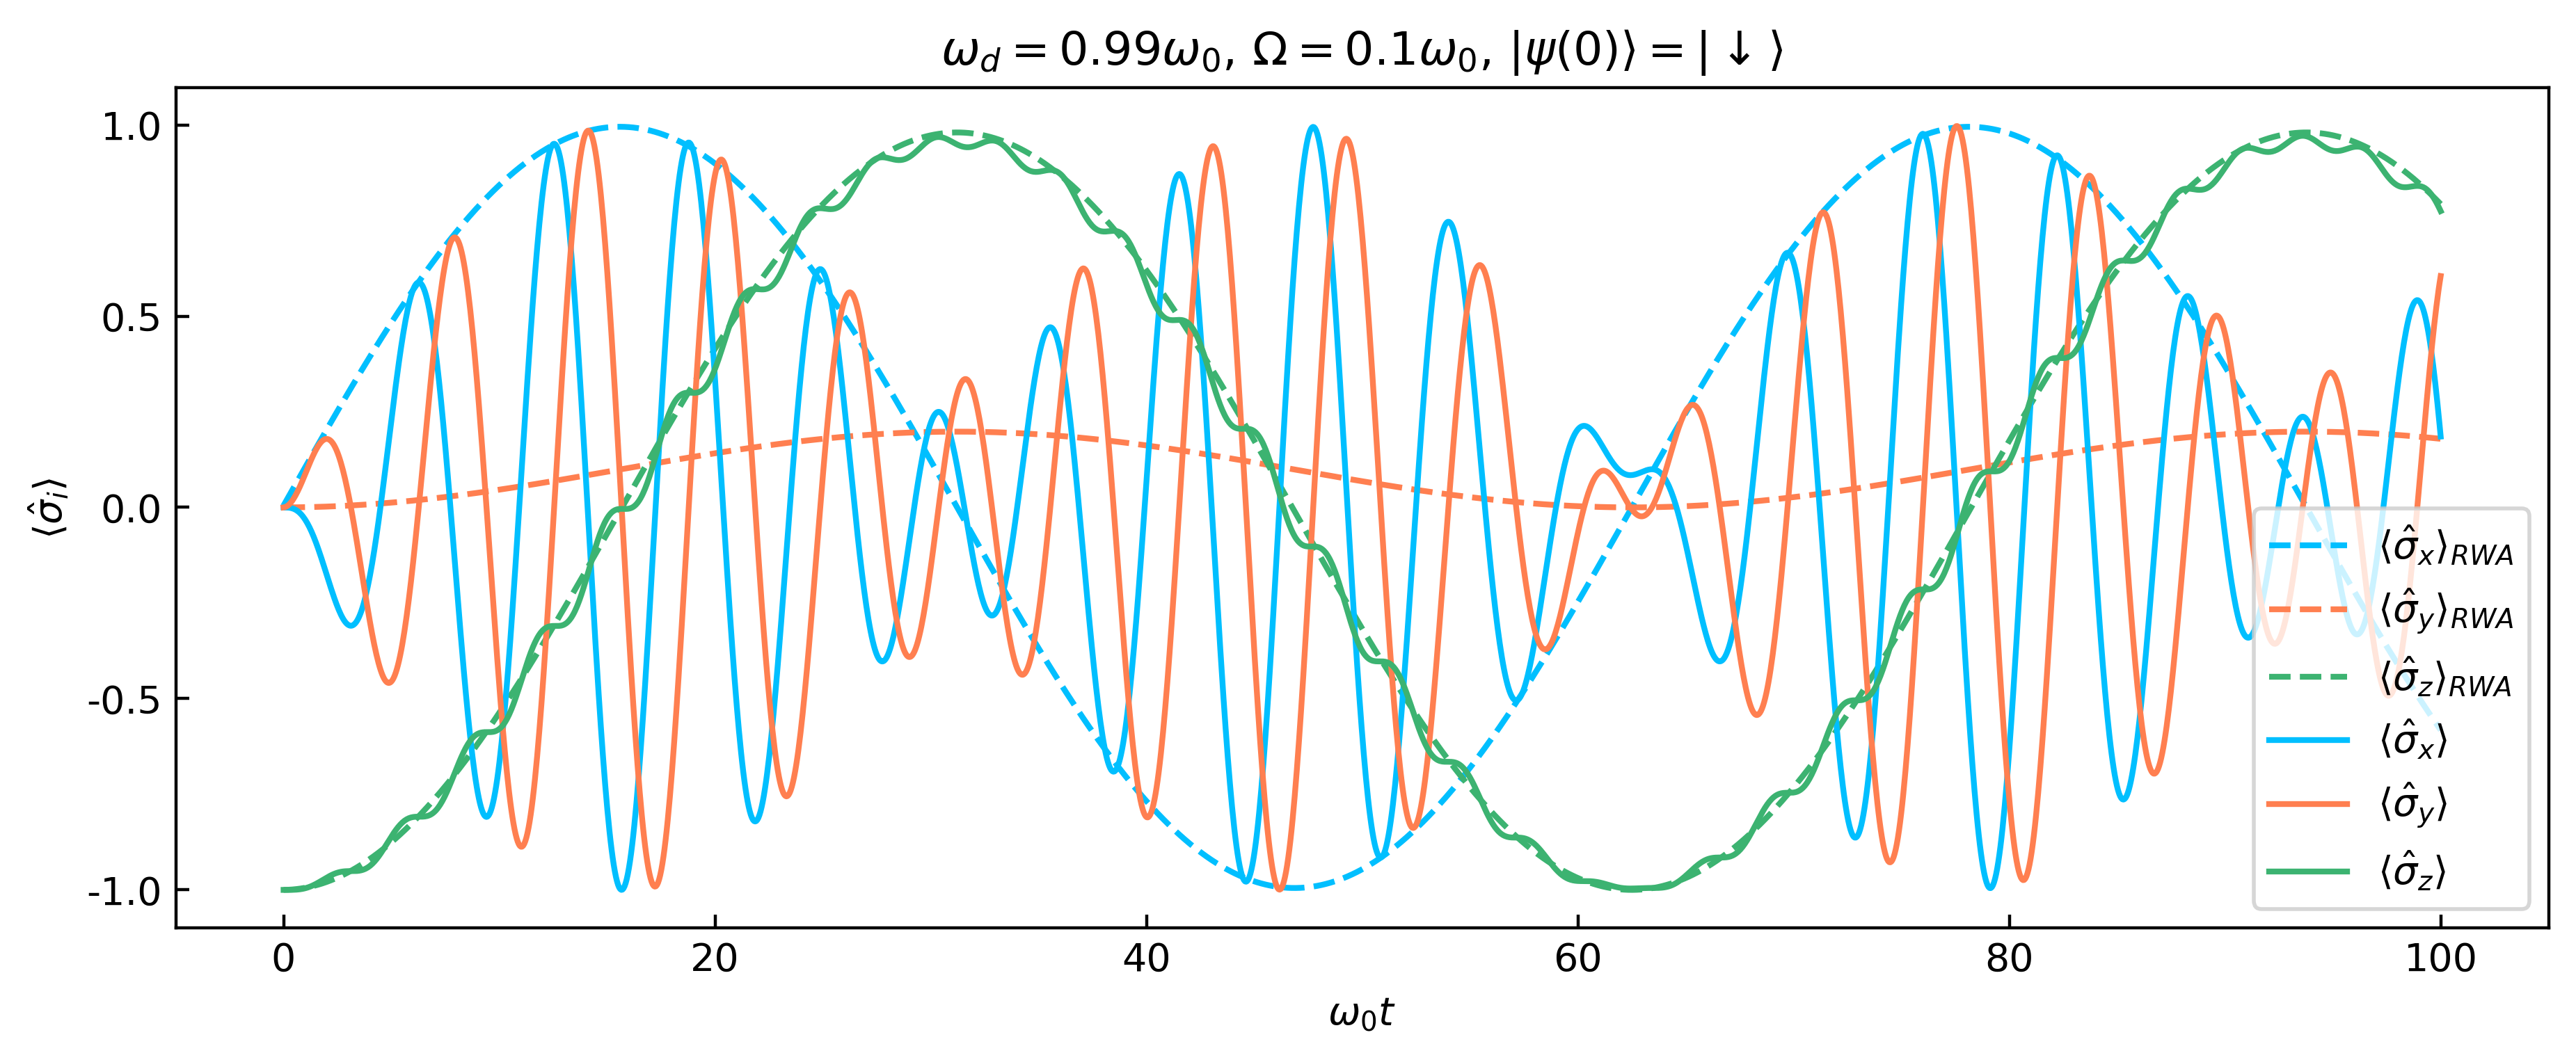

In [2]:
#for this cell to run you need the previous one first, since it reuses some calculated data

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#defining values
w0 = 1
t_f = 100/w0 #final value
dt = 0.05/w0
N = int(t_f/dt) #amount of values from 0 to t=100/w0 with a separation of dt=0.05/w0
t = np.linspace(0, t_f, N)
wd = 0.99*w0
O = 0.1*w0
initial_state = np.array([[0],
                          [1]])

#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

#Hamiltonian/hbar
def H_I(time):
    return (w0-wd)/2 * Z - O/2 *Y

#evolution operator
def unitary_evolution(time,vector):
    return expm(-1j* dt * H_I(time)) @ vector

#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

state = initial_state #variable that will change at every time
all_states_rwa = []
for i in range(N):
    state =  unitary_evolution(t[i],state)
    all_states_rwa.append(np.array([[expectation_value(state, X)],
                                [expectation_value(state, Y)],
                                [expectation_value(state, Z)]]))

    
#plot of all the expectation values together
plt.figure(figsize = (11,4), dpi=400)
#plots under RWA
plt.plot(t, [all_states_rwa[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle_{RWA}$', c='deepskyblue', ls ='--')
plt.plot(t, [all_states_rwa[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle_{RWA}$', c='coral', ls ='--')
plt.plot(t, [all_states_rwa[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle_{RWA}$', c='mediumseagreen', ls ='--')
#plots without RWA
plt.plot(t, [all_states[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle$', c='deepskyblue')
plt.plot(t, [all_states[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle$', c='coral')
plt.plot(t, [all_states[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle$', c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_i\rangle$')
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.title(r'$\omega_d=0.99\omega_0$, $\Omega=0.1\omega_0$, $|\psi(0)\rangle = |\downarrow\rangle$')
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
#plt.savefig('6irwa.pdf', dpi=400)

plt.show()

In the case of $\Omega=\omega_0$ we get the following dynamics:

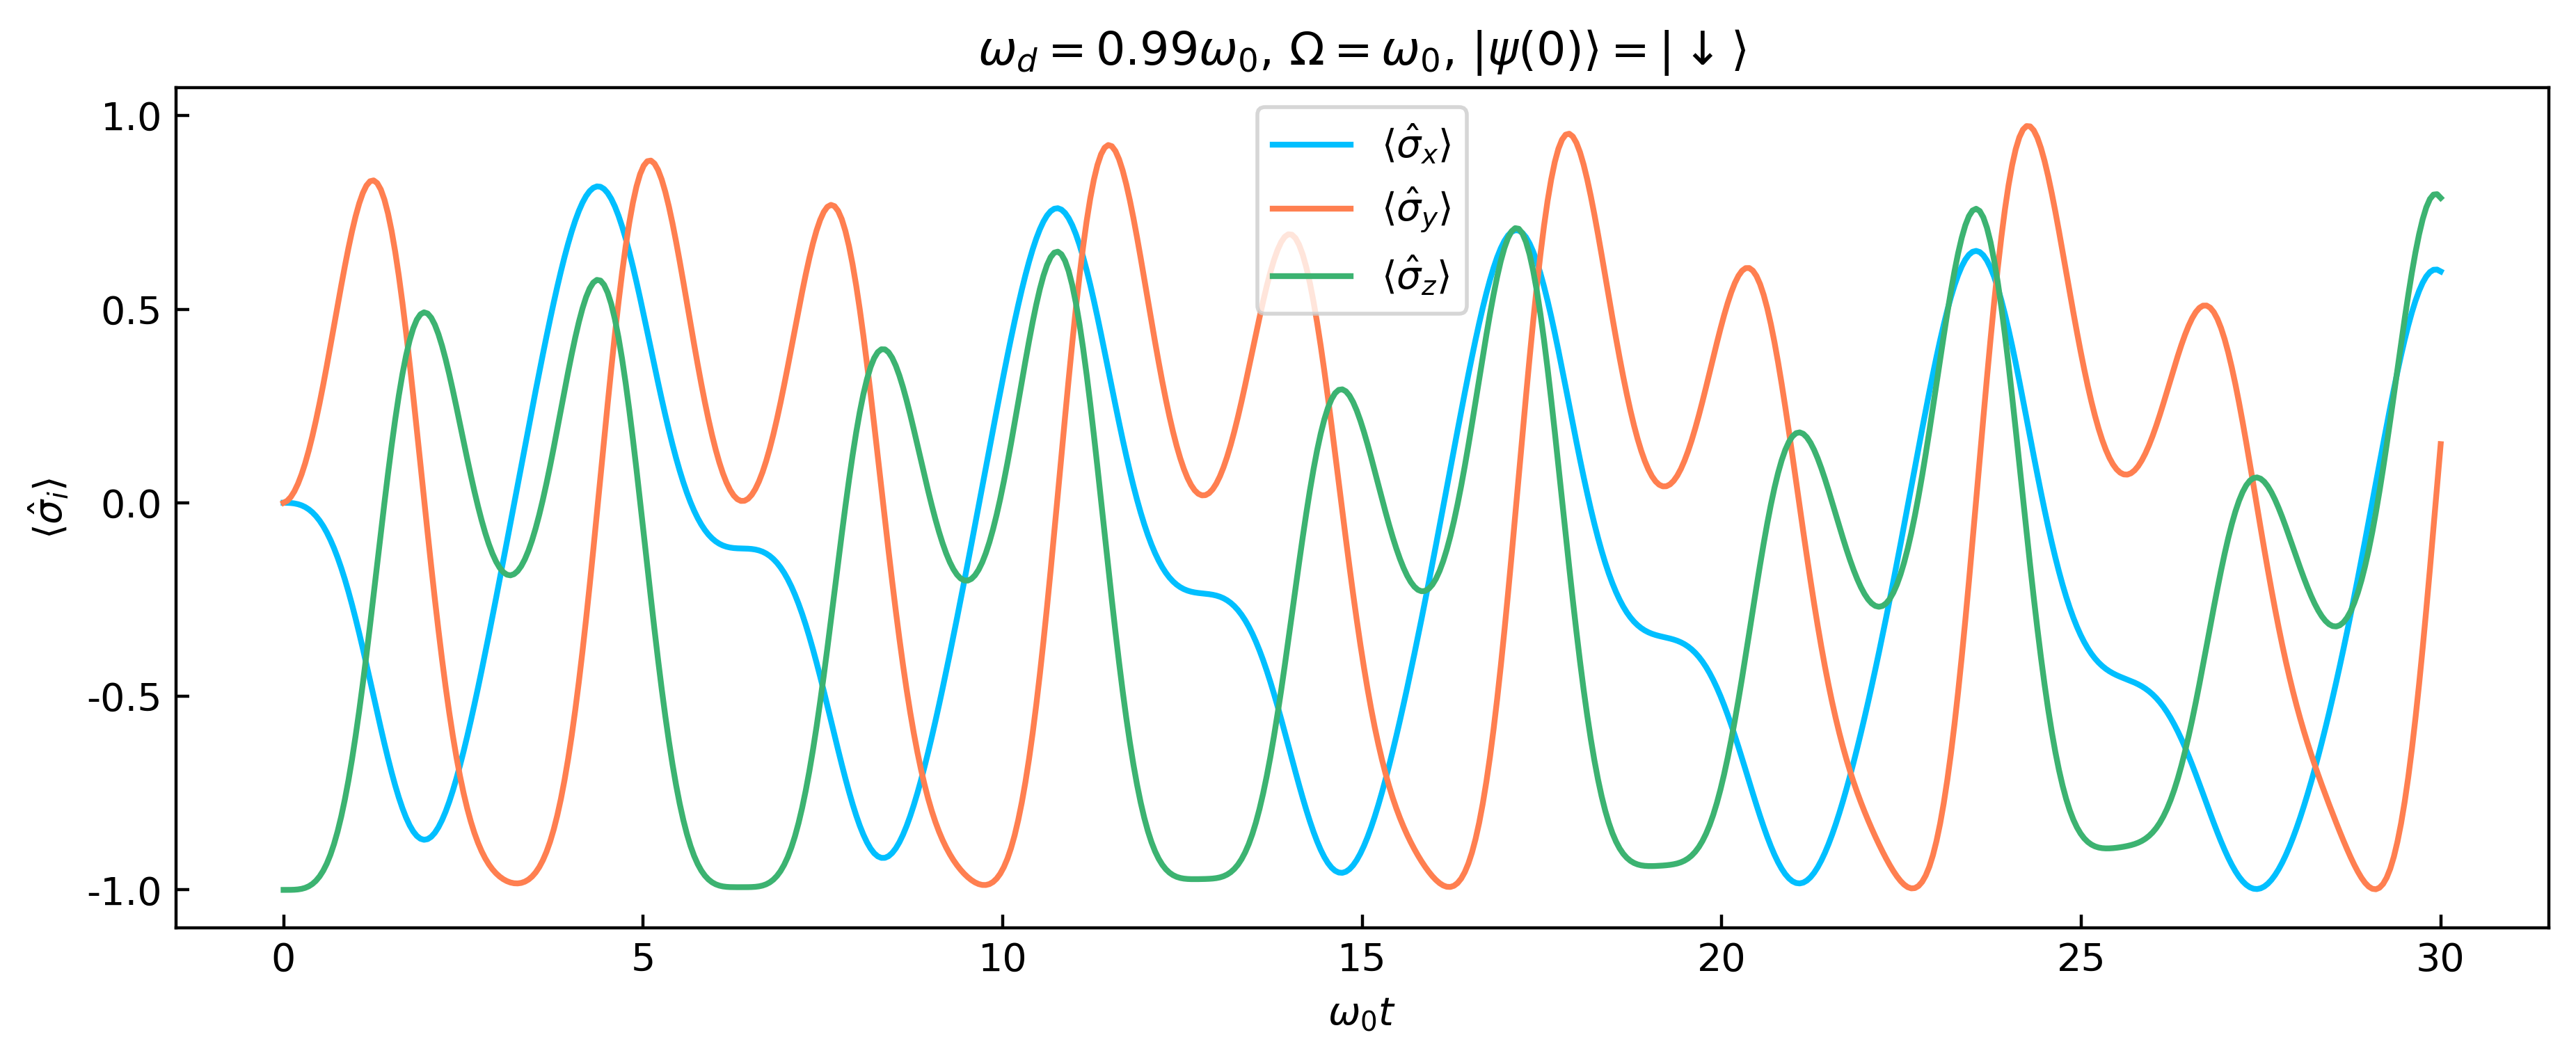

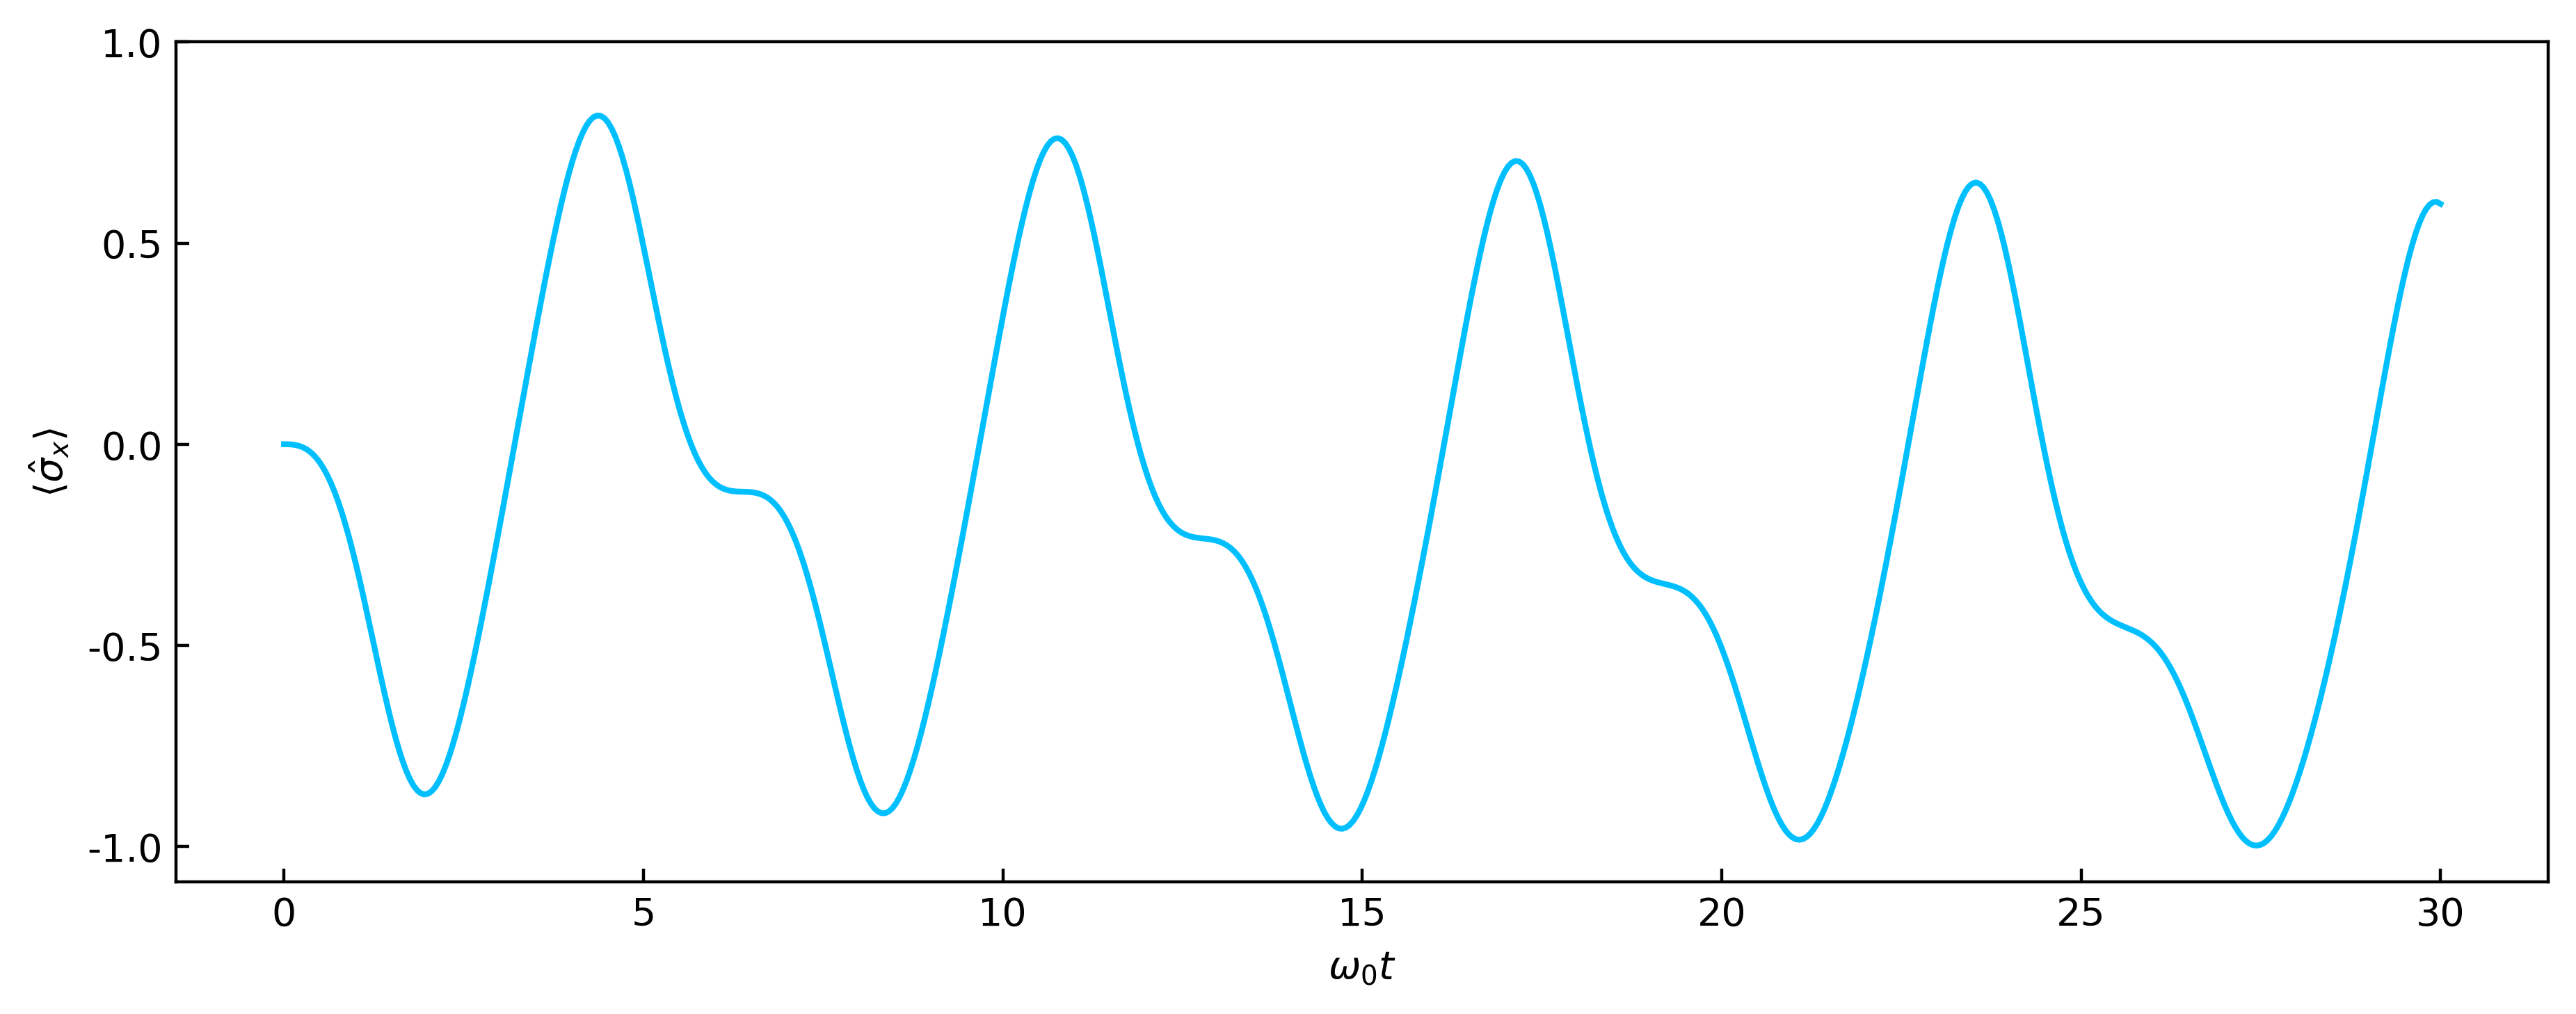

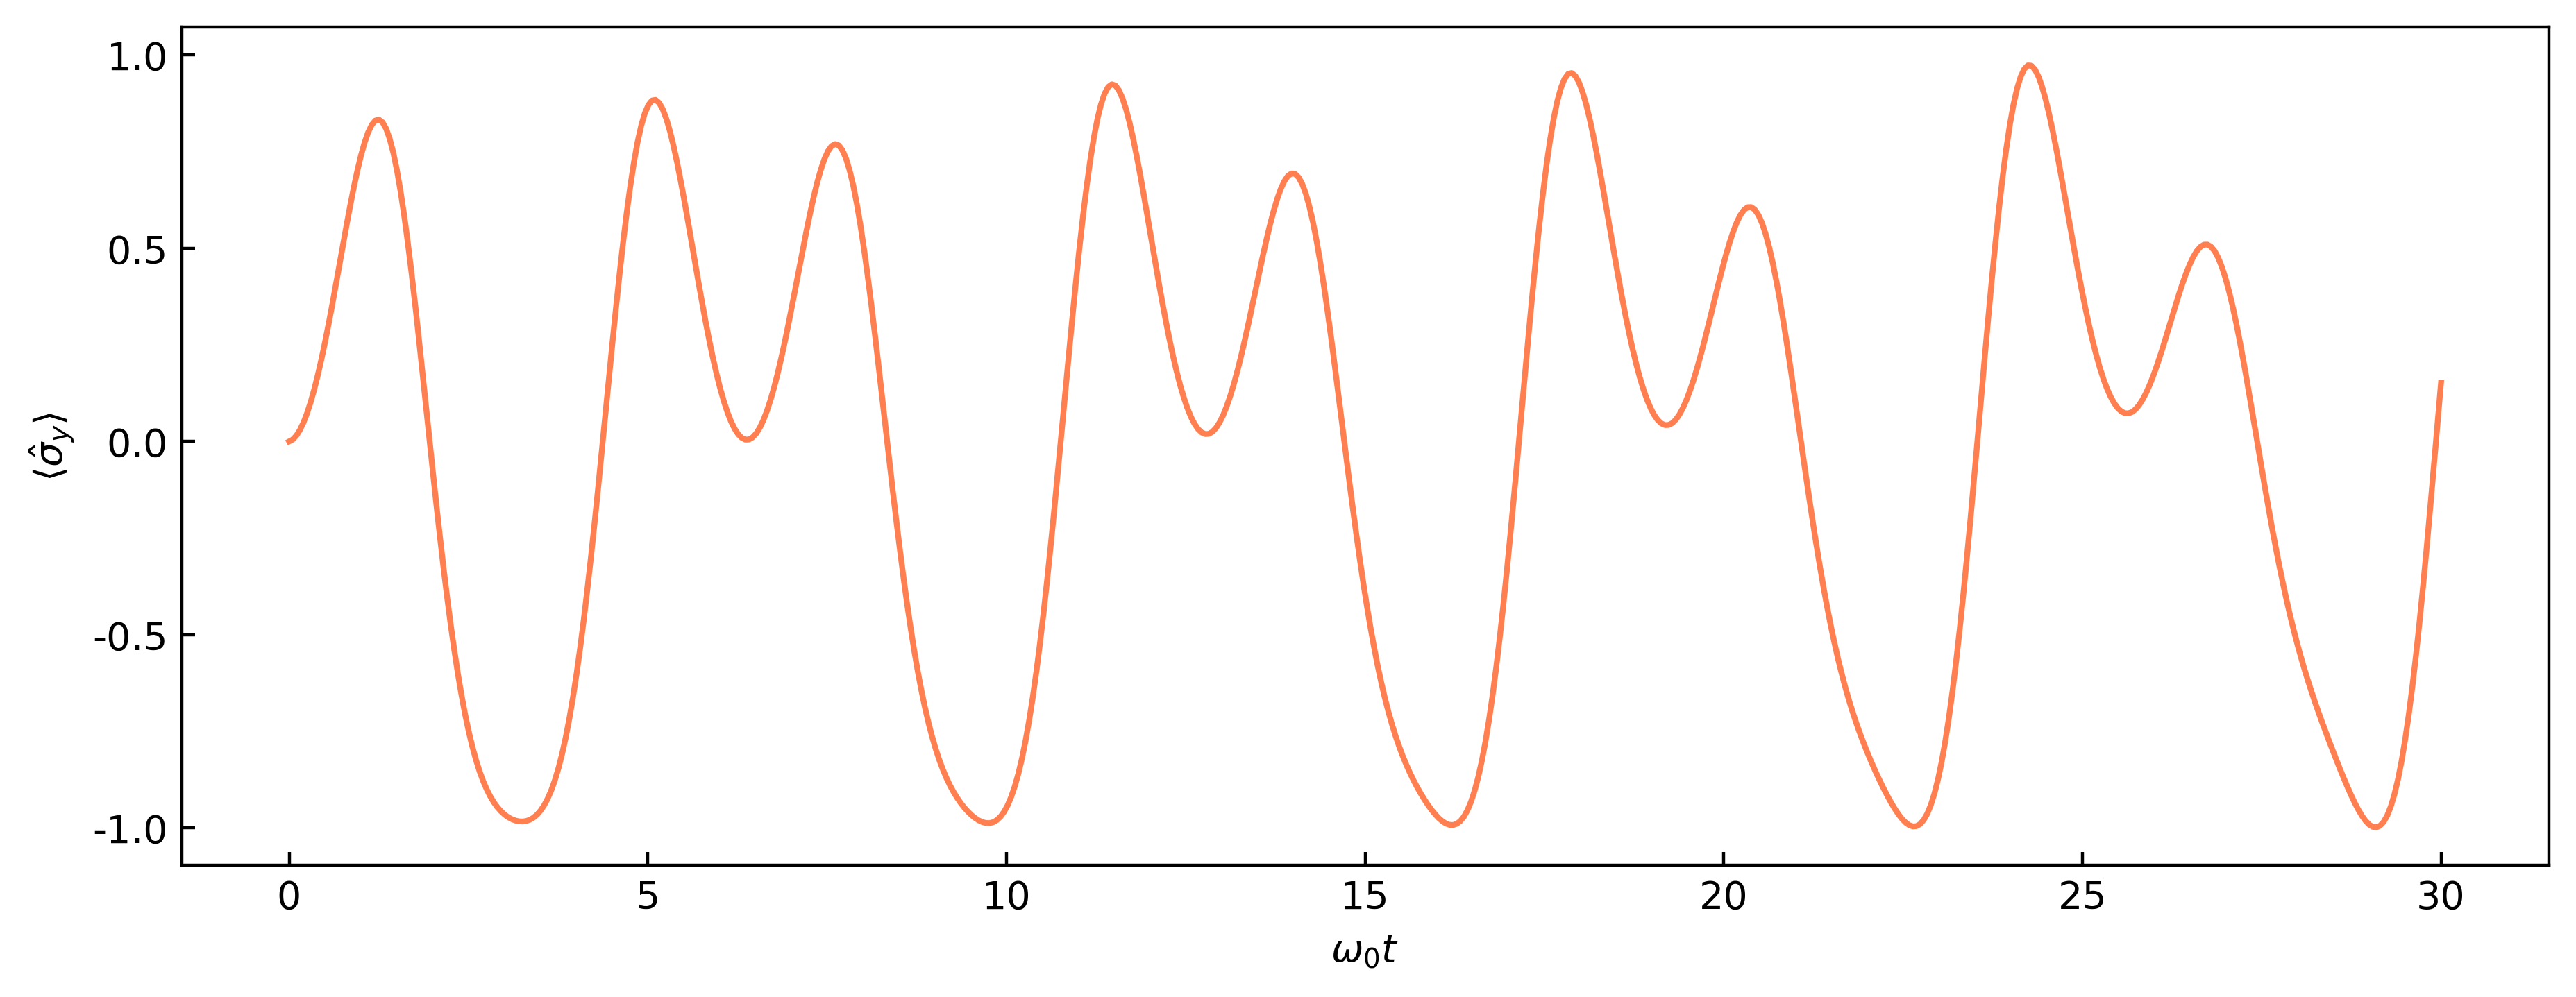

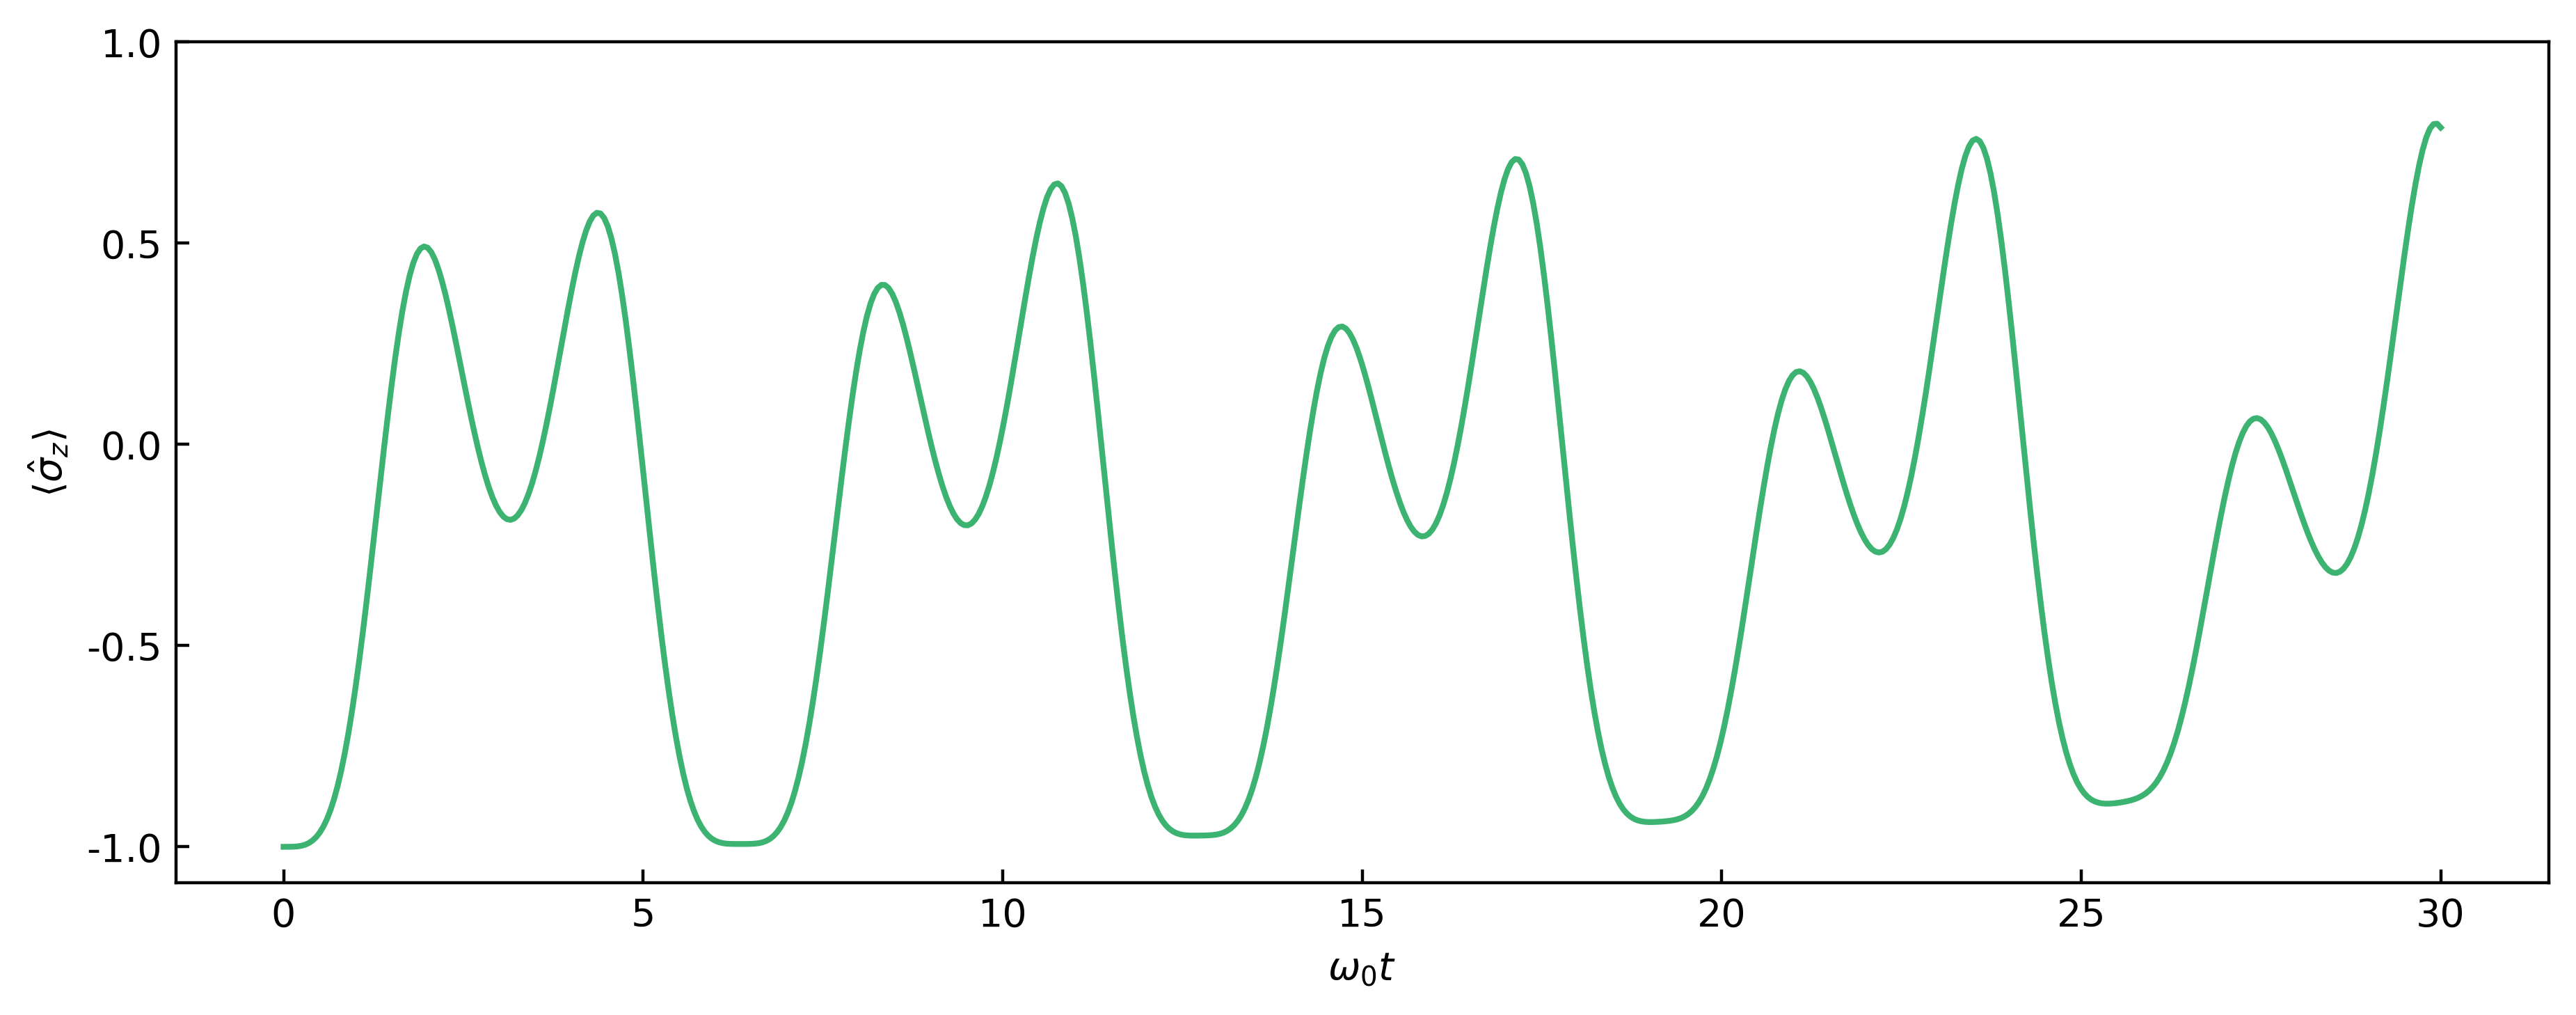

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#defining values
w0 = 1
t_f = 30/w0 #final value
dt = 0.05/w0
N = int(t_f/dt) #amount of values from 0 to t=100/w0 with a separation of dt=0.05/w0
t = np.linspace(0, t_f, N)
wd = 0.99*w0
O = w0
initial_state = np.array([[0],
                          [1]])

#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

#Hamiltonian/hbar
def H(t):
    return w0/2 * Z + O * np.sin(wd*t) * X


def unitary_evolution(time, vector):
    return expm(-1j* dt * H(time)) @ vector

#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

state = initial_state #variable that will change at every time
all_states = []
for i in range(N):
    state =  unitary_evolution(t[i], state)
    all_states.append(np.array([[expectation_value(state, X)],
                                [expectation_value(state, Y)],
                                [expectation_value(state, Z)]]))

    
#plot of all the expectation values together
plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle$', c='deepskyblue')
plt.plot(t, [all_states[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle$', c='coral')
plt.plot(t, [all_states[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle$', c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_i\rangle$')
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.title(r'$\omega_d=0.99\omega_0$, $\Omega=\omega_0$, $|\psi(0)\rangle = |\downarrow\rangle$')
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
#plt.savefig('6ii.pdf', dpi=400)

plt.show()

#plot of expectation values separately
plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][0][0] for i in range(N)], c='deepskyblue')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_x\rangle$')
plt.tick_params(axis="both", direction="in")
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.show()

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][1][0] for i in range(N)], c='coral')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_y\rangle$')
plt.tick_params(axis="both", direction="in")
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.show()

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [all_states[i][2][0] for i in range(N)], c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_z\rangle$')
plt.tick_params(axis="both", direction="in")
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.show()

In this case, the RWA does not apply anymore because the weak coupling condition $\Omega\ll\omega_0$ is broken. It can be seen that the expression obtained after considering the RWA does not display the same behavior than the numerical result:

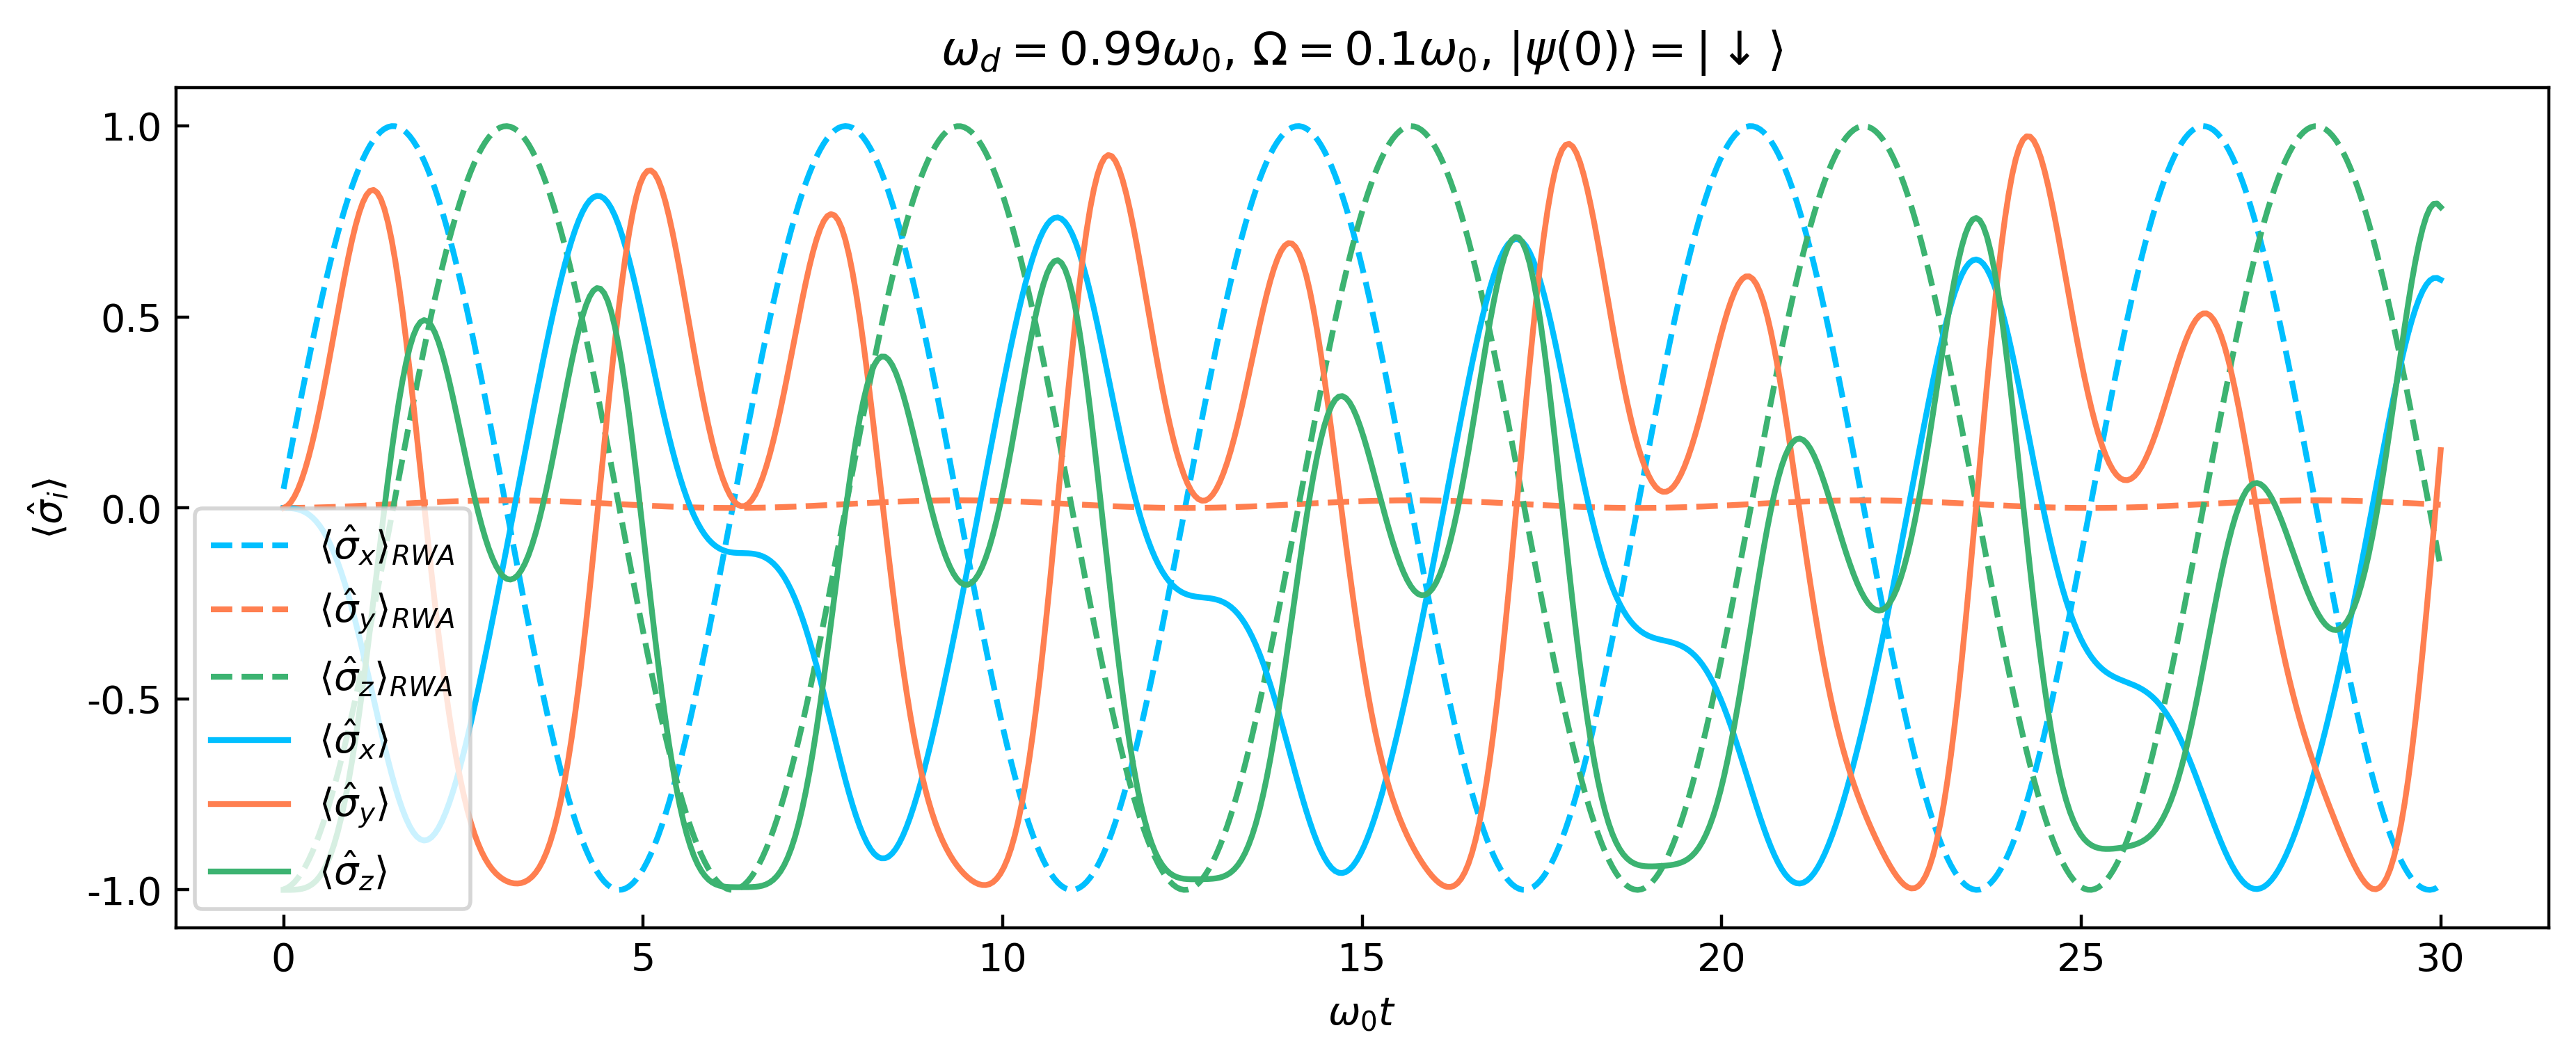

In [2]:
#for this cell to run you need the previous one first, since it reuses some calculated data

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#defining values
w0 = 1
t_f = 30/w0 #final value
dt = 0.05/w0
N = int(t_f/dt) #amount of values from 0 to t=100/w0 with a separation of dt=0.05/w0
t = np.linspace(0, t_f, N)
wd = 0.99*w0
O = w0
initial_state = np.array([[0],
                          [1]])

#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

#Hamiltonian/hbar
def H_I():
    return (w0-wd)/2 * Z - O/2 * Y

#evolution operator
def unitary_evolution(vector):
    return expm(-1j* dt * H_I()) @ vector

#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

state = initial_state #variable that will change at every time
all_states_rwa = []
for i in range(N):
    state =  unitary_evolution(state)
    all_states_rwa.append(np.array([[expectation_value(state, X)],
                                [expectation_value(state, Y)],
                                [expectation_value(state, Z)]]))

    
#plot of all the expectation values together
plt.figure(figsize = (11,4), dpi=400)
#plots under RWA
plt.plot(t, [all_states_rwa[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle_{RWA}$', c='deepskyblue', ls ='--')
plt.plot(t, [all_states_rwa[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle_{RWA}$', c='coral', ls ='--')
plt.plot(t, [all_states_rwa[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle_{RWA}$', c='mediumseagreen', ls ='--')
#plots without RWA
plt.plot(t, [all_states[i][0][0] for i in range(N)], label = r'$\langle\hat{\sigma}_x\rangle$', c='deepskyblue')
plt.plot(t, [all_states[i][1][0] for i in range(N)], label = r'$\langle\hat{\sigma}_y\rangle$', c='coral')
plt.plot(t, [all_states[i][2][0] for i in range(N)], label = r'$\langle\hat{\sigma}_z\rangle$', c='mediumseagreen')
plt.xlabel(r'$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_i\rangle$')
plt.tick_params(axis="both", direction="in")
plt.legend()
plt.title(r'$\omega_d=0.99\omega_0$, $\Omega=0.1\omega_0$, $|\psi(0)\rangle = |\downarrow\rangle$')
plt.yticks([i/2 - 1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
#plt.savefig('6iirwa.pdf', dpi=400)

plt.show()

## 7
Consider a three-level system with Hamiltonian

$$ \hat{H}_\Lambda = \sum_{j=1}^2 \hbar\omega_j |j\rangle\langle j|,$$

where $\hbar\omega_j$ is the energy difference between state $|j\rangle$ and the ground state, $|0\rangle$. The system is driven by the time-dependent perturbation

$$\hat{H}_{\rm drive} = \hbar \Omega_0 \cos(\omega_{\rm d} t)|0\rangle \langle 2| +\hbar \Omega_1 \cos([\omega_{\rm d} - \omega_1]t) |1\rangle\langle 2| +{\rm h.c.},$$
   
where $\Omega_{0,1}$ are Rabi frequencies and $\omega_{\rm d}$ is the frequency of the driving field, while ${\rm h.c.}$ stands for the Hermitian conjugate of the preceding terms.
    
    
(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|$. Show explicitly that the interaction-picture Hamiltonian is 
    
$$ \hat{H}_I = \hbar\begin{pmatrix}
		0 & 0 & \Omega_0/2 \\
		0 & 0 & \Omega_1/2\\
		\Omega_0/2 & \Omega_1/2 & \Delta
	\end{pmatrix} .$$
    




(b) Find an analytical expression for the eigenvector of $\hat{H}_I$ that is orthogonal to $|2\rangle$. Give the corresponding eigenvalue.

(c) Calculate the time evolution (in the interaction picture) at time $t$ given an initial condition $|\psi(0)\rangle = |0\rangle$. Feel free to do this numerically or analytically. Set $\Omega_0 = \Omega_1 = \Omega$ and plot the populations of the states $|1\rangle$ and $|2\rangle$ as a function of dimensionless time $\Omega t$ up to $\Omega t = 200$ for two cases: $\Delta = 10\Omega$ and $\Delta = \Omega$. Comment briefly on the results.

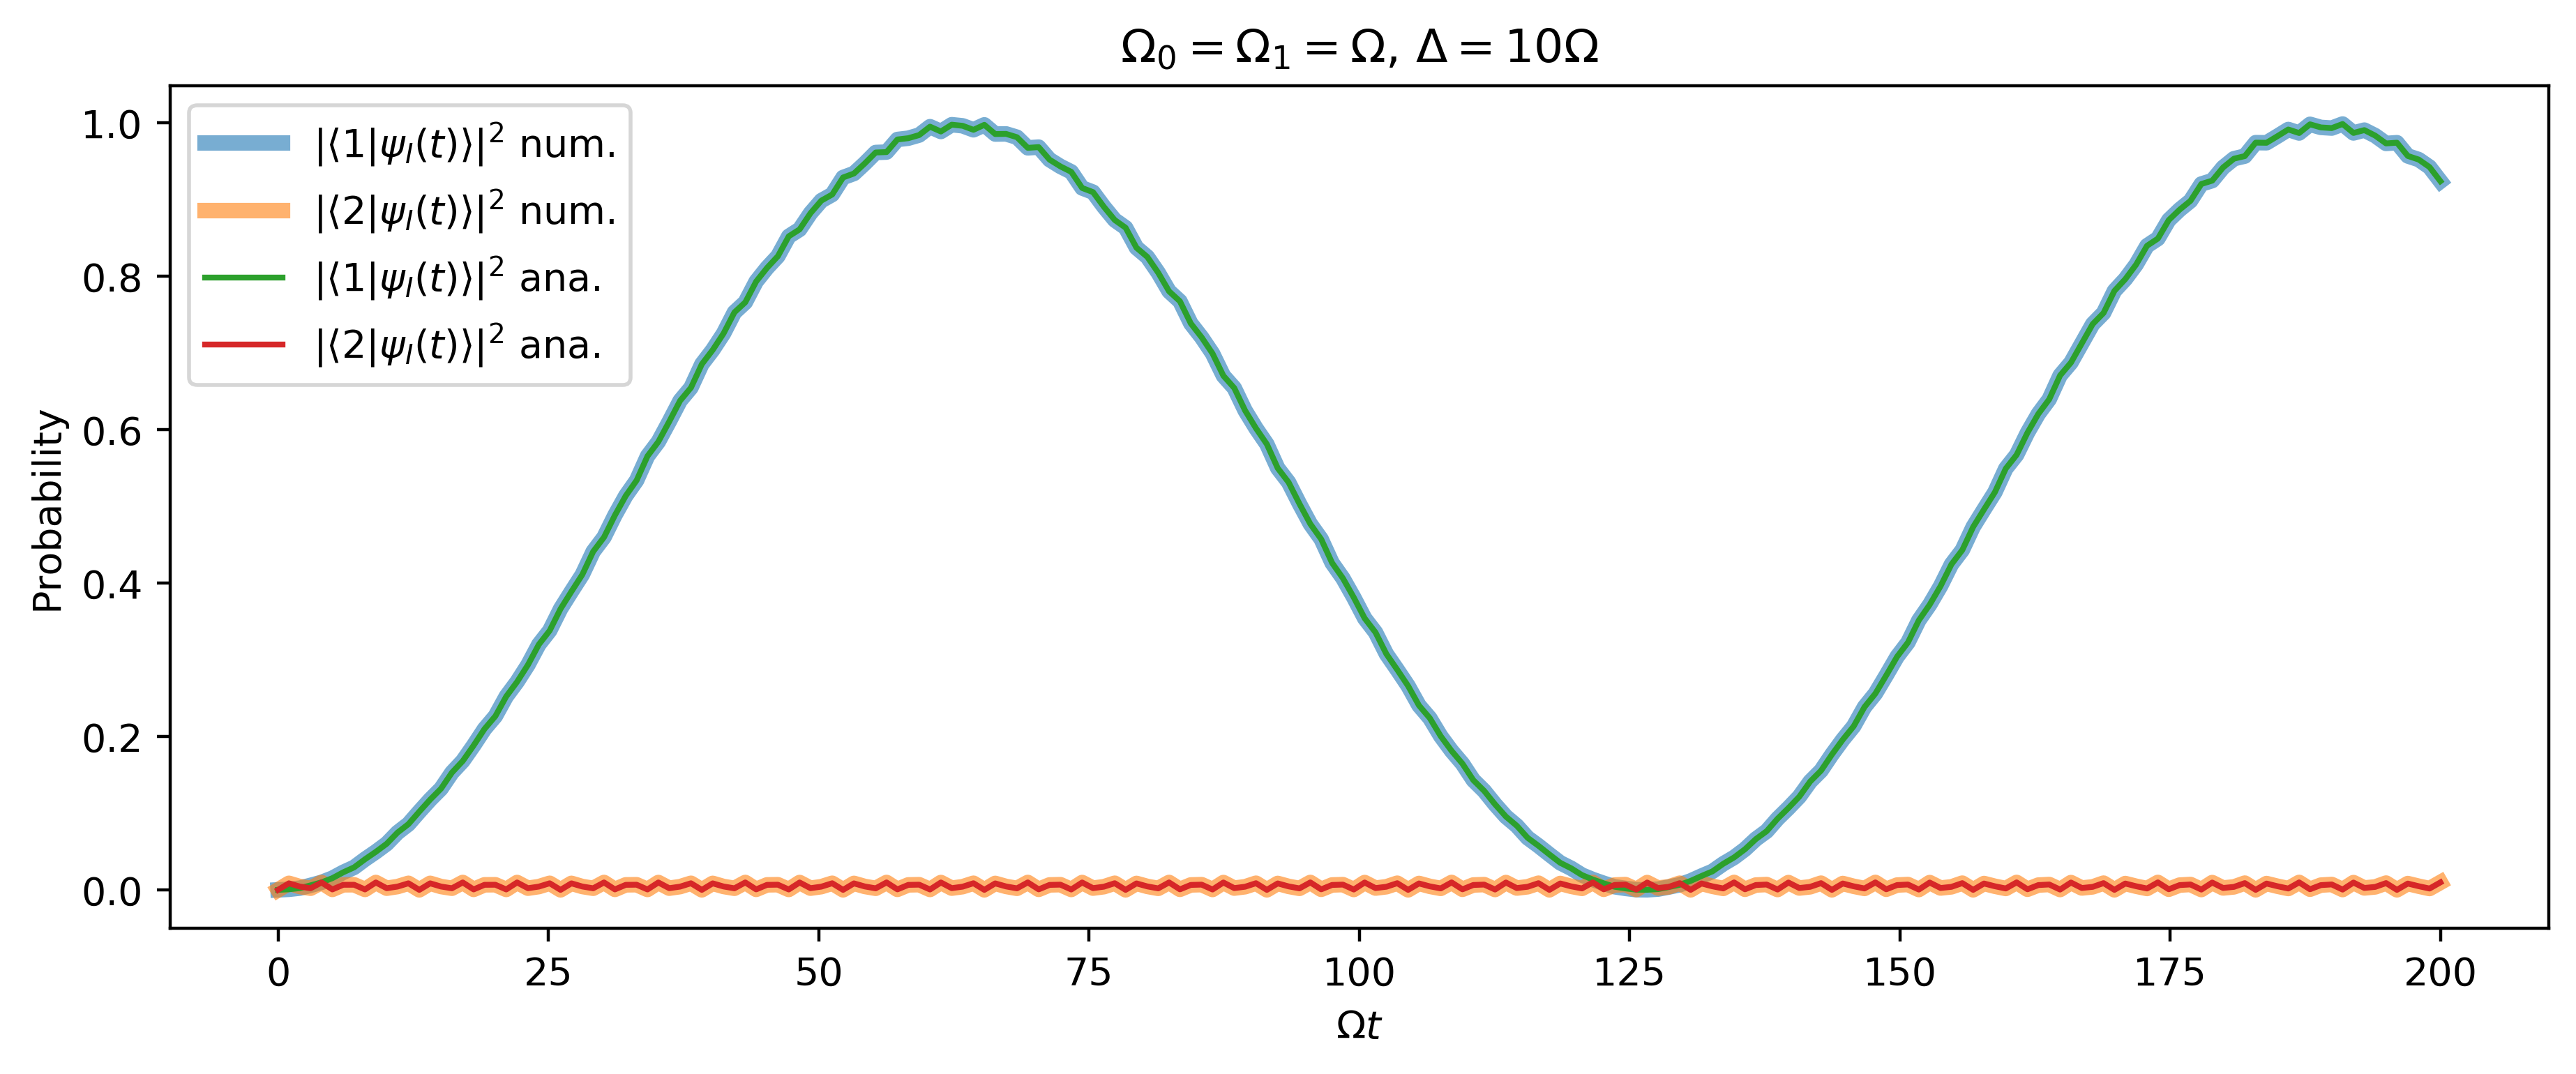

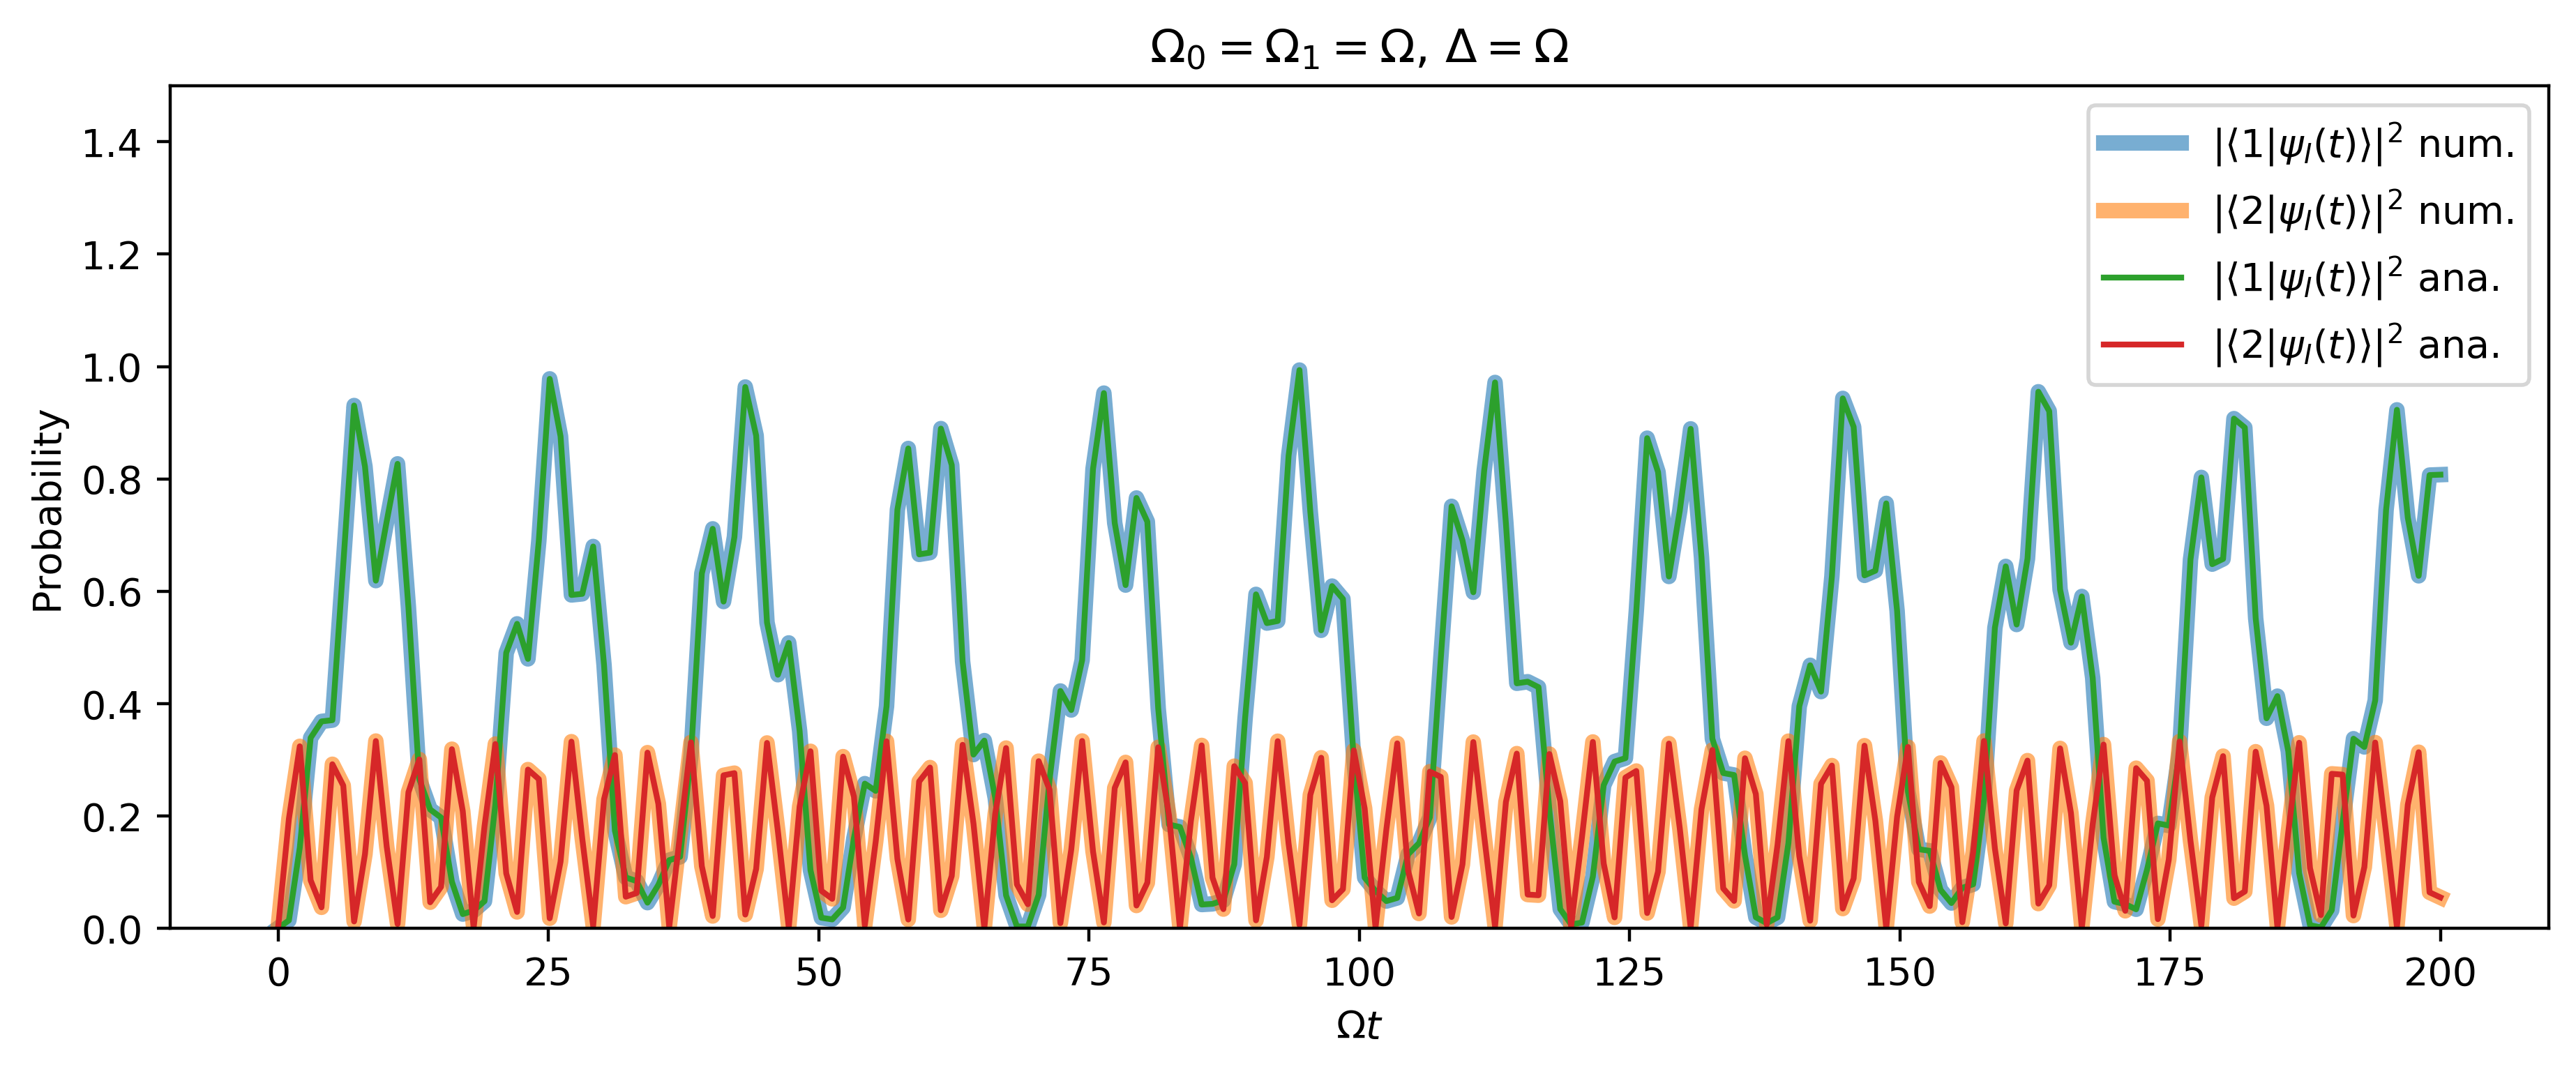

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

#defining values
O = 1
O0 = O
O1 = O
D = 10*O #first case
O_eff = np.sqrt(O0**2 + O1**2 + D**2)
t_f = 200
N = 200
t = np.linspace(0, t_f, N)
initial_state = np.array([[1],
                          [0],
                          [0]])
system_states = [initial_state, np.array([[0], [1], [0]]), np.array([[0], [0], [1]])]

#Hamiltonian/hbar
def H_I():
    return np.array([[0, 0, O0/2], [0, 0, O1/2], [O0/2, O1/2, D]])

#evolution operator
def unitary_evolution(time, vector):
    return expm(-1j* time * H_I()) @ vector

#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

# calculate the probability of measuring a system state in the current state
def population_probability(system_state, current_state):
    braket = complex(system_state.T.conjugate() @ current_state)
    probability = braket.conjugate() * braket #modulus squared of the complex number of the inner product between the system and the current states
    return probability.real #the modulus squared of a complex number is real, therefore the imaginary part can be ignored

def pop1(time):
    term1 = (O0*O1)**2
    term2 = D**2 * (1-np.cos(O_eff*time))
    term3 = O_eff**2 * (3+np.cos(O_eff*time))
    term4 = -3*O_eff * (O_eff*np.cos(O_eff*time/2)*np.cos(D*time/2) + D*np.sin(O_eff*time/2)*np.sin(D*time/2))
    term5 = 2 * O_eff**2 * (D + O_eff)**2 * (O_eff - D)**2
    #return  term1* (term2 + term3 + term4)/term5
    z = O0*O1 * (np.exp(-1j * (D+O_eff)/2*time)/(2*O_eff*(O_eff+D)) + np.exp(-1j * (D-O_eff)/2*time)/(2*O_eff*(O_eff-D)) - 1/(O_eff**2-D**2))
    zz = z.conjugate() * z
    #return zz.real
    x = (O0*O1)**2*(6*O_eff**2+2*D**2+2*np.cos(O_eff*time)*(O_eff**2-D**2)-4*O_eff*(O_eff*(np.cos((D+O_eff)/2*time)+np.cos((D-O_eff)/2*time))+D*(np.cos((D-O_eff)/2*time) -np.cos((D+O_eff)/2*time))))/((2*O_eff)**2*(O_eff**2-D**2)**2)
    return x
    
def pop2(time):
    return O0**2/(2*O_eff**2)*(1 - np.cos(O_eff * time))

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [population_probability(system_states[1], unitary_evolution(i, initial_state)) for i in t], label = r'$|\langle 1 | \psi_I(t)\rangle|^2$ num.', lw=4, alpha=0.6)
plt.plot(t, [population_probability(system_states[2], unitary_evolution(i, initial_state)) for i in t], label = r'$|\langle 2 | \psi_I(t)\rangle|^2$ num.', lw=4, alpha=0.6)
plt.plot(t, [pop1(i) for i in t], label=r'$|\langle 1 | \psi_I(t)\rangle|^2$ ana.')
plt.plot(t, [pop2(i) for i in t], label=r'$|\langle 2 | \psi_I(t)\rangle|^2$ ana.')
plt.ylabel('Probability')
plt.xlabel(r'$\Omega t$')
plt.title(r'$\Omega_0 = \Omega_1 = \Omega$, $\Delta = 10\Omega$')
plt.legend()
#plt.savefig('7i.pdf', dpi=400)

plt.show()

D = O #second case
O_eff = np.sqrt(O0**2 + O1**2 + D**2)
plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [population_probability(system_states[1], unitary_evolution(i, initial_state)) for i in t], label = r'$|\langle 1 | \psi_I(t)\rangle|^2$ num.', lw=4, alpha=0.6)
plt.plot(t, [population_probability(system_states[2], unitary_evolution(i, initial_state)) for i in t], label = r'$|\langle 2 | \psi_I(t)\rangle|^2$ num.', lw=4, alpha=0.6)
plt.plot(t, [pop1(i) for i in t], label=r'$|\langle 1 | \psi_I(t)\rangle|^2$ ana.')
plt.plot(t, [pop2(i) for i in t], label=r'$|\langle 2 | \psi_I(t)\rangle|^2$ ana.')
plt.ylabel('Probability')
plt.xlabel(r'$\Omega t$')
plt.title(r'$\Omega_0 = \Omega_1 = \Omega$, $\Delta = \Omega$')
plt.ylim((0,1.5))
plt.legend()
#plt.savefig('7ii.pdf', dpi=400)

plt.show()


It can be seen that for $\Delta = 10\Omega$, that is a detunning much bigger than the coupling strength, the system undergoes Rabi oscillations. In addition, level $|2\rangle$ is hardly ever populated, which reduces the chances of incoherent processes like spontaneous emission taking place and shortening the coherence of the qubit. This corresponds to the ideal behaviour desired for effective computation.

On the other hand, when the detunning and the coupling strength are similar, the previously described 'ideal behaviour' disapppears.

## 8
(a) Construct the two-qubit Hamiltonian matrix

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z$$

by combining single-qubit Pauli matrices with [tensor products](https://numpy.org/doc/stable/reference/generated/numpy.kron.html). Choose $\hbar\omega_A = 1$, $\hbar\omega_B = 0.5$, $\hbar J = 0.5$ and $\hbar V=0.1$. Print out the matrix explicitly and calculate its eigenvalues and eigenvectors. Calculate the overlap between the ground state and the state $|01\rangle = |0\rangle \otimes |1\rangle$. (The single-qubit states $|0\rangle$ and $|1\rangle$ are defined by $\hat{\sigma}_z|s\rangle = (-1)^s|s\rangle$ for $s=0,1$.)

In [1]:
import numpy as np
from numpy import kron

#defining values
hwa = 1
hwb = 0.5
hj = 0.5
hv = 0.1

#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

#states 0&1 from single-qubit pauli matrix z
zero = np.array([[1], [0]])
one = np.array([[0], [1]])

#defining the Hamiltonian
def H_2qubit():
    return -hwa/2 * kron(Z, I) - hwb/2 * kron(I, Z) + hj/4 * (kron(X, X) + kron(Y, Y)) + hv/2 * kron(Z, Z)

H = H_2qubit() #hamiltonian

print('2-qubit Hamiltonian:\n', H)
eigvals, eigvects = np.linalg.eig(H) #diagonalising the hamiltonian

for i in range(len(eigvals)):
    print('Eigenvalue =',round(eigvals[i].real, 5), ' ; ', 'Eigenstate =', eigvects[:,i])

#finally, the overlap between the ground state |00> and |01> is calculated

#the ground state corresponds to the eigenstate with the smaller eigenvalue:
energies = [i.real for i in eigvals]
#we have to find the smaller one and its index to know the corresponding eigenstate:
ground_state = eigvects[:,energies.index(min(energies))]
excited_state = kron(zero, one)
overlap = ground_state.T.conjugate() @ excited_state

if overlap.imag==0:
    print('Overlap <01|g>:', float(overlap.real), 
          '\n Probability of measuring |01> when the system is in the ground state:', float(overlap.real**2))
else: print('Overlap <01|g>:', complex(overlap),
            '\n Probability of measuring |01> when the system is in the ground state:', complex(overlap*overlap.conjugate()).real)

2-qubit Hamiltonian:
 [[-0.7 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.3 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.2 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.8 +0.j]]
Eigenvalue = 0.30355  ;  Eigenstate = [-0.        +0.j  0.38268343-0.j  0.92387953+0.j -0.        +0.j]
Eigenvalue = -0.40355  ;  Eigenstate = [ 0.        +0.j  0.92387953+0.j -0.38268343+0.j  0.        +0.j]
Eigenvalue = -0.7  ;  Eigenstate = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Eigenvalue = 0.8  ;  Eigenstate = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Overlap <01|g>: 0.0 
 Probability of measuring |01> when the system is in the ground state: 0.0


This result was to be expected since we can see that $|g\rangle=|00\rangle$ (being $|g\rangle$ the ground state), which is orthogonal to $|01\rangle$:
$$ (\langle0|\otimes\langle0|)(|0\rangle\otimes|1\rangle) = \langle0|0\rangle \otimes \langle0|1\rangle = \delta_{00} \cdot \delta_{01} = 0 $$

(b) Calculate the expectation value of $\hat{\sigma}_z\otimes \mathbb{1}$ as a function of time in the interval $t \in [0,10]$ starting from the state $|\psi(0)\rangle = |10\rangle$. (For example, by discretising time into small steps $\Delta t$, as in previous exercises.) Repeat this exercise for the initial state $|\psi(0)\rangle = |+\rangle\otimes |0\rangle$, where $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$. Plot both results and give a couple of sentences to explain their physical meaning.

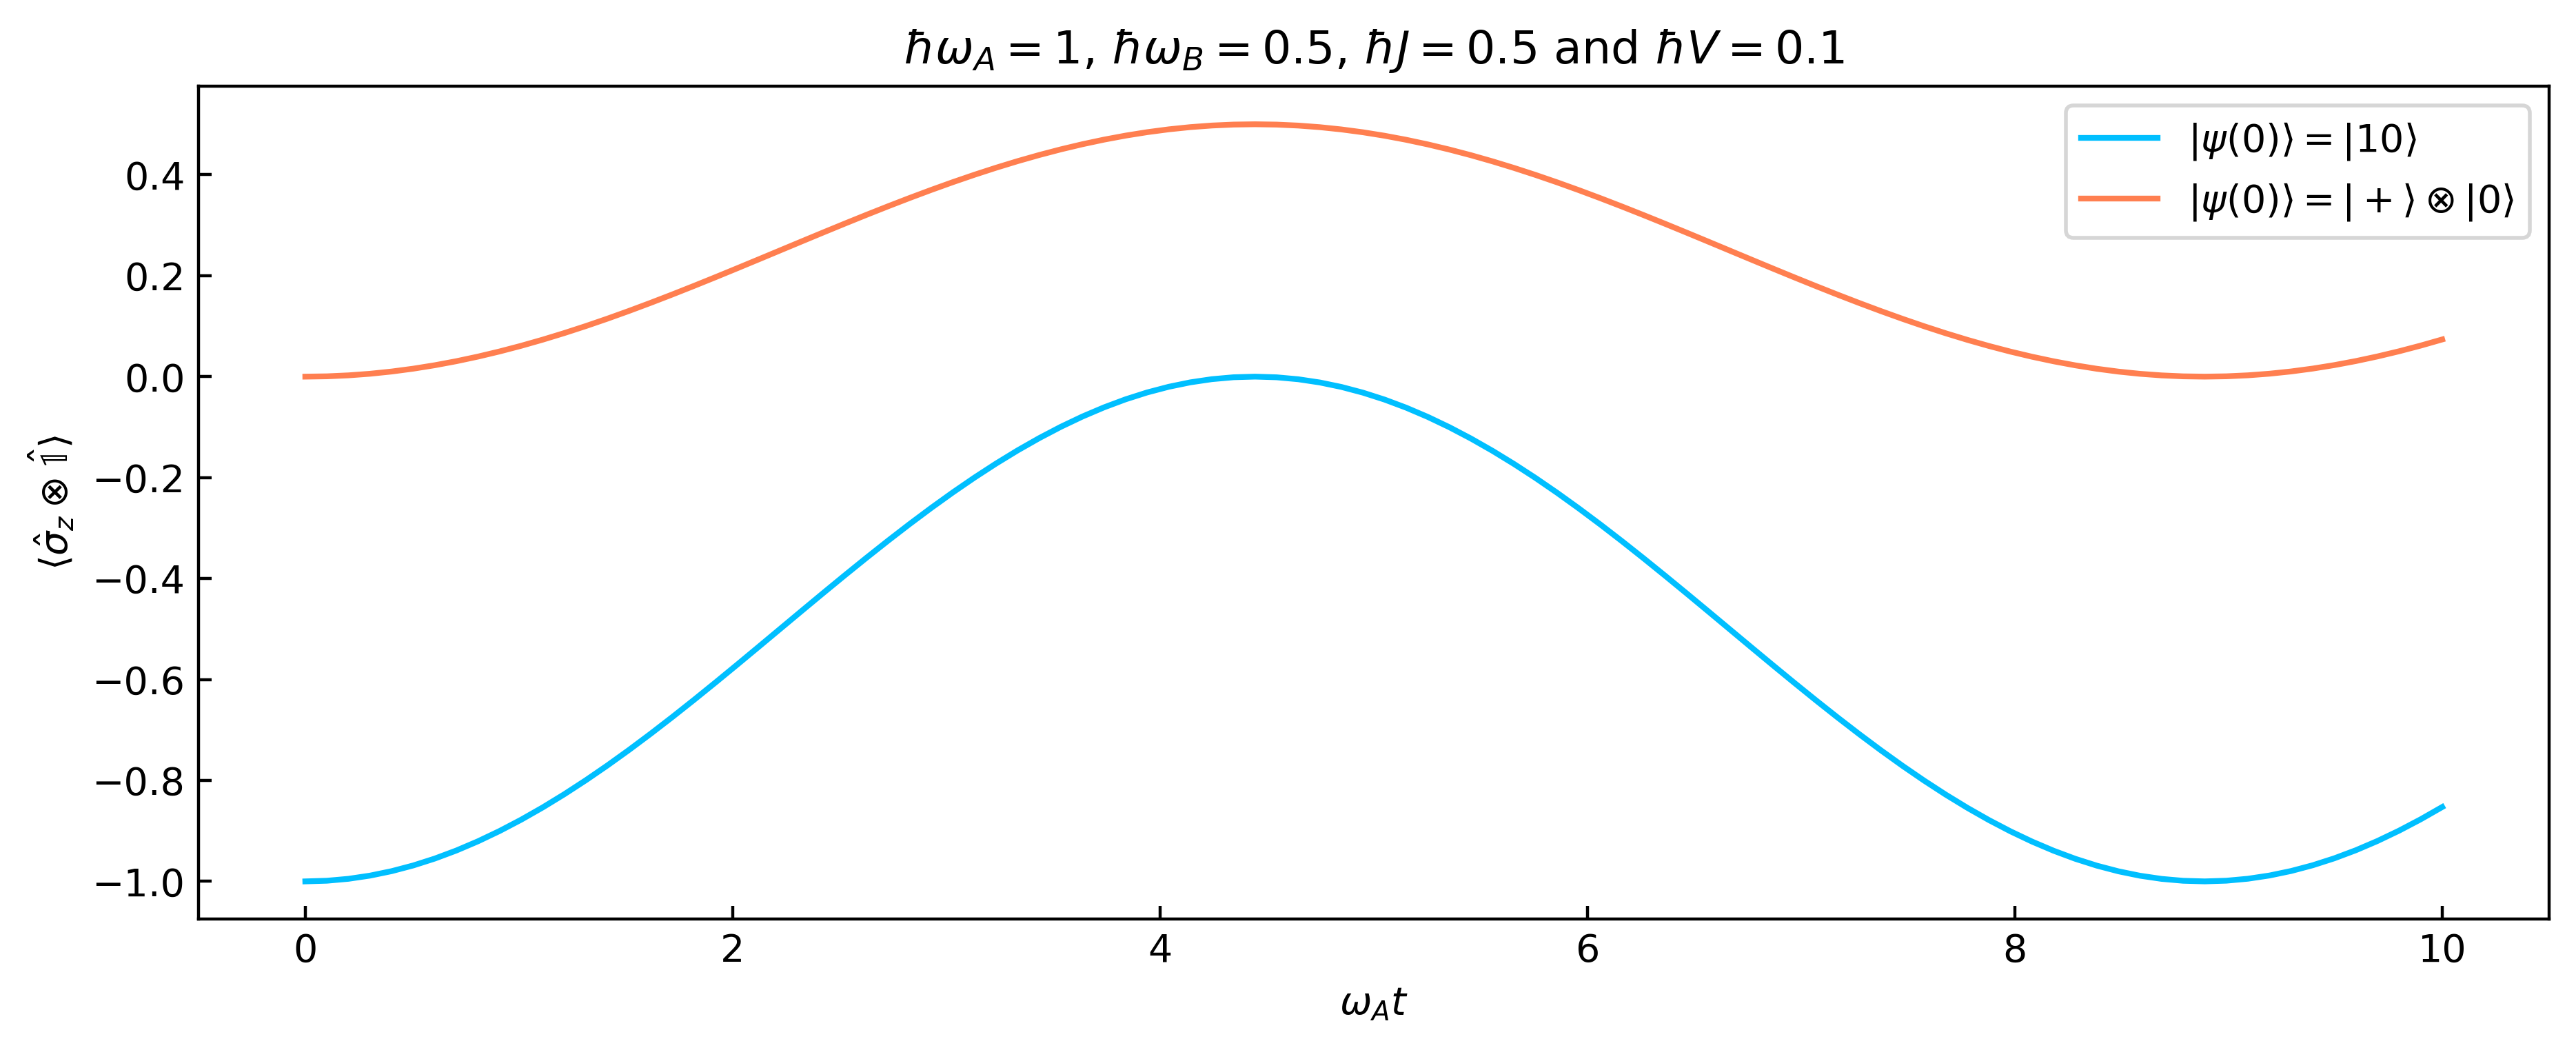

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import kron
from scipy.linalg import expm

#defining values
hwa = 1
hwb = 0.5
hj = 0.5
hv = 0.1
t = np.linspace(0, 10, 100)

#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

#states 0&1 from single-qubit pauli matrix z
zero = np.array([[1], [0]])
one = np.array([[0], [1]])

initial_state = kron(one, zero)

#defining the Hamiltonian
def H_2qubit():
    return -hwa/2 * kron(Z, I) - hwb/2 * kron(I, Z) + hj/4 * (kron(X, X) + kron(Y, Y)) + hv/2 * kron(Z, Z)

#evolution operator
def unitary_evolution(time, vector):
    return expm(-1j* time * H_2qubit()) @ vector

#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

operator = kron(Z, I)

plt.figure(figsize = (11,4), dpi=400)
plt.plot(t, [expectation_value(unitary_evolution(i, initial_state), operator) for i in t], label=r'$|\psi(0)\rangle = |10\rangle$', c='deepskyblue')
plus = 1/np.sqrt(2) * np.array([[1], [1]])
initial_state = kron(plus, zero)
plt.plot(t, [expectation_value(unitary_evolution(i, initial_state), operator) for i in t], label=r'$|\psi(0)\rangle = |+\rangle\otimes|0\rangle$', c='coral')
plt.xlabel(r'$\omega_At$')
plt.legend()
plt.ylabel(r'$\langle \hat{\sigma}_z\otimes \hat{\mathbb{1}}\rangle$')
plt.tick_params(axis="both", direction="in")
plt.title(r'$\hbar\omega_A = 1$, $\hbar\omega_B = 0.5$, $\hbar J = 0.5$ and $\hbar V=0.1$')
#plt.savefig('8b.pdf', dpi=400)

plt.show()



Since the expectation value of the second qubit is that of the identity, which is always 1 (independently of the state of the system), from the result we can understand the evolution for the states $|+\rangle_{A}$ and $|1\rangle_{A}$. It can be seen for longer times that the evolution of the expectation value is periodical, possibly linked to coherent evolution of both states. By looking at section 
With an initial state $|1\rangle_{A}$ the qubit will evolve until equal superposition of $|0\rangle_{A}$ and $|1\rangle_{A}$ before going back to $|1\rangle_{A}$

(c) Let's try to generalise this to multi-qubit systems. As a first step, define a list whose first element is 

$$ \hat{\sigma}^{z}_A = \hat{\sigma}_{z}\otimes \hat{\mathbb{1}},$$

and whose second element is

$$ \hat{\sigma}^{z}_B = \hat{\mathbb{1}}\otimes\hat{\sigma}_{z}.$$

Define analogous lists for the operators $\hat{\sigma}^x_{A,B}$ and $\sigma^y_{A,B}$. This extends the single-qubit Pauli matrices to operators acting on the two-qubit Hilbert space. Use these operators and their products to construct the Hamiltonian from part (a). 

In [1]:
import numpy as np
from numpy import kron

#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])
sigmas = [I, X, Y, Z]


X_list = [kron(X, I), kron(I, X)]
Y_list = [kron(Y, I), kron(I, Y)]
Z_list = [kron(Z, I), kron(I, Z)]

#Defining values
hwa = 1
hwb = 0.5
hj = 0.5
hv = 0.1
#defining the Hamiltonian (previous section)
def H_2qubit():
    return -hwa/2 * kron(Z, I) - hwb/2 * kron(I, Z) + hj/4 * (kron(X, X) + kron(Y, Y)) + hv/2 * kron(Z, Z)
H = H_2qubit() #hamiltonian

#Hamiltonian defined in the new suggested way
H_ = -hwa/2 * Z_list[0] - hwb/2 * Z_list[1] + hj/4 * (X_list[0]@X_list[1] + Y_list[0]@Y_list[1]) + hv/2 * Z_list[0]@Z_list[1]
print(H_)
if (H==H_).all():
    print('This is the same Hamiltonian than the one from the previous section:D')

[[-0.7 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.3 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.2 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.8 +0.j]]
This is the same Hamiltonian than the one from the previous section:D


(d) Now extend this construction to a four-qubit system. More precisely, define three lists (one for each Pauli matrix) of four elements each. Each element will be an operator on the four-qubit Hilbert space, e.g. the first element of one of the lists could be $\hat{\sigma}_x$ for qubit 1, the second element will be $\hat{\sigma}_x$ for qubit 2, etc.

Now generalise this to $L$ qubits. Write a function that takes an integer $L$ as input, and outputs three lists of Pauli operators extended to the $L$-qubit Hilbert space.

In [1]:
#please 
import numpy as np
from numpy import kron
import functools as ft

#pauli matrices and identity (for final check concatenating operations out of the function)
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

#L-qubit hilbert space
def L_Hspace(L):
    #pauli matrices and identity
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])
    I = np.array([[1, 0], [0, 1]])
    sigmas = [I, X, Y, Z]

    #lists to store the combinations of mtrices to turn into tensorial product
    X_ = [] #for L=3 this list will be [X, I, I, I, X, I, I, I, X]
    Y_ = []
    Z_ = []
    for i in range(L):
        for j in range(L):
            if i==j:
                X_.append(X)
                Y_.append(Y)
                Z_.append(Z)
            if i!=j:
                X_.append(I)
                Y_.append(I)
                Z_.append(I)            
    #tensorial products concatenated by ft.reduce(function, list)
    X_list = [ft.reduce(kron, X_[i:i+L]) for i in range(0, L**2, L)] #for L=3 this will be [[kron(X, kron(I, I))], [kron(I, kron(X, I))], kron(I, kron(I, X))]
    Y_list = [ft.reduce(kron, Y_[i:i+L]) for i in range(0, L**2, L)]
    Z_list = [ft.reduce(kron, Z_[i:i+L]) for i in range(0, L**2, L)]
    return X_list, Y_list, Z_list
X_lists, Y_lists, Z_lists = L_Hspace(4)
#make sure items in the list are what we expect, for example the first item of X_lists should be XIII:
if (X_lists[0]==kron(X, kron(I, kron(I, I)))).all():
    print('The function does what is expected from it:D')

The function does what is expected from it:D


(e) The $L$-qubit generalisation of the Hamiltonian from (a) reads as

$$ \hat{H}  = -\sum_{j=1}^L\frac{\hbar\omega_j}{2}\hat{\sigma}_j^z +  \sum_{j=1}^{L-1}\left[\frac{\hbar J}{4} \left ( \hat{\sigma}^x_j  \hat{\sigma}^x_{j+1} + \hat{\sigma}^y_{j} \hat{\sigma}^y_{j+1} \right  ) + \frac{\hbar V}{2}  \hat{\sigma}^z_j \hat{\sigma}^z_{j+1}\right].$$

Construct this Hamiltonian for $L=5$ qubits, with equal local energies $\omega_j = \omega_0$ for all qubits, $ J = \tfrac{1}{2}\omega_0$ and $V = 0$. Compute and plot the time evolution of $\langle \hat{\sigma}^z_1\rangle$ starting from an initial state $|\psi(0)\rangle = |10000\rangle$ up to a time $Jt = 30$. Repeat the calculation for $L=6,7,8,9$ qubits with a similar initial state (i.e. $|\psi(0)\rangle = |100\cdots 00\rangle$). Explore the effect of switching on a finite interaction strength $V$. Briefly discuss (max. one paragraph) the features that you see and the differences between these various examples. 

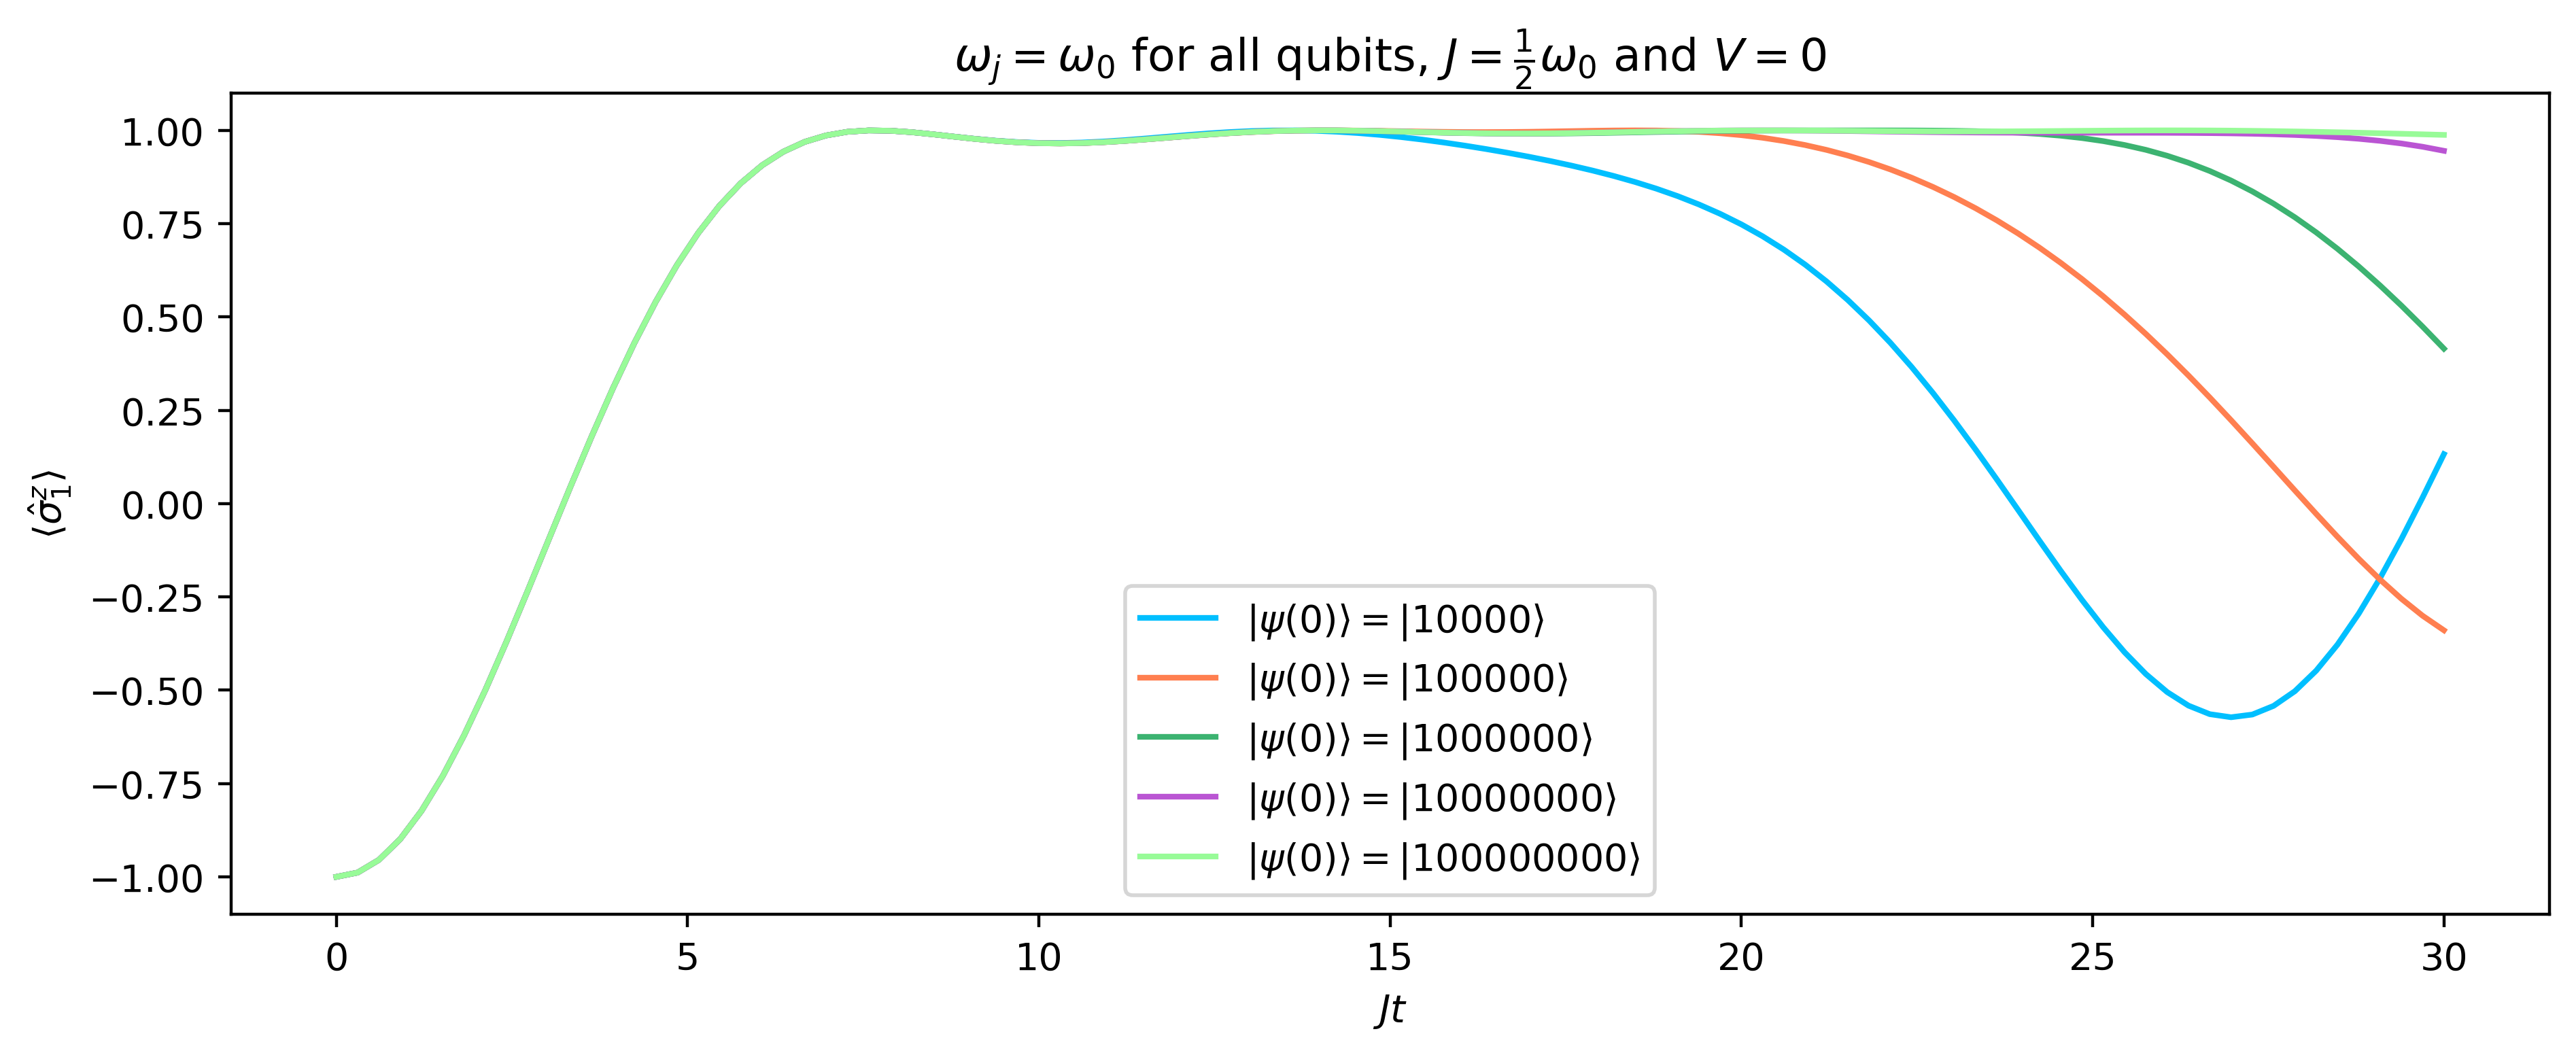

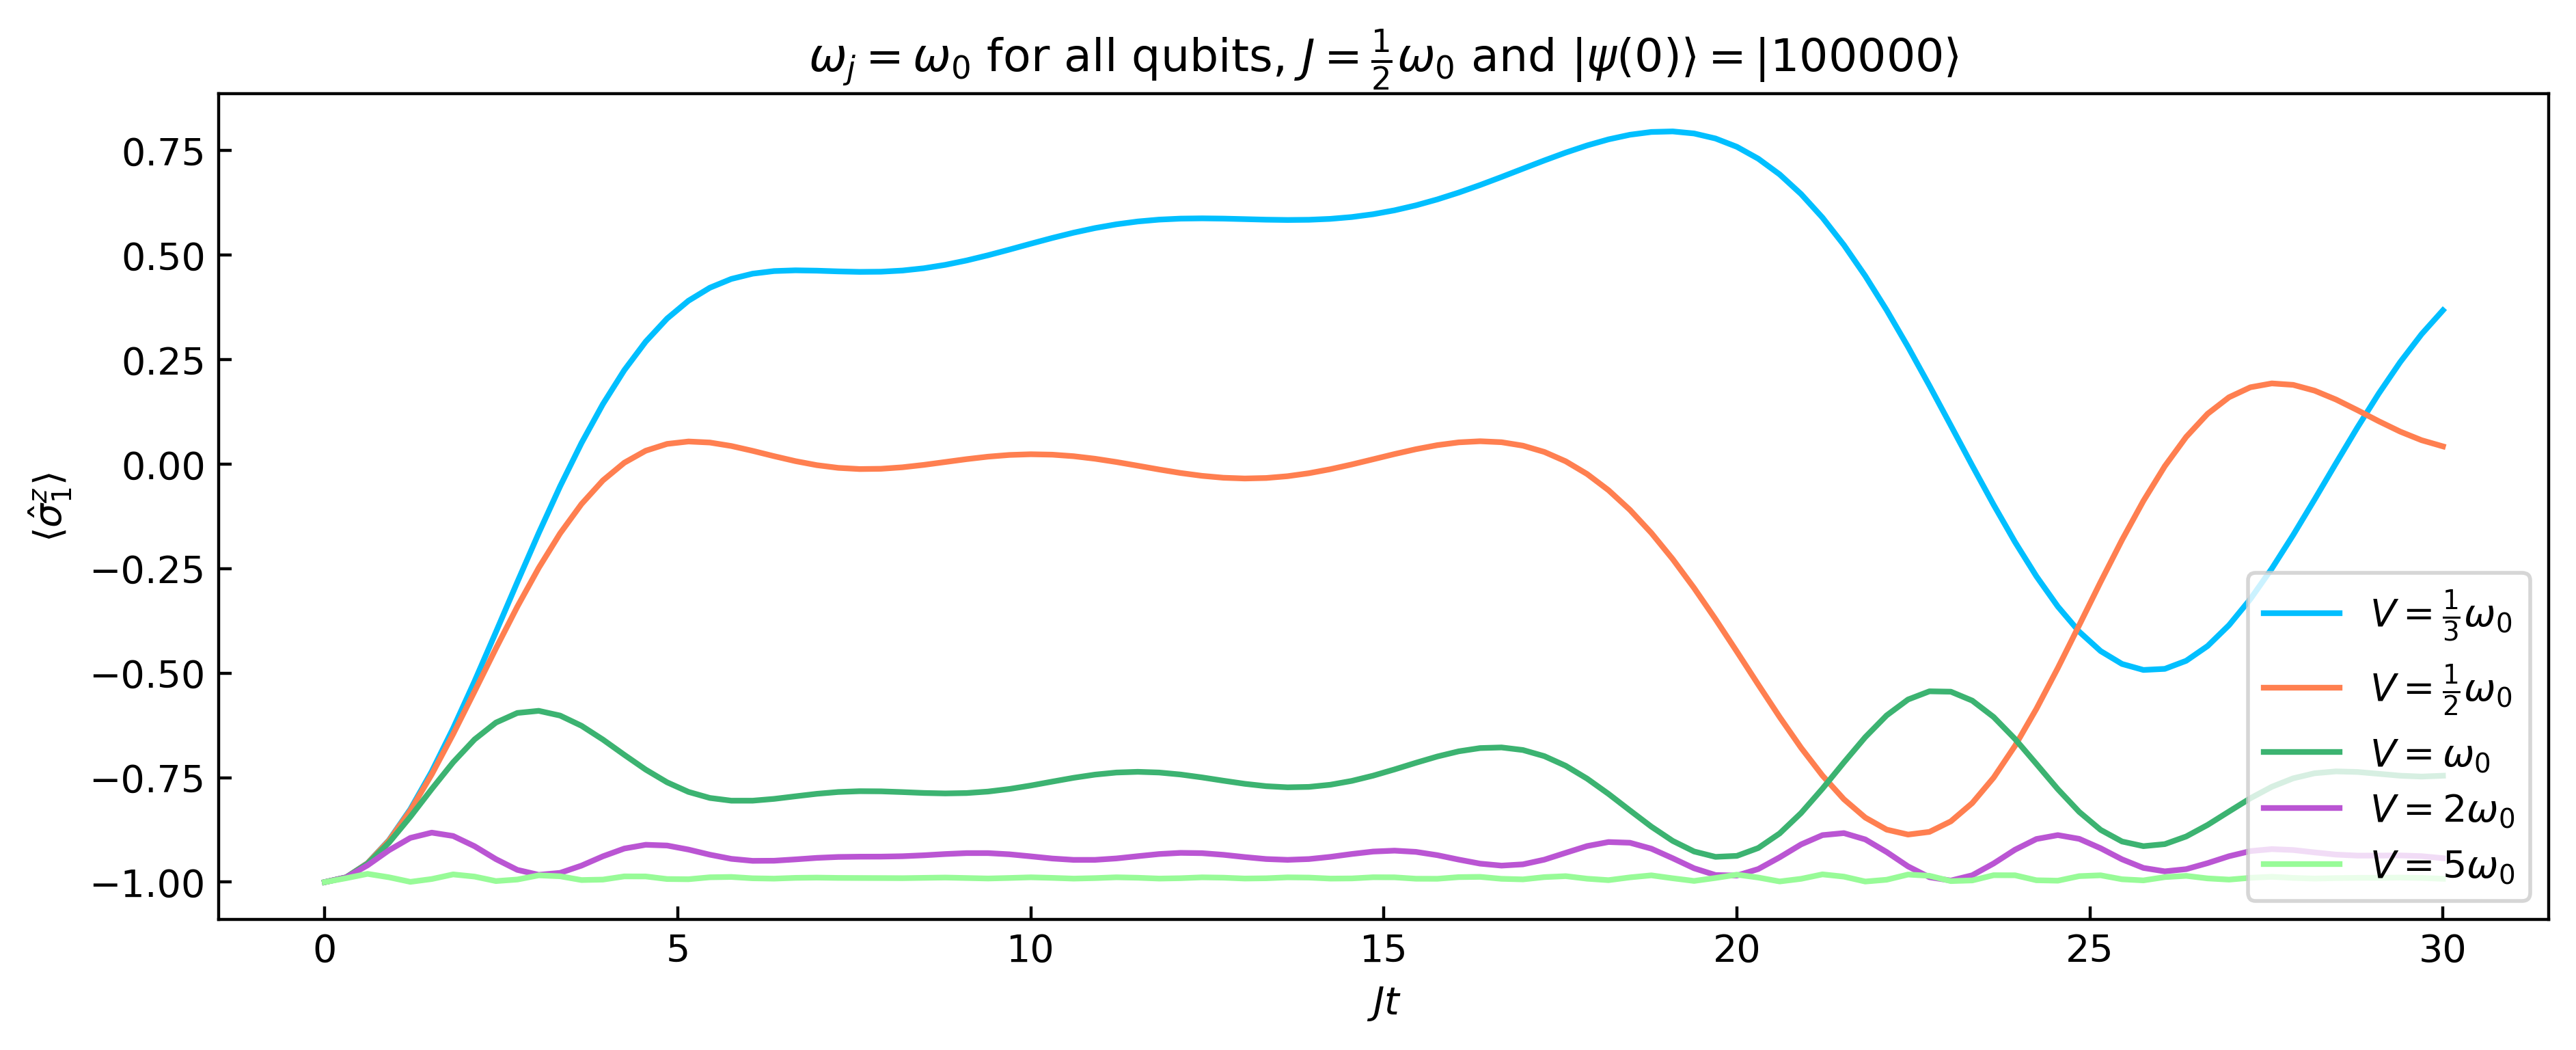

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import kron
from scipy.linalg import expm
import functools as ft

hw0 = 1
#L=5
#hwj = [hw0 for i in range(L)] #keeping the wj's a list so that it's more flexible for different values in the Hamiltonian
hJ = hw0/2
hV = 0
X_lists, Y_lists, Z_lists = 0,0,0



#L-qubit hilbert space
def L_Hspace(L):
    #pauli matrices and identity
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])
    I = np.array([[1, 0], [0, 1]])
    sigmas = [I, X, Y, Z]

    #lists to store the combinations of mtrices to turn into tensorial product
    X_ = [] #for L=3 this list will be [X, I, I, I, X, I, I, I, X]
    Y_ = []
    Z_ = []
    for i in range(L):
        for j in range(L):
            if i==j:
                X_.append(X)
                Y_.append(Y)
                Z_.append(Z)
            if i!=j:
                X_.append(I)
                Y_.append(I)
                Z_.append(I)            
    #tensorial products concatenated by ft.reduce(function, list)
    X_list = [ft.reduce(kron, X_[i:i+L]) for i in range(0, L**2, L)] #for L=3 this will be [[kron(X, kron(I, I))], [kron(I, kron(X, I))], kron(I, kron(I, X))]
    Y_list = [ft.reduce(kron, Y_[i:i+L]) for i in range(0, L**2, L)]
    Z_list = [ft.reduce(kron, Z_[i:i+L]) for i in range(0, L**2, L)]
    return X_list, Y_list, Z_list


#L-qubit hamiltonian:
def Lq_H(L):
    global X_lists, Y_lists, Z_lists
    sum1 = sum([hwj[i]/2*Z_lists[i] for i in range(L)])
    sum2 = sum([(hJ/4*(X_lists[i]@X_lists[i+1]+Y_lists[i]@Y_lists[i+1])+hV/2*Z_lists[i]@Z_lists[i+1]) for i in range(L-1)])
    H = - sum1 + sum2
    return H



def state_preparation(string_state):
    #states 0&1 from single-qubit pauli matrix z
    zero = np.array([[1], [0]])
    one = np.array([[0], [1]])
    separate_states = []
    for i in string_state:
        if i=='0':
            separate_states.append(zero)
        else: 
            separate_states.append(one)
    product_states = ft.reduce(kron, separate_states)
    return product_states
            
initial_state = state_preparation('10000')
t_f = 30 / hJ
t = np.linspace(0, t_f, 100)

#evolution operator
def unitary_evolution_L(time, vector, L):
    return expm(-1j* time * Lq_H(L)) @ vector

#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

plt.figure(figsize = (11,4), dpi=400)
L=5
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('10000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$|\psi(0)\rangle = |10000\rangle$', c='deepskyblue')
L=6
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('100000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$|\psi(0)\rangle = |100000\rangle$', c='coral')
L=7
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('1000000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$|\psi(0)\rangle = |1000000\rangle$', c='mediumseagreen')
L=8
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('10000000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$|\psi(0)\rangle = |10000000\rangle$', c='mediumorchid')
L=9
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('100000000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$|\psi(0)\rangle = |100000000\rangle$', c='palegreen')

plt.xlabel(r'$Jt$')
plt.ylabel(r'$\langle \hat{\sigma}^z_1 \rangle$')
plt.legend()
plt.title(r'$\omega_j = \omega_0$ for all qubits, $ J = \frac{1}{2}\omega_0$ and $V = 0$')
#plt.savefig('8ei.pdf', dpi=400)

plt.show()

#with interaction energy in the hamiltonian
plt.figure(figsize = (11,4), dpi=400)
hV = hw0/3
L=6
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('100000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$V=\frac{1}{3}\omega_0$', c='deepskyblue')
hV = hw0/2
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('100000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$V=\frac{1}{2}\omega_0$', c='coral')
hV = hw0
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('100000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$V=\omega_0$', c='mediumseagreen')
hV = 2*hw0
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('100000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$V=2\omega_0$', c='mediumorchid')
hV = 5*hw0
hwj = [hw0 for i in range(L)]
X_lists, Y_lists, Z_lists = L_Hspace(L)
initial_state = state_preparation('100000')
plt.plot(t, [expectation_value(unitary_evolution_L(i, initial_state, L), Z_lists[0]) for i in t], 
         label = r'$V=5\omega_0$', c='palegreen')
plt.xlabel(r'$Jt$')
plt.ylabel(r'$\langle \hat{\sigma}^z_1 \rangle$')
plt.legend(loc='lower right')
plt.title(r'$\omega_j = \omega_0$ for all qubits, $ J = \frac{1}{2}\omega_0$ and $|\psi(0)\rangle = |100000\rangle$')
plt.tick_params(axis="both", direction="in")
#plt.savefig('8eii.pdf', dpi=400)

plt.show()

We can see that the dynamics of the qubit in system 1 when there is no interaction ($V=0$) start by flipping the state to $|0\rangle_1$.

If there is interaction between the qubits, the one in system 1 does start by flipping to $|0\rangle_1$ but evolves into an equal superpositon of $|0\rangle_1$, $|1\rangle_1$ such as $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{e^{i\varphi}}{\sqrt{2}}|1\rangle$.

For longer time spans, the state starts evolving without apparent coherent behaviour due to the excitations between qubits for $V=0$ and especially when there is non null interaction energy.

It can also be noticed that systems with more qubits begin to lose the coherent behaviour later. The higher the interaction energy is, the more stable are opposite neighbour states, which allows the qubit in the first system to almost remain purely in the initial non-superposed state.